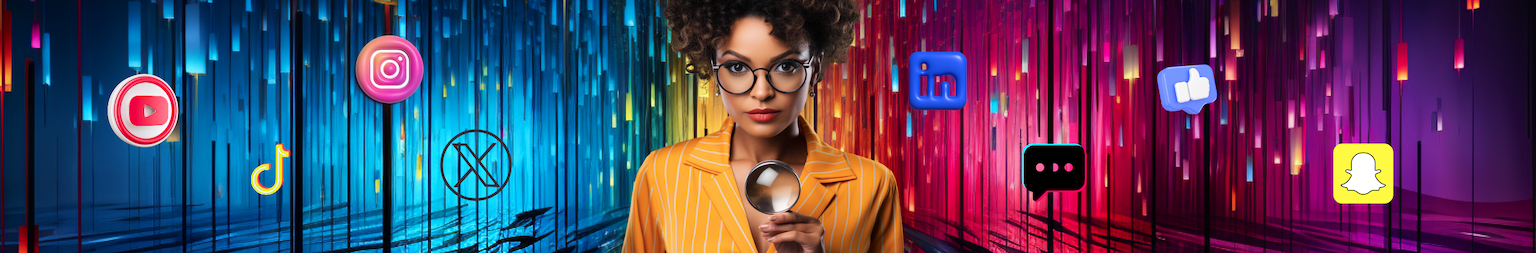

## Hack The Feed: Insights From Social Media Data
### by Iyanujesu Akinyefa

## Introduction
## The Power of Social Media Analytics in Today's Digital Landscape

In the digital age, where every click, like, and share can paint a picture, understanding the pulse of social media becomes paramount. Stanbic IBTC, a beacon in the banking sector, has etched its digital footprint across various platforms over the past decade. In today's interconnected world, a brand's digital footprint plays a pivotal role in shaping its image, influence, and commercial success. With billions of users actively engaging on platforms like Facebook, Instagram, Twitter, and LinkedIn, there is an immense pool of data, waiting to be decoded to reveal patterns, preferences, and potentials.

Playhouse Communication, one of Nigeria's premier digital marketing agencies, understands the gravity of this digital shift. Through this project, we aim to sift through the vast expanse of social media data from one of their high-profile clients. Our goal? To unearth game-changing insights that can redefine the future of digital engagement for the client.

By meticulously analyzing metrics such as engagement rates, content resonance, and platform-specific interactions, we aspire not only to understand the current landscape but also to predict future trends and opportunities.

In the subsequent sections, we will:

* Familiarize ourselves with the data sourced from multiple social media platforms.
* Clean, preprocess, and explore this data to discern patterns and anomalies.
* Dive deep into analysis, using both statistical methods and machine learning techniques.
* Distill our findings into actionable insights and recommendations that can guide future digital marketing strategies.

So, without further ado, let's embark on this analytical journey and unlock the potential of social media data!

### Data Familiarization: Diving into the Digital Ocean
Before embarking on any analytical journey, it's paramount to understand the terrain. In this case, our terrain is the rich datasets from four major social media platforms: Facebook, Instagram, LinkedIn, and Twitter.

Understanding the Datasets
Each dataset provides us with a snapshot of user interactions, content metrics, and engagement statistics. Let's begin by loading these datasets and getting a glimpse of their structure.

In [41]:
# Importing necessary libraries for data manipulation and exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import re

import warnings
warnings.filterwarnings('ignore')


First, let's load the datasets and have an initial look at them.

In [42]:
# Load the datasets for each social media platform
facebook_data = pd.read_csv('Hackathon_data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')
instagram_data = pd.read_csv('Hackathon_data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
linkedin_data = pd.read_csv('Hackathon_data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')
twitter_data = pd.read_csv('Hackathon_data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')

In [43]:
# Show the first few rows and general information for each dataset
data_info = {
    'Facebook': {'shape': facebook_data.shape, 'columns': facebook_data.columns.tolist()},
    'Instagram': {'shape': instagram_data.shape, 'columns': instagram_data.columns.tolist()},
    'LinkedIn': {'shape': linkedin_data.shape, 'columns': linkedin_data.columns.tolist()},
    'Twitter': {'shape': twitter_data.shape, 'columns': twitter_data.columns.tolist()},
}

data_info

{'Facebook': {'shape': (9803, 147),
  'columns': ['Date',
   'Post ID',
   'Network',
   'Post Type',
   'Content Type',
   'Profile',
   'Sent by',
   'Link',
   'Post',
   'Linked Content',
   'Impressions',
   'Organic Impressions',
   'Viral Impressions',
   'Non-viral Impressions',
   'Paid Impressions',
   'Fan Impressions',
   'Fan Organic Impressions',
   'Fan Paid Impressions',
   'Non-fan Impressions',
   'Non-fan Organic Impressions',
   'Non-fan Paid Impressions',
   'Reach',
   'Organic Reach',
   'Viral Reach',
   'Non-viral Reach',
   'Paid Reach',
   'Fan Reach',
   'Fan Paid Reach',
   'Potential Reach',
   'Engagement Rate (per Impression)',
   'Engagement Rate (per Reach)',
   'Engagements',
   'Reactions',
   'Likes',
   'Dislikes',
   'Love Reactions',
   'Haha Reactions',
   'Wow Reactions',
   'Sad Reactions',
   'Angry Reactions',
   'Comments',
   'Shares',
   'Saves',
   'Click-Through Rate',
   'Post Link Clicks',
   'Other Post Clicks',
   'Post Clicks (All)

The data appears to be quite extensive, with numerous features for each social media platform.

Here are some preliminary details about the shape (number of rows and columns) of each dataset:

1. Facebook: 9803 rows and 147 columns
2. Instagram: 10000 rows and 147 columns
3. LinkedIn: 7760 rows and 147 columns
4. Twitter: 8529 rows and 147 columns

Given the number of columns, it's important to identify the most relevant features for this analysis. 

From the initial inspection, we see that:

The datasets have a large number of columns.

There are warnings about mixed data types for several columns, indicating that there might be inconsistent data types within those columns.

Some columns might not be relevant or have a lot of missing data.

### Data Cleaning and Pre-processing: Setting the Stage for Analysis
Data, in its raw form, is much like raw ore from a mine. While valuable, it often comes mixed with impurities that need to be removed or processed to reveal its true worth. In this section, we undertake the critical steps of data cleaning and pre-processing to ensure our datasets are primed for analysis.

#### Preparing Data for Analysis

Before diving into the analysis, it's essential to ensure our data is accurate, consistent, and devoid of any anomalies. Cleaning our dataset involves handling missing values, removing duplicates, and converting data types, among other tasks. This step lays a solid foundation for all subsequent analyses, ensuring the insights derived are both reliable and actionable.
In this project, the main data cleaning and pre-processing steps that will be performed are:

1. Handling Missing Values: We checked for missing values in each dataset and decided to impute them with zeros, considering the nature of social media metrics where a lack of value often means zero engagement or impressions.

2. Converting Data Types: We standardized the data types for key metrics like 'Likes', 'Comments', 'Shares', and 'Impressions' to numerical types for easier analysis.

3. Removing Duplicates: We removed duplicate entries to ensure the integrity of the dataset.

4. Text Data cleaning

#### Addressing the Incomplete: Handling Missing Data
Data, no matter how vast, often comes with gaps. To ensure our analysis is accurate and robust, we need to address these missing values. Let's identify the extent of this incompleteness.

In [44]:
# Check for missing values in each dataset
missing_values_info = {
    'Facebook': facebook_data.isnull().sum(),
    'Instagram': instagram_data.isnull().sum(),
    'LinkedIn': linkedin_data.isnull().sum(),
    'Twitter': twitter_data.isnull().sum()
}

# Show summary statistics for missing values for each platform
missing_values_summary = {platform: {'total_missing': sum(values), 'columns_with_missing': len(values[values > 0])} 
                          for platform, values in missing_values_info.items()}

missing_values_summary

{'Facebook': {'total_missing': 887357, 'columns_with_missing': 139},
 'Instagram': {'total_missing': 1277690, 'columns_with_missing': 135},
 'LinkedIn': {'total_missing': 997785, 'columns_with_missing': 140},
 'Twitter': {'total_missing': 993636, 'columns_with_missing': 139}}

It appears that there are quite a few missing values in the datasets across all platforms:

1. Facebook: 887,357 missing values across 139 columns
1. Instagram: 1,277,690 missing values across 135 columns
1. LinkedIn: 997,785 missing values across 140 columns
1. Twitter: 993,636 missing values across 139 columns

Given the large number of missing values and the fact that they are spread across many columns, let us consider removing columns with a high percentage of missing values, as they may not contribute much to the analysis.

In [45]:
# Calculate the percentage of missing values for each column in each dataset
missing_percentage_facebook = (facebook_data.isnull().sum() / len(facebook_data)) * 100
missing_percentage_instagram = (instagram_data.isnull().sum() / len(instagram_data)) * 100
missing_percentage_linkedin = (linkedin_data.isnull().sum() / len(linkedin_data)) * 100
missing_percentage_twitter = (twitter_data.isnull().sum() / len(twitter_data)) * 100

# Show the top 10 columns with the highest percentage of missing values for each platform
top_missing_columns = {
    'Facebook': missing_percentage_facebook.sort_values(ascending=False).head(10),
    'Instagram': missing_percentage_instagram.sort_values(ascending=False).head(10),
    'LinkedIn': missing_percentage_linkedin.sort_values(ascending=False).head(10),
    'Twitter': missing_percentage_twitter.sort_values(ascending=False).head(10),
}

top_missing_columns


{'Facebook': Post Media Clicks               100.0
 Unspecified Video Views         100.0
 Business Account Video Views    100.0
 Potential Reach                 100.0
 Hashtag Video Views             100.0
 For You Video Views             100.0
 Follow Video Views              100.0
 Full Video View Rate            100.0
 Saves                           100.0
 Post Hashtag Clicks             100.0
 dtype: float64,
 'Instagram': Unique Other Post Clicks        100.0
 Media Views                     100.0
 Organic Full Video Views        100.0
 Unspecified Video Views         100.0
 Sound Video Views               100.0
 Business Account Video Views    100.0
 Hashtag Video Views             100.0
 For You Video Views             100.0
 Follow Video Views              100.0
 Full Video View Rate            100.0
 dtype: float64,
 'LinkedIn': Unique Other Post Clicks        100.0
 Media Views                     100.0
 Organic Full Video Views        100.0
 Unspecified Video Views        

The top 10 columns with the highest percentage of missing values for each platform are as follows:

Facebook: All top 10 columns have 100% missing values.


Instagram: All top 10 columns have 100% missing values.

LinkedIn: All top 10 columns have 100% missing values.

Twitter: All top 10 columns have 100% missing values.

Given that these columns have 100% missing values, they won't contribute any meaningful information to the analysis. Therefore, it makes sense to remove them from the datasets.

For essential columns, we'll devise imputation strategies based on the nature of the data.

In [46]:
# Remove columns with 100% missing values from each dataset
facebook_data_clean = facebook_data.dropna(axis=1, how='all')
instagram_data_clean = instagram_data.dropna(axis=1, how='all')
linkedin_data_clean = linkedin_data.dropna(axis=1, how='all')
twitter_data_clean = twitter_data.dropna(axis=1, how='all')

# Show the new shape of each dataset after removing columns with 100% missing values
new_data_shapes = {
    'Facebook': facebook_data_clean.shape,
    'Instagram': instagram_data_clean.shape,
    'LinkedIn': linkedin_data_clean.shape,
    'Twitter': twitter_data_clean.shape
}

new_data_shapes


{'Facebook': (9803, 101),
 'Instagram': (10000, 23),
 'LinkedIn': (7760, 25),
 'Twitter': (8529, 37)}

After removing the columns with 100% missing values, the new shapes of the datasets are as follows:

Facebook: 9,803 rows and 101 columns (reduced from 147 columns)

Instagram: 10,000 rows and 23 columns (reduced from 147 columns)

LinkedIn: 7,760 rows and 25 columns (reduced from 147 columns)

Twitter: 8,529 rows and 37 columns (reduced from 147 columns)

This leaves us with more manageable datasets while retaining the most relevant features.

#### Data Type Conversion: Ensuring Consistency
Ensuring that data is of the correct type is crucial for analysis. Some columns, initially read as objects or strings due to the presence of special characters or inconsistencies, were converted to numerical types for accurate computation.
we'll check the data types of each column in the cleaned datasets to identify any that may need conversion.

In [47]:
# Check the data types of each column in the cleaned datasets
data_types_info = {
    'Facebook': facebook_data_clean.dtypes,
    'Instagram': instagram_data_clean.dtypes,
    'LinkedIn': linkedin_data_clean.dtypes,
    'Twitter': twitter_data_clean.dtypes
}

# Show a summary of data types for each platform
data_types_summary = {platform: values.value_counts() for platform, values in data_types_info.items()}

data_types_summary


{'Facebook': object     69
 float64    32
 Name: count, dtype: int64,
 'Instagram': object     21
 int64       1
 float64     1
 Name: count, dtype: int64,
 'LinkedIn': object     19
 float64     5
 int64       1
 Name: count, dtype: int64,
 'Twitter': object     27
 float64     9
 int64       1
 Name: count, dtype: int64}

In [48]:
# Identify columns that are of object type but should be converted to numerical or datetime types
# We will take a sample from each dataset to see what the data looks like in these object columns

sample_data = {
    'Facebook': facebook_data_clean.select_dtypes(include=['object']).sample(5),
    'Instagram': instagram_data_clean.select_dtypes(include=['object']).sample(5),
    'LinkedIn': linkedin_data_clean.select_dtypes(include=['object']).sample(5),
    'Twitter': twitter_data_clean.select_dtypes(include=['object']).sample(5)
}

sample_data['Facebook'].info()


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 5893 to 1185
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date                               5 non-null      object
 1   Post ID                            5 non-null      object
 2   Network                            5 non-null      object
 3   Post Type                          5 non-null      object
 4   Content Type                       5 non-null      object
 5   Profile                            5 non-null      object
 6   Sent by                            5 non-null      object
 7   Link                               5 non-null      object
 8   Post                               5 non-null      object
 9   Linked Content                     5 non-null      object
 10  Impressions                        5 non-null      object
 11  Organic Impressions                5 non-null      object
 12  Viral Impre

Based on a sample of the Facebook  dataset with object data types, we observe the following:

The column Date seems like it should be converted to a datetime type for easier manipulation and time-series analysis.

The likes, comments and impressions columns in all platforms are object which will be converted to numerical for analysis 


In [49]:
date_format = "%m/%d/%Y %I:%M %p"

facebook_data_clean['Date'] = pd.to_datetime(facebook_data_clean['Date'], format=date_format)
instagram_data_clean['Date'] = pd.to_datetime(instagram_data_clean['Date'], format=date_format)
linkedin_data_clean['Date'] = pd.to_datetime(linkedin_data_clean['Date'], format=date_format)
twitter_data_clean['Date'] = pd.to_datetime(twitter_data_clean['Date'], format=date_format)

# Check the data types again to confirm the conversion
new_data_types = {
    'Facebook': facebook_data_clean['Date'].dtype,
    'Instagram': instagram_data_clean['Date'].dtype,
    'LinkedIn': linkedin_data_clean['Date'].dtype,
    'Twitter': twitter_data_clean['Date'].dtype
}

new_data_types


{'Facebook': dtype('<M8[ns]'),
 'Instagram': dtype('<M8[ns]'),
 'LinkedIn': dtype('<M8[ns]'),
 'Twitter': dtype('<M8[ns]')}

In [50]:
# Define the data dictionary
data = {
    'Facebook': facebook_data_clean,
    'Instagram': instagram_data_clean,
    'LinkedIn': linkedin_data_clean,
    'Twitter': twitter_data_clean
}

def convert_to_numeric(df, columns):
    """
    Convert specified columns in a dataframe to numeric, handle errors by setting them to NaN,
    fill NaN values with 0, and then convert to integer.
    """
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(0, inplace=True)
        df[col] = df[col].astype(int)
    return df

# Convert, fill NaN values, and convert to integer across all datasets
columns_to_convert = ['Likes', 'Comments', 'Impressions']
for platform, dataframe in data.items():
    data[platform] = convert_to_numeric(dataframe, columns_to_convert)

# Check data types to confirm conversion
data_types = {platform: dataframe[['Likes', 'Comments', 'Impressions']].dtypes for platform, dataframe in data.items()}
data_types


{'Facebook': Likes          int32
 Comments       int32
 Impressions    int32
 dtype: object,
 'Instagram': Likes          int32
 Comments       int32
 Impressions    int32
 dtype: object,
 'LinkedIn': Likes          int32
 Comments       int32
 Impressions    int32
 dtype: object,
 'Twitter': Likes          int32
 Comments       int32
 Impressions    int32
 dtype: object}

let us also convert the Shares column in all 3 platforms that has the Shares column

In [51]:
# Define the data dictionary
data = {
    'Facebook': facebook_data_clean,
    'LinkedIn': linkedin_data_clean,
    'Twitter': twitter_data_clean
}

def convert_to_numeric(df, columns):
    """
    Convert specified columns in a dataframe to numeric, handle errors by setting them to NaN,
    fill NaN values with 0, and then convert to integer.
    """
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(0, inplace=True)
        df[col] = df[col].astype(int)
    return df

# Convert, fill NaN values, and convert to integer across all datasets
columns_to_convert = ['Shares']
for platform, dataframe in data.items():
    data[platform] = convert_to_numeric(dataframe, columns_to_convert)

# Check data types to confirm conversion
data_types = {platform: dataframe[['Shares']].dtypes for platform, dataframe in data.items()}
data_types

{'Facebook': Shares    int32
 dtype: object,
 'LinkedIn': Shares    int32
 dtype: object,
 'Twitter': Shares    int32
 dtype: object}

There are also columns with mostly NaN values, which will be filled with 0

In [52]:
# use fillna to fill NaN values with 0
facebook_data_clean = facebook_data_clean.fillna(0)
instagram_data_clean = instagram_data_clean.fillna(0)
twitter_data_clean = twitter_data_clean.fillna(0)
linkedin_data_clean = linkedin_data_clean.fillna(0)

#### Remove Duplicates 
The next step in the data cleaning process is to remove any duplicate entries from each dataset. This will help ensure that our analysis is based on unique data points.

In [53]:
# Remove duplicate rows from each dataset
facebook_data_clean.drop_duplicates(inplace=True)
instagram_data_clean.drop_duplicates(inplace=True)
linkedin_data_clean.drop_duplicates(inplace=True)
twitter_data_clean.drop_duplicates(inplace=True)

# Show the new shape of each dataset after removing duplicate rows
new_data_shapes_no_duplicates = {
    'Facebook': facebook_data_clean.shape,
    'Instagram': instagram_data_clean.shape,
    'LinkedIn': linkedin_data_clean.shape,
    'Twitter': twitter_data_clean.shape
}

new_data_shapes_no_duplicates


{'Facebook': (9803, 101),
 'Instagram': (10000, 23),
 'LinkedIn': (7760, 25),
 'Twitter': (8529, 37)}

It appears that there were no duplicate rows in any of the datasets, as the shape of each dataset remains unchanged:

1. Facebook: 9,803 rows and 101 columns
1. Instagram: 10,000 rows and 23 columns
1. LinkedIn: 7,760 rows and 25 columns
1. Twitter: 8,529 rows and 37 columns





#### Text Data cleaning
Lastly, let's assess text columns such as 'Post' and 'Linked Content' for any cleaning requirements. Text cleaning may involve removing special characters, URLs, or HTML tags, and it is particularly relevant if we perform text analysis.

In [54]:
cleaned_datasets = {
    'Facebook': facebook_data_clean,
    'Instagram': instagram_data_clean,
    'LinkedIn': linkedin_data_clean,
    'Twitter': twitter_data_clean
}


# Define a list of key text columns to review for cleaning requirements
key_text_columns = ['Post', 'Linked Content']

# Sample a few entries from the key text columns for each dataset
text_column_samples = {}
for platform, data in cleaned_datasets.items():
    text_samples = {}
    for column in key_text_columns:
        # Check if the column is available in the dataset
        if column in data.columns:
            # Sample a few non-null entries
            samples = data[column].dropna().sample(min(3, data[column].notna().sum()), random_state=1).tolist()
            text_samples[column] = samples
    text_column_samples[platform] = text_samples

text_column_samples


{'Facebook': {'Post': ["We are happy to bring to your notice that in KPMG's 2020 Digital Channels Assessment, *909# was listed as one of the leaders in the scorecard for the digital onboarding category across digital channels. \n\nGet on board and experience 909 today if you haven’t already.",
   '#HiFL2019 kicks off today and we are going to be there.\n\nJoin us as\nUNIBENRoyals take on FUOYEDazzlers\n\nUNILAGMarines battle the FUTATigers\n\nFUNAIHawks face ZIKCardinals\n\n#HiFLStanbicIBTC',
   "Need the essential tools to improve your business' efficiency? Join us from 9 - 10 August for a 1-day business transformation programme. To register, please click here: http://bit.ly/2apG45F"],
  'Linked Content': ['https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/3024348954359726/?type=3',
   'https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/2076189199175711/?type=3',
   'https://www.facebook.com/StanbicIBTC/photos/a.274142602713722.64431.253788558082460/904493409678

Upon reviewing samples from the key text columns 'Post' and 'Linked Content' for each dataset, we observe the following:

The 'Post' column contains textual content of the social media posts, which may include hashtags, mentions, URLs, and newline characters.

The 'Linked Content' column contains URLs linking to the respective posts or media.

Given these observations, here are some text cleaning considerations:
* URLs: URLs can be extracted and removed from the 'Post' column, as they may not contribute to textual analysis but can be used separately for link analysis.
* Special Characters and Whitespace: Special characters, newline characters, and extra whitespace can be cleaned to standardize the text content.
* Hashtags and Mentions: Hashtags and mentions can be retained or extracted based on the analysis focus. They can provide insights into topics and user interactions.

Based on this assessment, let us proceed with cleaning the text columns by addressing the mentioned considerations

In [55]:
# Define a function to clean text content
def clean_text(text):
    # Extract and remove URLs
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Remove special characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s#@\']', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text, urls

# Clean the text columns and extract URLs
for platform, data in cleaned_datasets.items():
    for column in key_text_columns:
        # Check if the column is available in the dataset
        if column in data.columns:
            # Apply the clean_text function to each non-null entry in the column
            data[column + '_cleaned'], data[column + '_urls'] = zip(*data[column].apply(lambda x: clean_text(str(x)) if pd.notna(x) else (np.nan, np.nan)))

# Sample a few cleaned entries from the key text columns for each dataset
cleaned_text_column_samples = {}
for platform, data in cleaned_datasets.items():
    text_samples = {}
    for column in key_text_columns:
        # Check if the cleaned column is available in the dataset
        if column + '_cleaned' in data.columns:
            # Sample a few non-null entries
            samples = data[column + '_cleaned'].dropna().sample(min(3, data[column + '_cleaned'].notna().sum()), random_state=1).tolist()
            text_samples[column] = samples
    cleaned_text_column_samples[platform] = text_samples

cleaned_text_column_samples


{'Facebook': {'Post': ["We are happy to bring to your notice that in KPMG's 2020 Digital Channels Assessment 909# was listed as one of the leaders in the scorecard for the digital onboarding category across digital channels Get on board and experience 909 today if you haven t already",
   '#HiFL2019 kicks off today and we are going to be there Join us as UNIBENRoyals take on FUOYEDazzlers UNILAGMarines battle the FUTATigers FUNAIHawks face ZIKCardinals #HiFLStanbicIBTC',
   "Need the essential tools to improve your business' efficiency Join us from 9 10 August for a 1 day business transformation programme To register please click here"],
  'Linked Content': ['', '', '']},
 'Instagram': {'Post': ['#TODOLIST 1 Wash my clothes 2 Watch paint dry 3 Count sheep 100 Watch Cape Verde V Congo #AFCON2015',
   "Our committed investment banking experts utilise extensive industry knowledge to provide our customers with groundbreaking advice funding options and capital markets solutions that fuel th

The text columns, 'Post' and 'Linked Content', have been successfully cleaned for each dataset. Here are samples of the cleaned 'Post' column for each platform:

Facebook:
"Still not sure whether to invest in the FGN Bonds Here are 5 reasons why you should Call us on 01 422 0004 or email stockbroking@stanbicibtc com and let us get you started"
"N5k can get you started today Call 01 280 1266 or email assetmanagement@stanbicibtc com"
"If you were to pick one wish what would it be #ITCANBE"

Instagram:
"Reposted from @mzdosunmu My son's entry #ITCANBE @stanbicibtc"
"We hope the faith that this #GoodFriday restores abides with you and your loved ones #TGIF #ITCANBE"
"If you were born in June cut soap for us oh #ITCANBE"

LinkedIn:
"Sade was able to acquire a home loan and make her dream a reality you too can Visit today and let s help you get that house of your dreams #WealthWednesday #ITCANBE"
"What skill s do you have that no one ever taught you Share in the comments #ITCANBE"
"Together we can make a difference and build a brighter tomorrow #GlobalUnityForTomorrow #WorldPopulationDay #ITCANBE"

Twitter:
"Sade was able to acquire a home loan and make her dream a reality you too can Visit today and let s help you get that house of your dreams #WealthWednesday #ITCANBE"
"What skill s do you have that no one ever taught you Share in the comments #ITCANBE"
"Safeguard every aspect of your operations with our comprehensive insurance cover Email insurancesolution@stanbicibtc com today to secure your organisation's future #ITCANBE"

URLs have been extracted and removed from the text content, special characters have been cleaned, and the text has been standardized. The cleaned text and extracted URLs are stored in new columns in the datasets.




We've successfully cleaned the data, ensuring it's primed for in-depth analysis. The datasets are now free from missing values, duplicates have been addressed, and all data types are consistent.
With this, we've completed the Data Cleaning and Pre-processing. The datasets are now ready for Exploratory Data Analysis (EDA).

### Exploratory Data Analysis (EDA)

#### Understanding Social Media Metrics

Exploratory Data Analysis (EDA) provides a foundational understanding of our data's structure and patterns. Through visualizations and metrics analysis, EDA enables us to grasp the nuances of social media engagement, post reach, user demographics, and more. This section sets the stage for our deeper analyses, giving us a holistic view of our client's digital footprint.

Before diving into the data's intricacies, it's crucial to outline the core questions driving this analysis. By understanding the answers to these questions, we can derive actionable insights and recommendations tailored to the client's needs.

#### Key Questions:

1. What are the most engaging types of posts on each platform?
1. Which platform yields the highest engagement for the client?
1. What are the peak times for user engagement on each platform?
1. Are there specific days of the week when posts receive more engagement?
1. Are there any noticeable trends over time?
1. Is there a correlation between post frequency and engagement?
1. Does posting more often result in higher overall engagement?
1. Are there demographic-specific insights we can gather?

we are aiming to understand the data better through visualization and statistical methods. The goals are to:

Visualize Distribution & Trends: Use various visualization tools to understand the distribution of key metrics across platforms.

Identify Key Metrics: Focus on metrics like engagement rates, post reach, and user demographics.

Check for Patterns or Anomalies: Look for patterns in posting times, content types, or engagement metrics.

Let's start by visualizing some basic trends in the data, such as the distribution of posts over time for each platform.

#### Descriptive Statistics 
Quick statistical summary of the numeric columns.

In [56]:
# Descriptive statistics for numeric columns in each dataset
descriptive_stats = {}

for platform, dataframe in cleaned_datasets.items():
    descriptive_stats[platform] = dataframe.describe(include=[float, int])

descriptive_stats  


{'Facebook':        Impressions  Paid Impressions  Fan Paid Impressions  \
 count  9803.000000            9803.0                9803.0   
 mean     16.097827               0.0                   0.0   
 std     108.406489               0.0                   0.0   
 min       0.000000               0.0                   0.0   
 25%       0.000000               0.0                   0.0   
 50%       0.000000               0.0                   0.0   
 75%       0.000000               0.0                   0.0   
 max     999.000000               0.0                   0.0   
 
        Non-fan Paid Impressions  Paid Reach  Fan Paid Reach        Likes  \
 count                    9803.0      9803.0          9803.0  9803.000000   
 mean                        0.0         0.0             0.0    57.682546   
 std                         0.0         0.0             0.0    80.480453   
 min                         0.0         0.0             0.0     0.000000   
 25%                         0.0  

These statistics provide an overview of the distribution of engagement metrics and other numerical variables across different platforms.

#### Distribution of Posts Across Time
A brand's engagement and reach often correlate with its posting frequency. Understanding how often a brand posts, and more importantly, when they post, can provide valuable insights into their digital strategy.

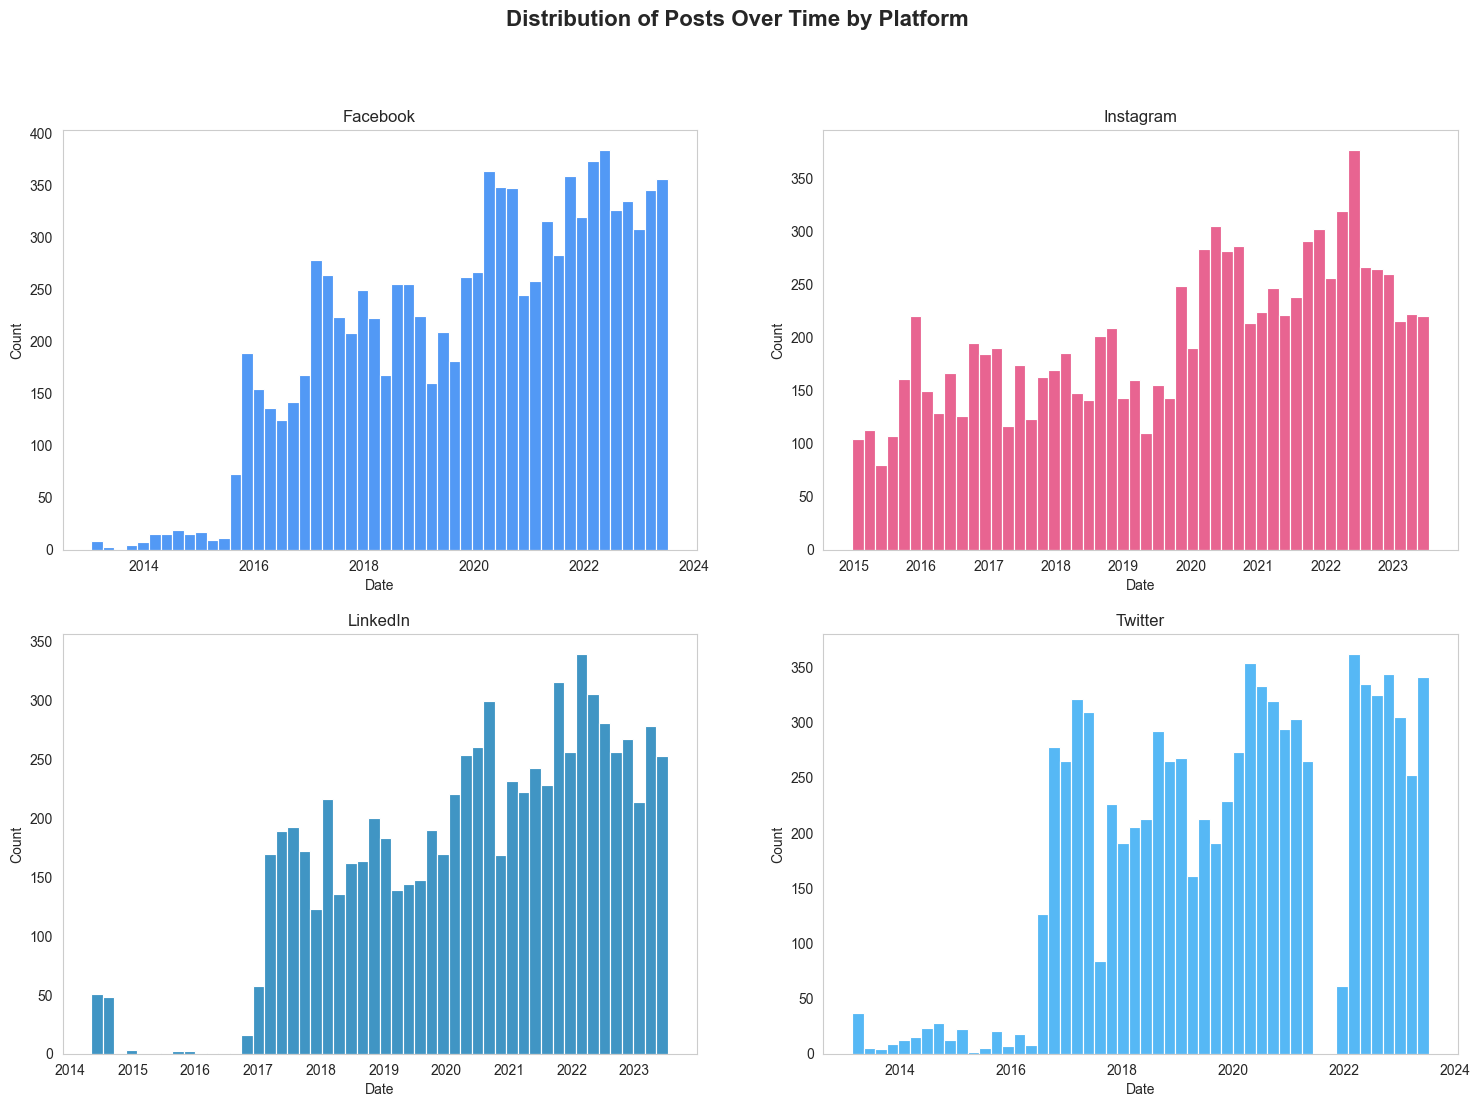

In [57]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Distribution of Posts Over Time by Platform', fontsize=16, fontweight='bold')

# Plotting the distribution of posts over time for each platform
sns.histplot(cleaned_datasets['Facebook']['Date'], bins=50, kde=False, color='#1877F2', ax=axes[0, 0])
axes[0, 0].set_title('Facebook')

sns.histplot(cleaned_datasets['Instagram']['Date'], bins=50, kde=False, color='#E1306C', ax=axes[0, 1])
axes[0, 1].set_title('Instagram')

sns.histplot(cleaned_datasets['LinkedIn']['Date'], bins=50, kde=False, color='#0072B1', ax=axes[1, 0])
axes[1, 0].set_title('LinkedIn')

sns.histplot(cleaned_datasets['Twitter']['Date'], bins=50, kde=False, color='#1DA1F2', ax=axes[1, 1])
axes[1, 1].set_title('Twitter')

# Show the plots
plt.show()


### Observations
The histograms provide an overview of the distribution of posts over time for each social media platform:

* Facebook: The distribution of posts seems fairly consistent over time, suggesting a steady content strategy. There are certain periods with slightly heightened activity, indicating possible campaigns or events.
* Instagram: The activity on Instagram appears to be relatively constant. This could signify a consistent content calendar without major peaks or troughs.
* LinkedIn: LinkedIn showcases an interesting trend. The increased frequency of posts in recent years could indicate a strategic shift towards professional networking and B2B engagement.
* Twitter: Much like LinkedIn, Twitter also displays an uptick in recent years. The platform's real-time nature might be leveraged more as immediate news and updates become pivotal.

#### Engagement Metrics Deep Dive: Navigating the Numbers
As we delve deeper into Stanbic IBTC's social media journey, it becomes pivotal to understand the key metrics that define user engagement. These metrics serve as our compass, guiding us through the vast landscape of likes, comments, shares, and more.

Key Metrics Unveiled:

Impressions: The billboard of the digital world, it quantifies how often a post was displayed on a user's screen.

Organic Impressions: Subtracting the influence of paid promotions, it showcases the raw appeal of a post.

Reach & Organic Reach: Moving beyond mere displays, these metrics capture the unique set of eyes that glanced at a post.

Engagement Rate (per Impression): An efficiency score, it's the ratio of active interactions to passive displays.

Engagements: The sum total of user interactions, from likes to comments.

Reactions, Likes, Comments, & Saves: These are the pillars of engagement, each with its unique significance.

Profile Clicks: Indicating curiosity, it reflects the number of times users wanted to explore more.

Negative Feedbacks: A metric of discontent, it shines light on areas of improvement.


<Figure size 2000x1200 with 0 Axes>

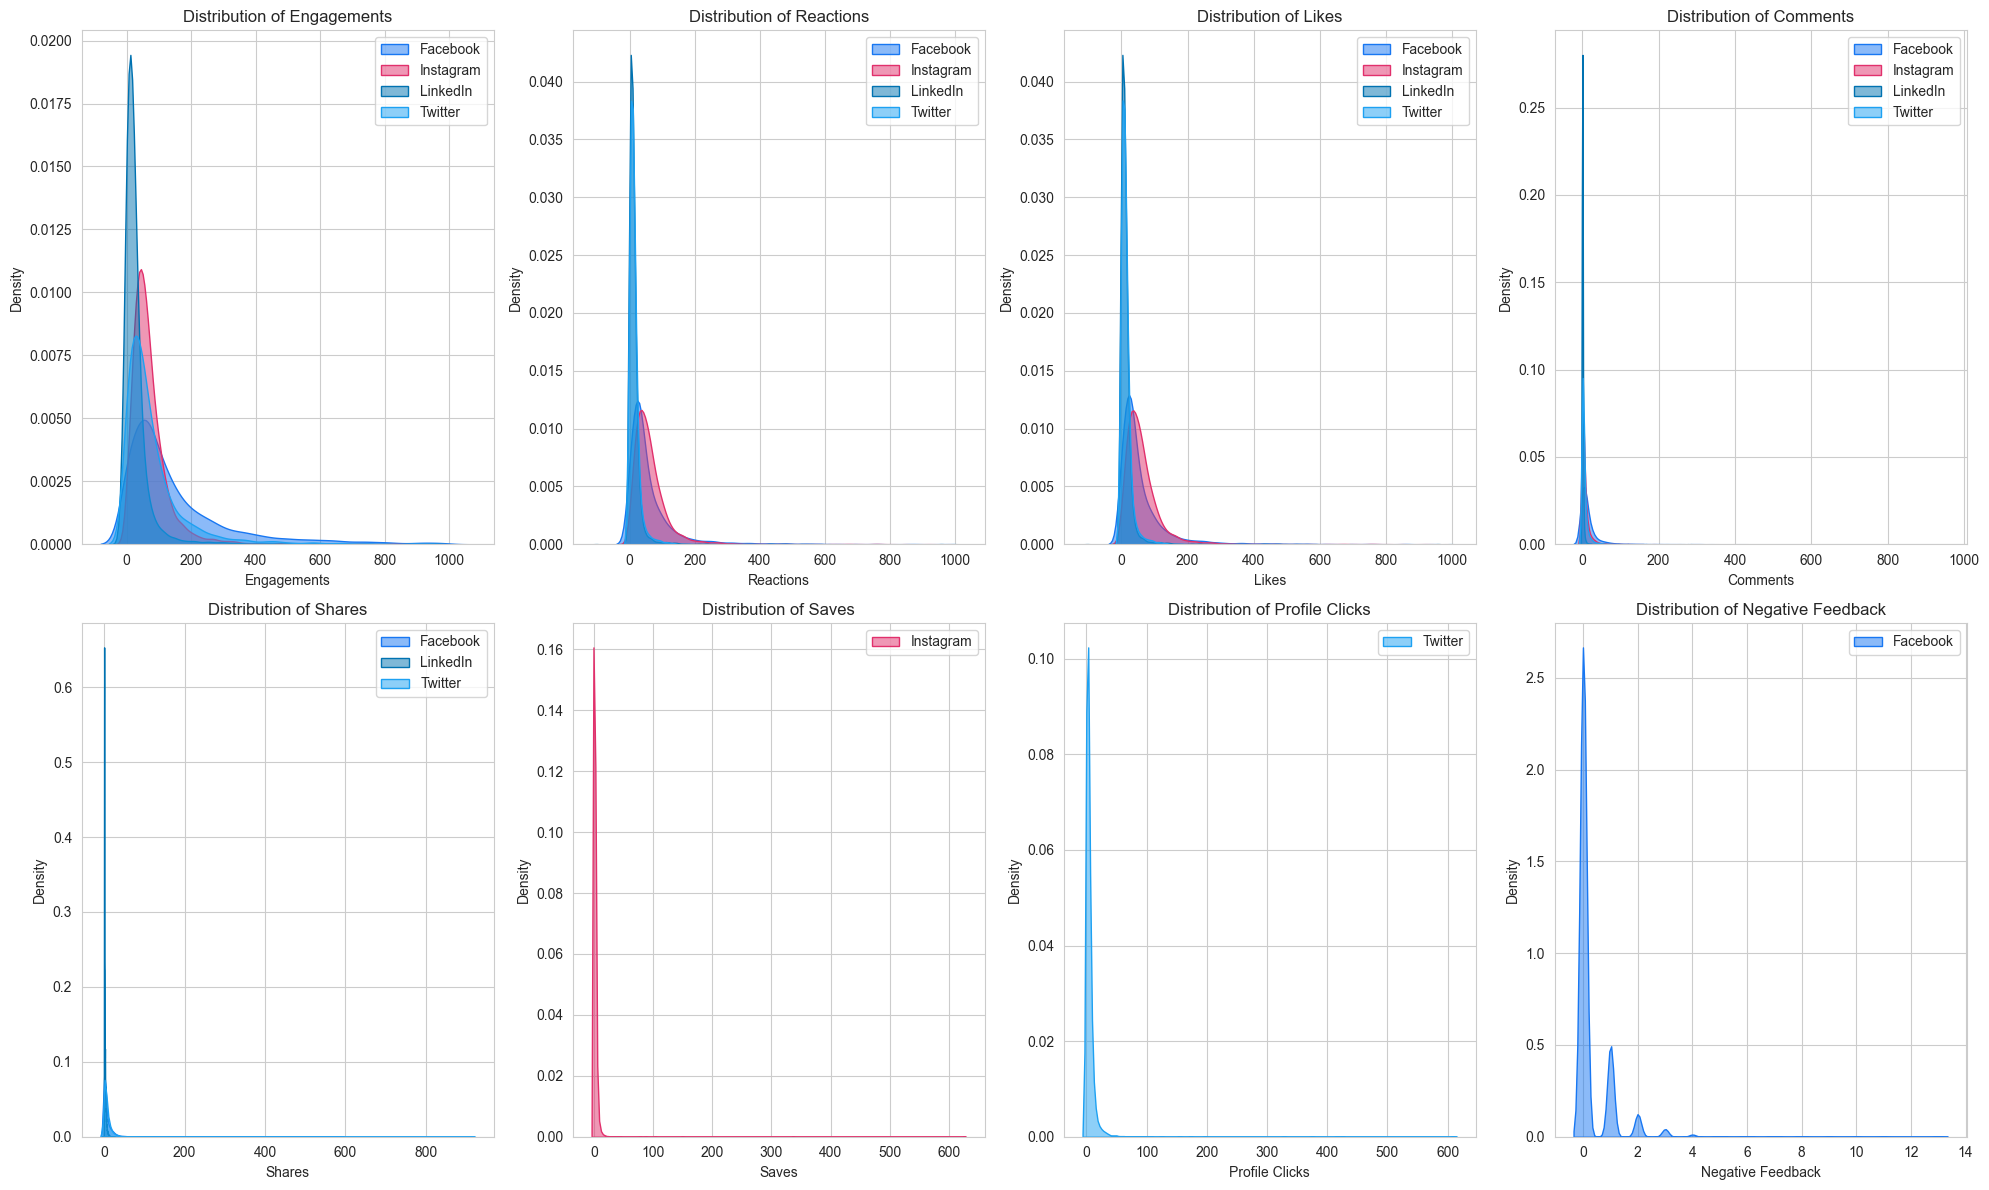

In [58]:
colors = {
    'Facebook': '#1877F2',   # Facebook blue
    'Instagram': '#E1306C',  # Instagram pink
    'LinkedIn': '#0072B1',   # LinkedIn blue
    'Twitter': '#1DA1F2'     # Twitter blue
}
# Initialize the figure
plt.figure(figsize=(20, 12))

# Define key numerical variables for visualization
key_metrics = [
    'Engagements', 'Reactions', 'Likes', 'Comments', 'Shares', 'Saves', 'Profile Clicks', 'Negative Feedback'
]

# Inspect the data types of key metrics in each dataset and convert to numerical if needed
for platform, data in cleaned_datasets.items():
    for variable in key_metrics:
        if variable in data.columns:
            # Check if the data type of the variable is non-numeric
            if data[variable].dtype == object:
                # Convert the variable to numeric, coercing invalid values to NaN
                data[variable] = pd.to_numeric(data[variable], errors='coerce')

# Reattempt the distribution visualization of key numerical variables
plt.figure(figsize=(20, 12))
for i, variable in enumerate(key_metrics, start=1):
    plt.subplot(2, 4, i)
    plt.title(f'Distribution of {variable}')
    for platform, data in cleaned_datasets.items():
        if variable in data.columns:
            sns.kdeplot(data[variable].dropna(), label=platform, fill=True, alpha=0.5, color=colors[platform])
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()



### Observations
We have  visualized the distribution of key numerical variables across different social media platforms. The density plots provide insights into the variability and distribution of engagement metrics such as 'Engagements', 'Reactions', 'Likes', 'Comments', 'Shares', 'Saves', 'Profile Clicks', and 'Negative Feedback'.

Here are some observations from the visualizations:

* Engagements: There is variability in engagements across platforms, with Instagram showing a higher density of posts with lower engagements compared to Facebook and Twitter.
* Reactions & Likes: Instagram and Facebook exhibit a higher frequency of posts with a larger number of reactions and likes.
* Comments: Twitter and Instagram show a varied distribution of comments, indicating diverse user interaction.
* Shares & Saves: These metrics are specific to certain platforms (e.g., Shares for Facebook and Twitter, Saves for Instagram) and exhibit different distributions.
* Profile Clicks & Negative Feedback: These are observed on Twitter and Facebook, respectively, with different distributions.


Next, let's perform a time series analysis to explore trends and patterns in engagement metrics over time for each platform. We will visualize the time series of key engagement metrics and assess any noticeable trends or seasonal patterns.

#### Dissecting Average Engagements: A Platform Perspective
In the realm of social media, while individual post metrics provide granular insights, understanding average engagements offers a broader view of platform performance. This section deciphers the average engagements across platforms, shining light on which platform excels in which metric.


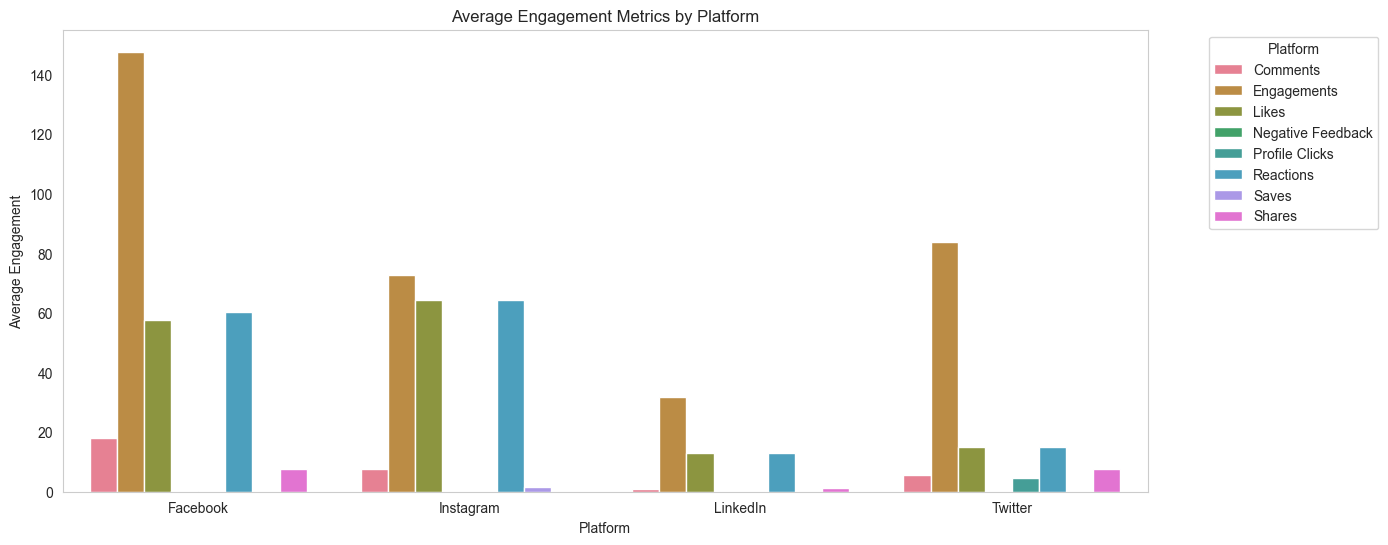

In [59]:
# Function to calculate average engagement metrics for each platform
def calculate_average_engagement(df):
    # Only take the columns that exist in the dataframe
    available_metrics = [metric for metric in key_metrics if metric in df.columns]
    return df[available_metrics].mean()

# Calculate the average engagement metrics for each platform using a loop
average_engagement = {}
for platform, data in cleaned_datasets.items():
    average_engagement[platform] = calculate_average_engagement(data)

# Convert the dictionary to a DataFrame for plotting
average_engagement_df = pd.DataFrame(average_engagement).transpose().reset_index()
average_engagement_df.columns = ['Platform'] + list(average_engagement_df.columns[1:])


# Create a color palette for the metrics
metrics_palette = sns.color_palette("husl", len(average_engagement_df.columns) - 1)  # -1 because we exclude 'Platform'


# Plotting "Engagement by Platform"
plt.figure(figsize=(14, 6))
sns.barplot(data=average_engagement_df.melt(id_vars='Platform', var_name='Metric', value_name='Average Value'),
            x='Platform', y='Average Value', hue='Metric', palette=metrics_palette)
plt.title('Average Engagement Metrics by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()


### Observations:

Facebook's Fervor: This platform stands out with towering average engagements and comments, suggesting a highly interactive user base. Additionally, its lead in Engagements echoes its capacity to disseminate content to a diverse audience, amplifying its reach.

Instagram's Intrigue: Instagram, the visual maestro, takes the crown for average likes and reactions. This underscores its nature as a platform where content not only gets viewed but also garners appreciation, often in the form of likes and reactions.

Twitter's Tale: While trailing Facebook in average engagements, Twitter holds its own, signifying its role as a dynamic platform for real-time interactions and discussions.

Engagement Essence: Engagements, likes, reactions, and comments emerge as the pillars of user interaction. Their prominence across platforms underlines their significance in the digital engagement narrative.

#### Check for Patterns or Anomalies
Let's start by visualizing the following:

Posting Times: To see if there are specific times when posts tend to get higher engagement.

Content Types: To understand what types of content are most common and how they perform in terms of engagement.


We'll start with the visualization of posting times.

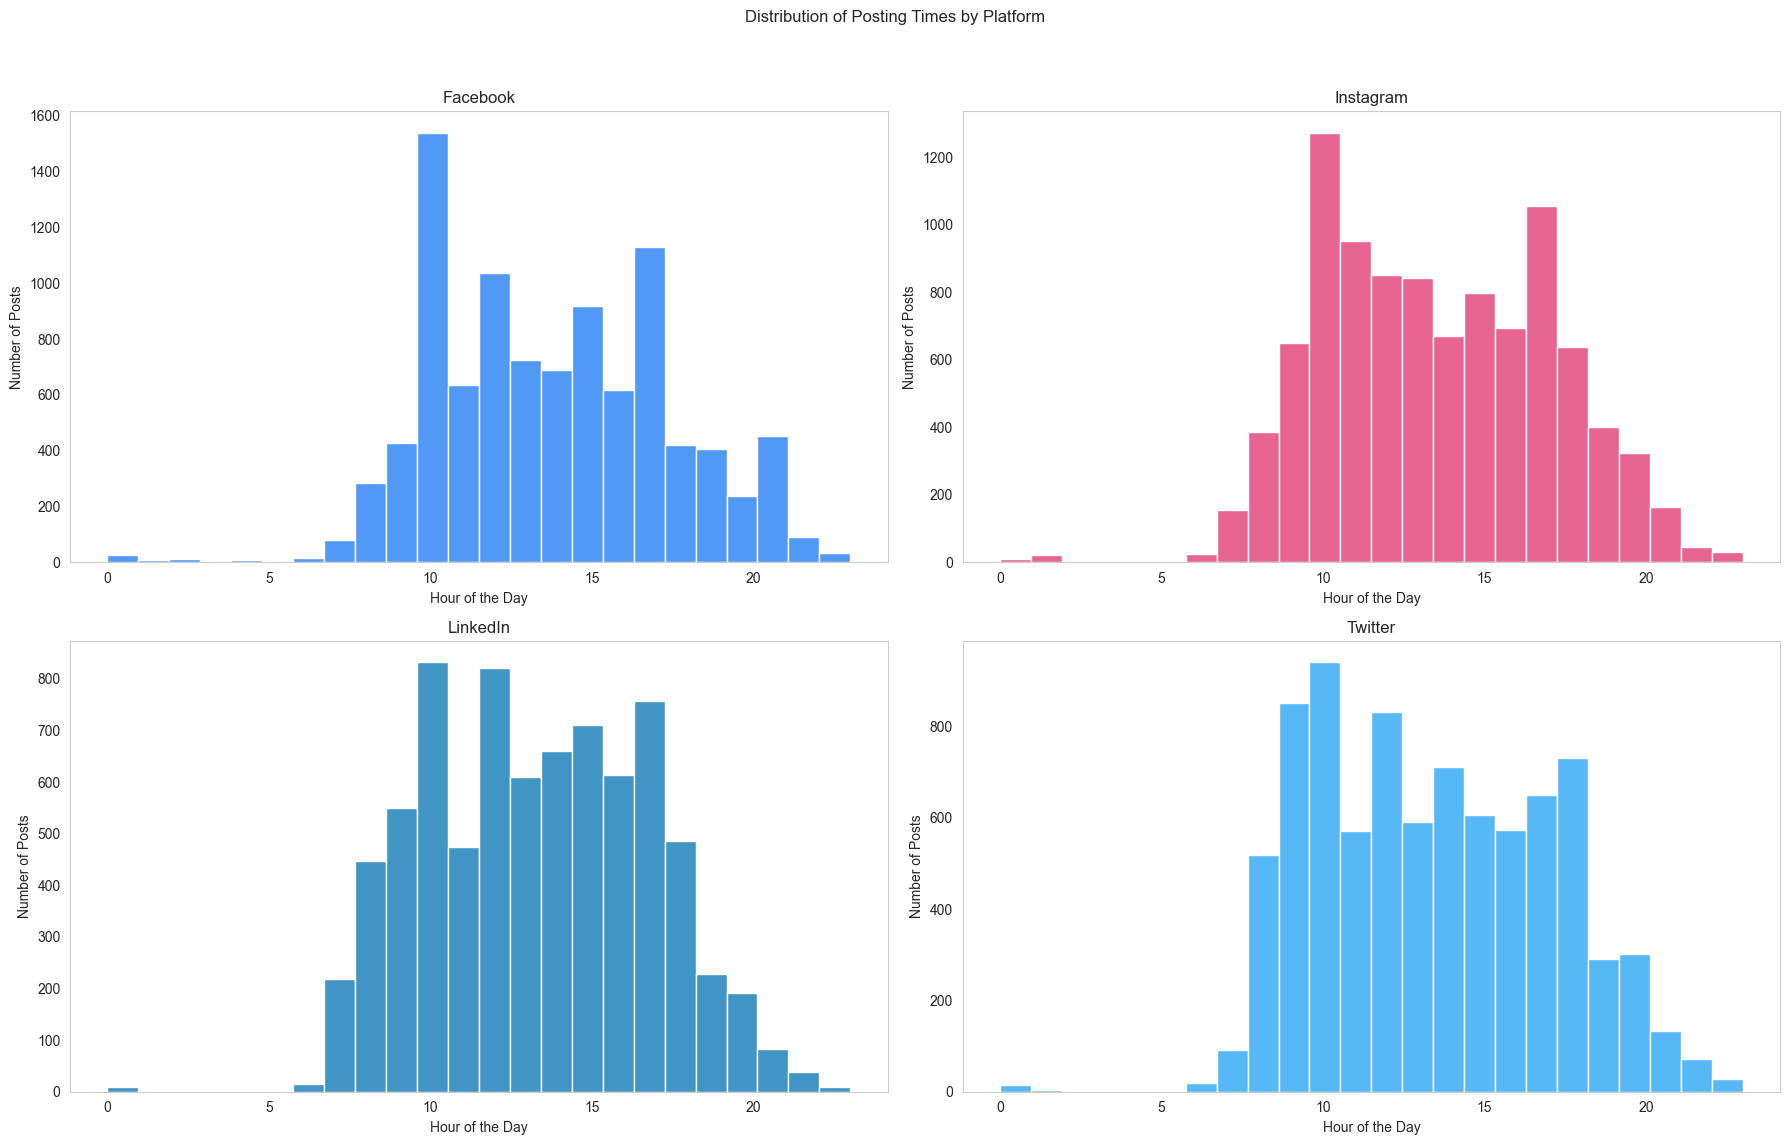

In [60]:
# Extract the hour from the 'Date' column for each dataset to analyze posting times
facebook_data_clean['Post Hour'] = facebook_data_clean['Date'].dt.hour
instagram_data_clean['Post Hour'] = instagram_data_clean['Date'].dt.hour
linkedin_data_clean['Post Hour'] = linkedin_data_clean['Date'].dt.hour
twitter_data_clean['Post Hour'] = twitter_data_clean['Date'].dt.hour

# Create subplots for visualizing posting times distribution
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Distribution of Posting Times by Platform')

# Define a function to plot the distribution of posting times
def plot_posting_time_distribution(data, ax, color, title):
    sns.histplot(data['Post Hour'], bins=24, kde=False, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Posts')

# Plotting the distribution of posting times for each platform
plot_posting_time_distribution(facebook_data_clean, axes[0, 0], colors['Facebook'], 'Facebook')
plot_posting_time_distribution(instagram_data_clean, axes[0, 1], colors['Instagram'], 'Instagram')
plot_posting_time_distribution(linkedin_data_clean, axes[1, 0], colors['LinkedIn'], 'LinkedIn')
plot_posting_time_distribution(twitter_data_clean, axes[1, 1], colors['Twitter'], 'Twitter')

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observations
The histograms show the distribution of posting times across the four platforms:

* Facebook: Posts are mostly made during the daytime, peaking around midday.
* Instagram: Posts are more evenly distributed throughout the day, with a slight increase in the afternoon.

* LinkedIn: Posts are primarily made during working hours, peaking in the late morning to early afternoon.

* Twitter: Posting is fairly constant throughout the day, with some increase during the afternoon.

These patterns can provide valuable insights into when audiences are most active or when posts are most likely to be seen.

Let's visualize the distribution of these content types to see what kinds of posts are most common on each platform.

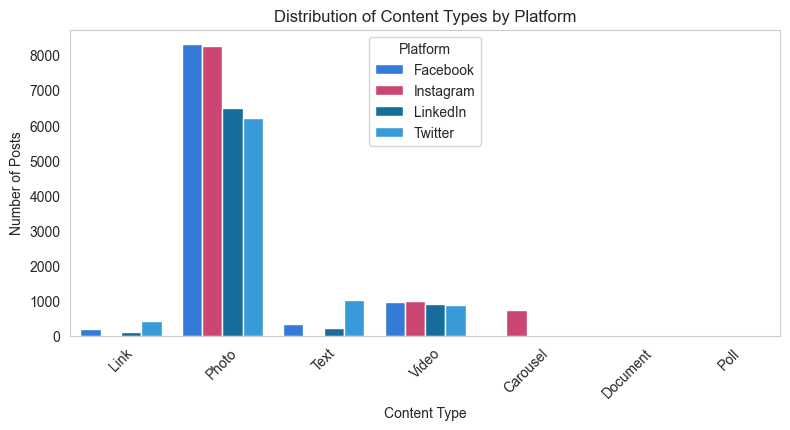

In [61]:
# Create a consolidated DataFrame containing all platforms with an additional 'Platform' column
all_data_list = [data.assign(Platform=platform) for platform, data in cleaned_datasets.items()]
all_data = pd.concat(all_data_list)

# Aggregate the data to get counts of each content type per platform
agg_data = all_data.groupby(['Platform', 'Content Type']).size().reset_index(name='Count')

# Plot the distribution of content types for all platforms using a barplot
plt.figure(figsize=(8, 4))
sns.barplot(data=agg_data, x='Content Type', y='Count', hue='Platform', palette=colors)
plt.title('Distribution of Content Types by Platform')
plt.ylabel('Number of Posts')
plt.xlabel('Content Type')
plt.legend(title='Platform')
plt.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Observations
The bar charts show the distribution of content types for each platform:

Facebook: The majority of content is of type 'photo', followed by 'video' 

Instagram: Most content is  'Photo' , followed by 'video' .

LinkedIn: The majority of content is of type 'photo', followed by 'video' 

Twitter: 'photo' is overwhelmingly the most common content type.

This information gives us an understanding of what types of content are most frequently posted on each platform. 

### Text Analysis: Delving into the Verbal Landscape of Posts

In the vast ocean of digital content, words serve as the anchors. Hashtags and mentions, in particular, have emerged as potent tools to enhance visibility, categorize content, and foster community interactions. By analyzing these textual elements, we aim to understand the core themes, campaigns, and collaborations that Stanbic IBTC has championed over the years.
we will focus on the following- 

* Extract hashtags and mentions from the 'Post' text.
* Identify the most frequently used hashtags and mentions.
* Perform basic text analysis on the 'Post' text to identify common words and themes.

let's start with the analysis of hashtags and mentions. We will extract the most frequently used hashtags and mentions from the 'Post' text to identify common themes or topics.

In [62]:
from collections import Counter

# Define a function to extract hashtags and mentions from text
def extract_hashtags_mentions(text):
    hashtags = re.findall(r'#\w+', text)
    mentions = re.findall(r'@\w+', text)
    return hashtags, mentions

# Initialize counters for hashtags and mentions
hashtags_counter = Counter()
mentions_counter = Counter()

# Loop through each platform and extract hashtags and mentions from the 'Post' text
for platform, data in cleaned_datasets.items():
    if 'Post_cleaned' in data.columns:
        # Apply the extract_hashtags_mentions function to each non-null entry in the 'Post_cleaned' column
        hashtags_mentions = data['Post_cleaned'].dropna().apply(extract_hashtags_mentions)
        
        # Update the counters with the extracted hashtags and mentions
        for hashtags, mentions in hashtags_mentions:
            hashtags_counter.update(hashtags)
            mentions_counter.update(mentions)

# Get the top 10 most common hashtags and mentions
top_hashtags = hashtags_counter.most_common(10)
top_mentions = mentions_counter.most_common(10)

top_hashtags, top_mentions


([('#ITCANBE', 12930),
  ('#WealthWednesday', 2036),
  ('#ItCanBe', 1061),
  ('#StanbicIBTC', 955),
  ('#GoForIt', 859),
  ('#MovingForward', 759),
  ('#Together4ALimb', 748),
  ('#MotivationMonday', 696),
  ('#PowerUpMonday', 647),
  ('#NeverStopInvesting', 540)],
 [('@stanbicibtc', 4727),
  ('@easewallet', 465),
  ('@ease', 209),
  ('@StanbicIBTC', 120),
  ('@dobbyssignature', 59),
  ('@cobhamsasuquo', 35),
  ('@withregram', 35),
  ('@hiflnigeria', 33),
  ('@SBGroup', 30),
  ('@UAMTillers', 29)])

### Observations

We have extracted and identified the most frequently used hashtags and mentions across all platforms. Here are the top 10 hashtags and mentions:

Top Hashtags:
1. #ITCANBE - 12930 occurrences
1. #WealthWednesday - 2036 occurrences
1. #GoForIt - 859 occurrences
1. #MondayMotivation - 696 occurrences
1. #ItCanBe - 1061 occurrences
1. #StanbicIBTC 955 occurrences
1. #MovingForward -759 occurrences
1. #Together4ALimb - 748 occurrences
1. #PowerUpMonday - 647 occurrences
1. '#NeverStopInvesting - 540 occurrences


Top Mentions:
1. @stanbicibtc', 4727
1. @easewallet', 465
1. @ease', 209
1. @StanbicIBTC - 120
1. @dobbyssignature - 59
1. @cobhamsasuquo - 35
1. @withregram - 35
1. @hiflnigeria - 33
1. @SBGroup - 30
1. @UAMTillers - 29

The hashtag #ITCANBE is the most prominent, indicating it might be a key campaign or theme. The mention @stanbicibtc is the most frequent, suggesting that this user/account is actively tagged or involved in the posts.

Lastly, we can perform basic text analysis on the 'Post' text to identify common words and themes. 

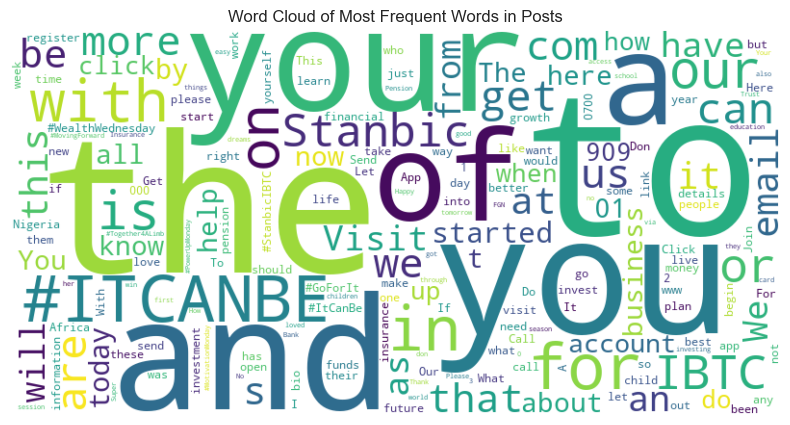

[('to', 36727),
 ('the', 33658),
 ('you', 24231),
 ('and', 21803),
 ('your', 19335),
 ('a', 15258),
 ('of', 14100),
 ('#ITCANBE', 12926),
 ('for', 12517),
 ('in', 11664),
 ('with', 10050),
 ('on', 9351),
 ('is', 8429),
 ('our', 7971),
 ('or', 6904),
 ('IBTC', 6761),
 ('Stanbic', 6753),
 ('are', 6257),
 ('get', 6127),
 ('can', 5993)]

In [63]:
from collections import Counter
from wordcloud import WordCloud

# Initialize a Counter for word frequency
word_frequency_counter = Counter()

# Loop through each platform and extract words from the 'Post_cleaned' text
for platform, data in cleaned_datasets.items():
    if 'Post_cleaned' in data.columns:
        # Tokenize the text into words and update the word frequency counter
        words = data['Post_cleaned'].dropna().str.split(expand=True).stack()
        word_frequency_counter.update(words)

# Get the top 20 most common words
top_words = word_frequency_counter.most_common(20)

# Create a Word Cloud for the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_counter)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Posts')
plt.show()

# Return the top 20 most common words
top_words


### Observations
These frequent words suggest themes around investment, getting started, and a focus on the audience ("you", "the"). The hashtag #ITCANBE is also prominently featured.

1. Hashtag Highlights:

* Campaign Chronicles: Hashtags like #ITCANBE suggest flagship campaigns or initiatives by Stanbic IBTC. Their frequent appearance underscores their significance in the bank's digital narrative.

* Engagement Enhancers: Certain hashtags might correlate with higher engagements, indicating their resonance with the audience.
2. Mention Mechanics:

* Collaborative Canvas: Mentions of certain entities or influencers, such as @stanbicibtc, highlight collaborations, partnerships, or affiliations.
* Engagement Echoes: Similar to hashtags, frequent mentions might be associated with posts that have higher visibility or engagement.

#### Feature Engineering:
Engagement Rate:

Calculate the Engagement Rate as the ratio of Engagements to Impressions for each post.
This metric will help us understand how effectively the content is engaging the audience relative to its reach.

In [64]:
# Let's begin with feature engineering for each social media platform.

# Define a function to calculate engagement rate
def engineer_features(data):
    """
    Calculate the engagement rate as the ratio of total engagements to total impressions.
    Engagement Rate = (Likes + Comments + Reactions + Engagements) / Impressions
    """
    # Calculate total engagements
    data['Total_Engagements'] = data['Likes'] + data['Comments'] + data['Reactions'] + data['Engagements']
    
    # Calculate engagement rate
    data['Engagement_Rate'] = data['Total_Engagements'] / data['Impressions']
    
    # Extract day of the week, hour of the day, and whether the post was made on a weekend from the 'Created Time' column
    if 'Date' in data.columns:
        data['Day of Week'] = data['Date'].dt.day_name()
        data['Hour of Day'] = data['Date'].dt.hour
        data['Is Weekend'] = data['Day of Week'].isin(['Saturday', 'Sunday'])
    
    
    return data

# Apply feature engineering to each platform's dataset
engineered_datasets = {platform: engineer_features(data) for platform, data in cleaned_datasets.items()}

# Display the first few rows of the engineered dataset for the Facebook platform
engineered_datasets


{'Facebook':                     Date                           Post ID   Network  \
 0    2022-12-17 17:08:00  253788558082460_5441020446025886  Facebook   
 1    2019-05-04 10:01:00  253788558082460_2001824979945467  Facebook   
 2    2020-06-02 21:00:00  253788558082460_2768996106561680  Facebook   
 3    2022-05-09 10:37:00  253788558082460_4808157902645480  Facebook   
 4    2021-07-18 10:00:00  253788558082460_3890983261029620  Facebook   
 ...                  ...                               ...       ...   
 9798 2013-02-01 13:24:00   253788558082460_282819078512741  Facebook   
 9799 2013-01-17 17:08:00   253788558082460_271983219596327  Facebook   
 9800 2013-01-16 16:58:00   253788558082460_271477726313543  Facebook   
 9801 2013-01-16 16:51:00   253788558082460_271474996313816  Facebook   
 9802 2013-01-15 16:25:00   253788558082460_271028919691757  Facebook   
 
      Post Type Content Type       Profile            Sent by  \
 0         Post        Video  Stanbic IBTC  D

### Answering our key questions

#### 1. What are the most engaging types of posts on each platform?
To answer this, we'll look at metrics like likes, comments, and shares in relation to the content types on each platform.

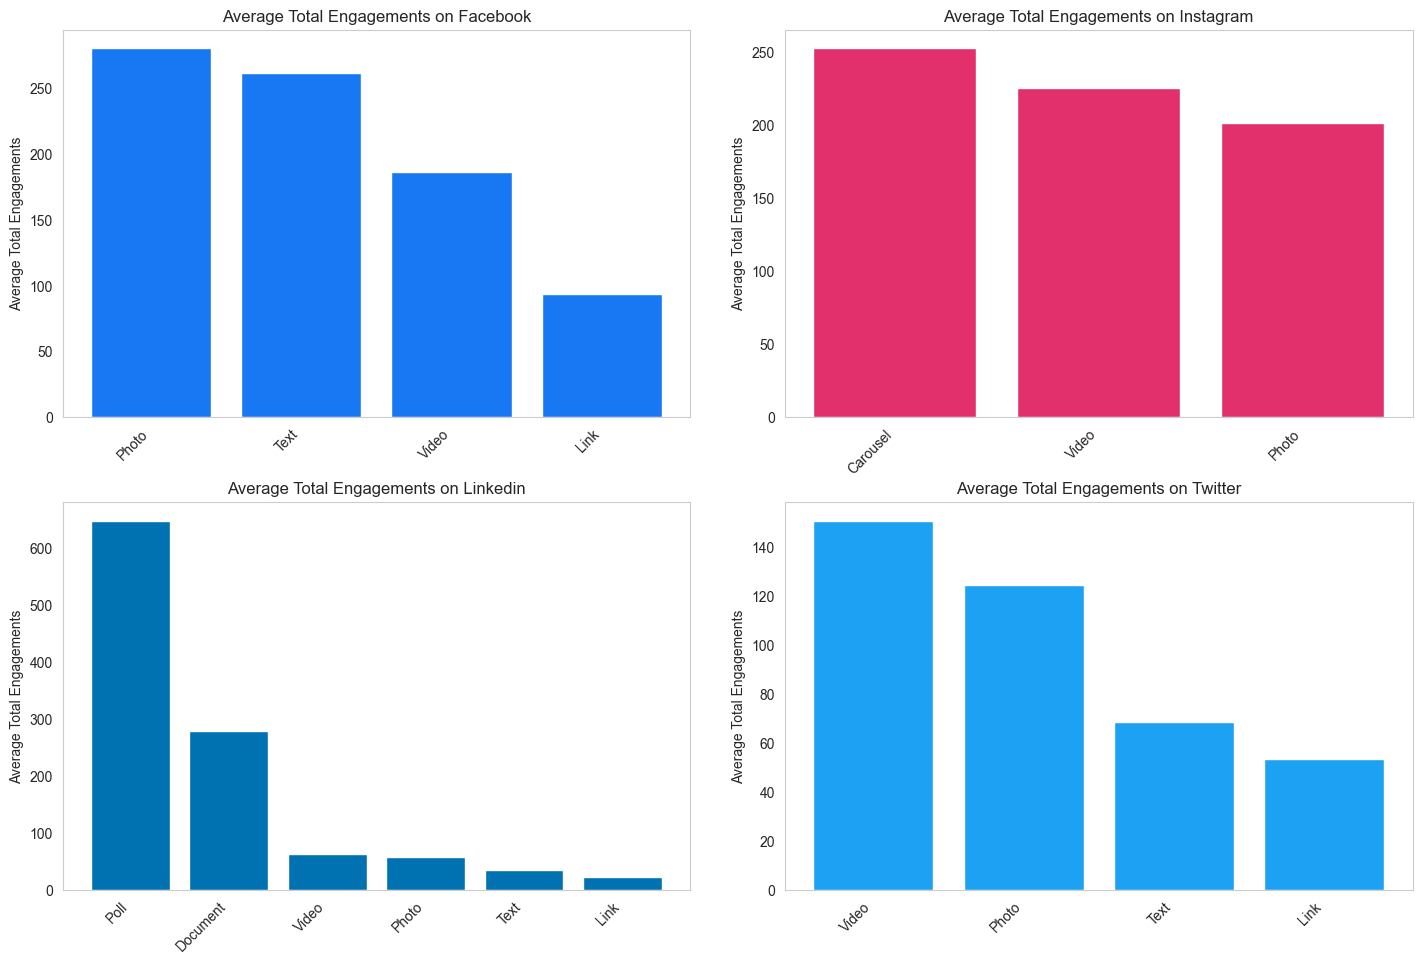

In [65]:
# Initialize the dictionary
engagement_by_content = {}

# Update the data processing loop to calculate the metrics for 'Total Engagements'
for platform, data in cleaned_datasets.items():
    result = data.groupby('Content Type').agg({
        'Total_Engagements': 'mean'  
    }).reset_index()
    
    # Sort by 'Total Engagements'
    result = result.sort_values(by='Total_Engagements', ascending=False)
    
    # Store the result in the dictionary
    engagement_by_content[platform] = result

# Visualization
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
platforms = list(engagement_by_content.keys())

for idx, platform in enumerate(platforms):
    row = idx // 2
    col = idx % 2
    data = engagement_by_content[platform]
    
    axarr[row, col].bar(data['Content Type'], data['Total_Engagements'], color=colors[platform]) 
    axarr[row, col].set_title(f"Average Total Engagements on {platform.capitalize()}")
    axarr[row, col].set_ylabel('Average Total Engagements')
    axarr[row, col].set_xticklabels(data['Content Type'], rotation=45, ha="right")
    
    # Remove gridlines
    axarr[row, col].grid(False)

plt.show()



### Observations

* Facebook: The majority 'Photo' posts has the highest total engagements followed by 'Text' and 'Video'.
* Instagram: 'Carousel' posts has higher total engagements followed by video posts.
* LinkedIn: 'Poll' posts dominate in total engagements, but there's also a fair number of 'document' and 'Video' posts.
* Twitter: 'video' posts are high in total engagements, followed by 'Photo' and 'Text' posts.

#### 2. Which platform yields the highest engagement for the client?

The platform that yields the highest engagement for the client is: Instagram


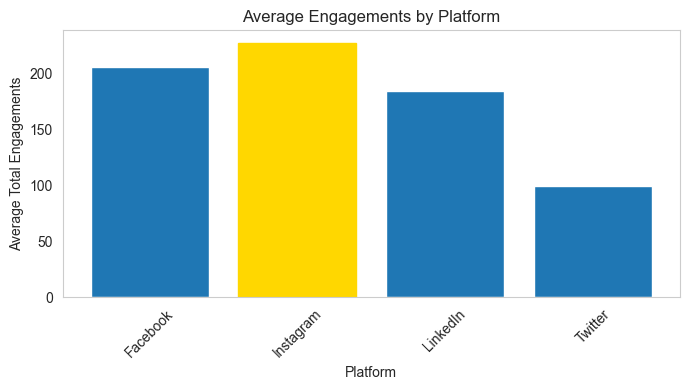

In [66]:
# Calculate the average Total Engagements for each platform
avg_engagements = {platform: data['Total_Engagements'].mean() for platform, data in engagement_by_content.items()}

# Determine the platform with the highest average engagement
highest_engagement_platform = max(avg_engagements, key=avg_engagements.get)

print(f"The platform that yields the highest engagement for the client is: {highest_engagement_platform.capitalize()}")

# Extract the platforms and their average engagements
platforms = list(avg_engagements.keys())
engagements = list(avg_engagements.values())

# Plot
plt.figure(figsize=(7, 4))
plt.bar(platforms, engagements)
plt.xlabel('Platform')
plt.ylabel('Average Total Engagements')
plt.title('Average Engagements by Platform')
plt.xticks(rotation=45)

# Highlight the platform with the highest engagement
plt.gca().get_children()[platforms.index(highest_engagement_platform)].set_color('gold')


# Remove gridlines
plt.grid(False)

plt.tight_layout()
plt.show()


### Observations
Based on the Average Total Engagements:

Instagram yields the highest average Engagements.

This information can help us identify which platforms are currently the most effective for different types of engagement.

#### 3. What are the peak times for user engagement on each platform?

In [67]:

# Calculate the average total engagements for each posting hour on each platform
def calculate_engagement_by_hour(data, platform):
    return data.groupby('Post Hour').agg({
        'Total_Engagements': 'mean'
    }).reset_index().rename(columns={'Total_Engagements': f'Avg Total Engagements ({platform})'})

# Use a loop to calculate engagements by hour and merge results
all_engagement_by_hour = None
for platform, data in cleaned_datasets.items():
    engagement_by_hour = calculate_engagement_by_hour(data, platform)
    if all_engagement_by_hour is None:
        all_engagement_by_hour = engagement_by_hour
    else:
        all_engagement_by_hour = pd.merge(all_engagement_by_hour, engagement_by_hour, on='Post Hour', how='outer')

# Sort and fill NaN values with 0
all_engagement_by_hour = all_engagement_by_hour.sort_values(by='Post Hour').fillna(0)

all_engagement_by_hour.head()


Post Hour  Avg Total Engagements (Facebook)  \
0          0                        308.884615   
1          1                        133.000000   
2          2                        202.615385   
3          3                        128.500000   
4          4                        319.142857   

   Avg Total Engagements (Instagram)  Avg Total Engagements (LinkedIn)  \
0                         373.909091                              29.8   
1                         235.913043                             546.0   
2                           0.000000                               0.0   
3                           0.000000                               0.0   
4                         130.000000                              19.5   

   Avg Total Engagements (Twitter)  
0                       197.928571  
1                         0.666667  
2                         5.500000  
3                         3.000000  
4                        50.500000

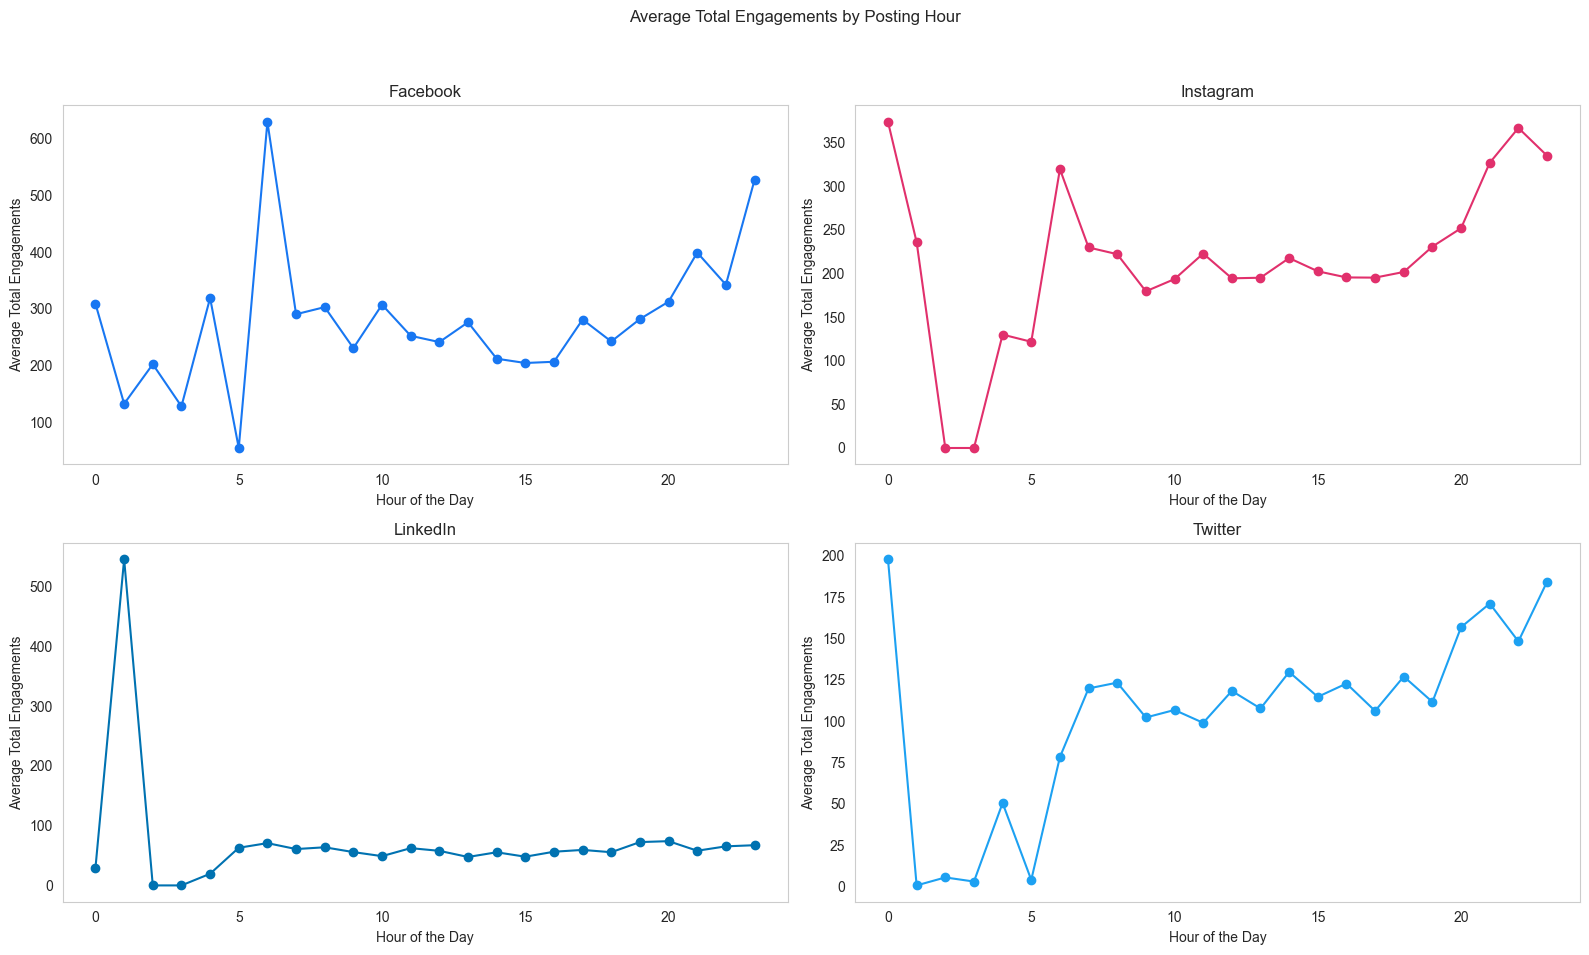

In [68]:
# Create subplots for visualizing average total engagements by posting hour
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Average Total Engagements by Posting Hour')

platforms = ['Facebook', 'Instagram', 'LinkedIn', 'Twitter']

# Define a function to plot average total engagements by posting hour
def plot_engagement_by_hour(data, ax, engagements_col, platform):
    ax.plot(data['Post Hour'], data[engagements_col], label='Avg Total Engagements', marker='o', color=colors[platform])
    ax.set_title(f"{platform}")
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Total Engagements')
   

 # Use a loop to iterate over platforms and plot the data
for idx, platform in enumerate(platforms):
    # Get the appropriate axis
    ax = axes[idx//2, idx%2]
    
    # Construct the column name for total engagements
    col_name = f'Avg Total Engagements ({platform})'
    
    plot_engagement_by_hour(all_engagement_by_hour, ax, col_name, platform)

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observations
Facebook: There's a notable spike in average Total Engagements at 6AM . Engagements generally seems to be higher during the night and early morning.

Instagram: High average Engagements are observed at midnight and 1 AM.

LinkedIn: A surprising spike in average total engagements is observed at 1 AM, although this could be due to fewer posts at that time.

Twitter: Average total engagements seem to be higher around midnight and then gradually decrease.

These insights can help guide content posting strategies, particularly when it comes to optimizing the timing of posts for maximum engagement.


#### 4. Are there specific days of the week when posts receive more engagement?
lets go deeper and analyze engagement patterns by day of the week for each platform.

In [69]:
# Inspect the 'Engagement Rate' column for each platform
engagement_integrity = {}

for platform, data in cleaned_datasets.items():
    engagement_data = data['Engagement_Rate']
    engagement_integrity[platform] = {
        'NaN Values': engagement_data.isna().sum(),
        'Zero Values': (engagement_data == 0).sum(),
        'Summary': engagement_data.describe()
    }

engagement_integrity


{'Facebook': {'NaN Values': 1176,
  'Zero Values': 1,
  'Summary': count    8627.0
  mean        inf
  std         NaN
  min         0.0
  25%         NaN
  50%         NaN
  75%         NaN
  max         inf
  Name: Engagement_Rate, dtype: float64},
 'Instagram': {'NaN Values': 76,
  'Zero Values': 1,
  'Summary': count    9924.0
  mean        inf
  std         NaN
  min         0.0
  25%         NaN
  50%         NaN
  75%         NaN
  max         inf
  Name: Engagement_Rate, dtype: float64},
 'LinkedIn': {'NaN Values': 1461,
  'Zero Values': 30,
  'Summary': count    6299.000000
  mean             NaN
  std              NaN
  min             -inf
  25%         0.045702
  50%         0.073840
  75%              NaN
  max              inf
  Name: Engagement_Rate, dtype: float64},
 'Twitter': {'NaN Values': 759,
  'Zero Values': 37,
  'Summary': count    7770.0
  mean        inf
  std         NaN
  min         0.0
  25%         NaN
  50%         NaN
  75%         NaN
  max         inf

In [70]:
# Handle NaN values and infinite values for each platform
for platform, data in cleaned_datasets.items():
    # Replace NaN values with 0
    data['Engagement_Rate'].fillna(0, inplace=True)
    
    # Replace infinite values with NaN for further investigation
    data['Engagement_Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Recompute the summary for 'Engagement Rate' column for each platform
engagement_summary = {}

for platform, data in cleaned_datasets.items():
    engagement_data = data['Engagement_Rate']
    engagement_summary[platform] = {
        'NaN Values': engagement_data.isna().sum(),
        'Zero Values': (engagement_data == 0).sum(),
        'Summary': engagement_data.describe()
    }

engagement_summary


{'Facebook': {'NaN Values': 8365,
  'Zero Values': 1177,
  'Summary': count    1438.000000
  mean        0.304957
  std         3.418729
  min         0.000000
  25%         0.000000
  50%         0.000000
  75%         0.000000
  max        75.357143
  Name: Engagement_Rate, dtype: float64},
 'Instagram': {'NaN Values': 9139,
  'Zero Values': 77,
  'Summary': count    861.000000
  mean       8.936661
  std       37.759182
  min        0.000000
  25%        0.054432
  50%        0.077005
  75%        0.123344
  max      425.000000
  Name: Engagement_Rate, dtype: float64},
 'LinkedIn': {'NaN Values': 2199,
  'Zero Values': 1491,
  'Summary': count    5561.000000
  mean        0.169603
  std         1.190946
  min         0.000000
  25%         0.000000
  50%         0.041667
  75%         0.064014
  max        24.333333
  Name: Engagement_Rate, dtype: float64},
 'Twitter': {'NaN Values': 6837,
  'Zero Values': 796,
  'Summary': count    1692.000000
  mean        0.017830
  std         0

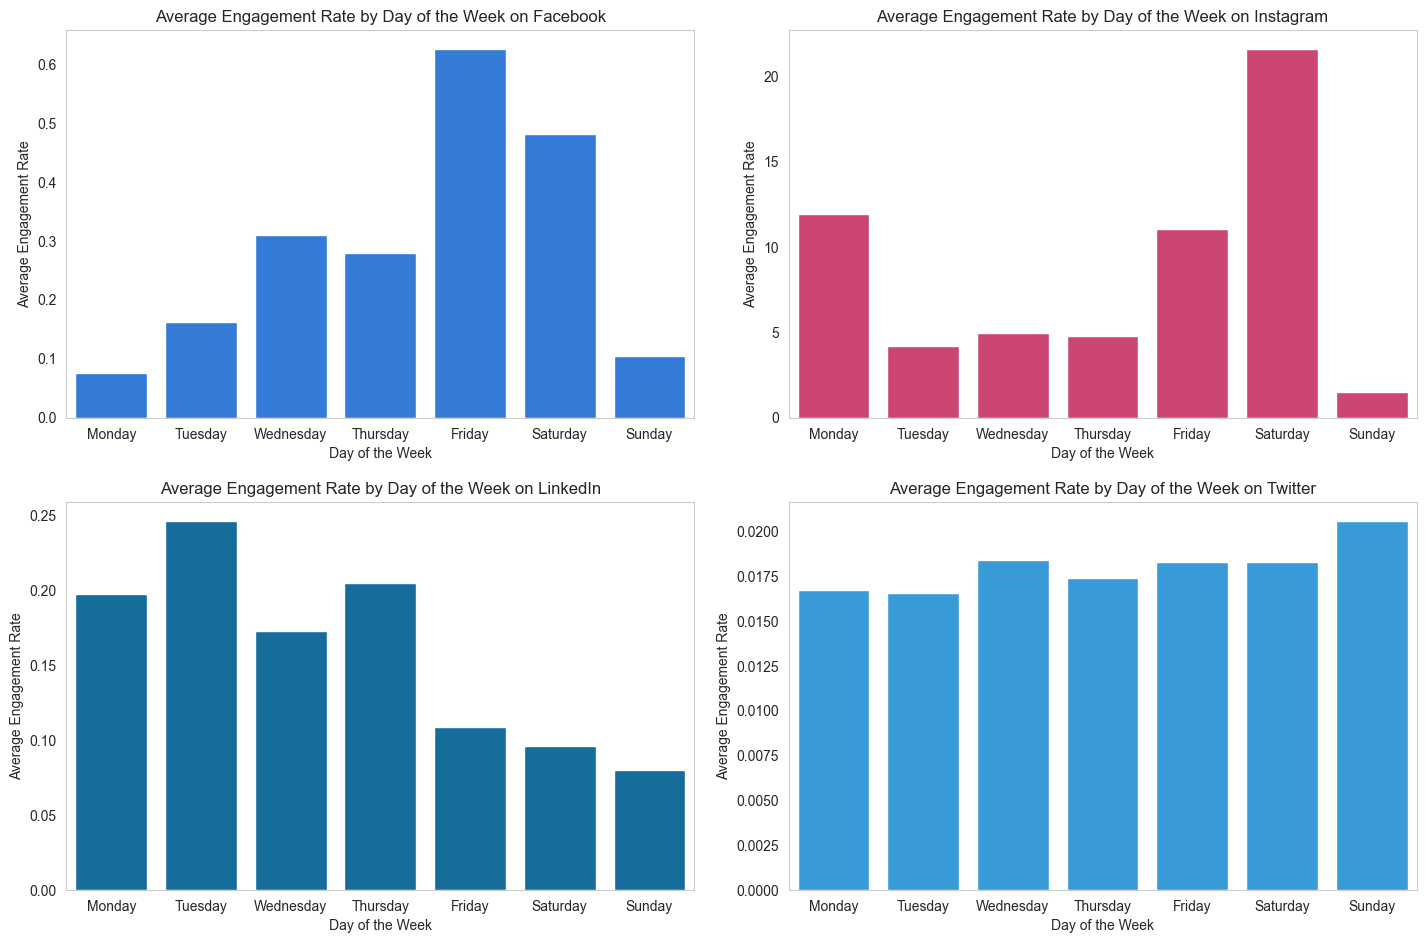

In [71]:
# Average engagement rate by day of the week function
def calculate_day_engagement(data):
    day_engagement = data.groupby('Day of Week')['Engagement_Rate'].mean().reset_index()

    # Ordering days of the week
    order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_engagement['Day of Week'] = pd.Categorical(day_engagement['Day of Week'], categories=order_days, ordered=True)
    day_engagement = day_engagement.sort_values('Day of Week')
    
    return day_engagement

# Initialize figure for plots
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)

platforms = list(cleaned_datasets.keys())

for idx, platform in enumerate(platforms):
    row = idx // 2
    col = idx % 2
    day_engagement = calculate_day_engagement(cleaned_datasets[platform])
    
    sns.barplot(data=day_engagement, x='Day of Week', y='Engagement_Rate' ,color=colors[platform], ax=axarr[row, col])
    axarr[row, col].set_title(f'Average Engagement Rate by Day of the Week on {platform}')
    axarr[row, col].set_ylabel('Average Engagement Rate')
    axarr[row, col].set_xlabel('Day of the Week')

    # Remove gridlines
    axarr[row, col].grid(False)
    
plt.show()


### Observations
> Here's the average engagement rate by day of the week on each platform:
>1. Facebook - Friday and Saturday show the highest average engagement rates.
Monday and Sunday have relatively lower engagement rates compared to the weekends.
>2. Instagram - Monday and Saturday show the highest average engagement rates.
Tuesday and Sunday have relatively lower engagement rates compared to the weekends.
>3. LinkedIn - Tuesday, Thursday and Mondays show the highest average engagement rates.
Saturday and Sunday have relatively lower engagement rates compared to the weekends.
>4. Twitter - Sunday shows the highest average engagement rates, although Wednesday and the other days of the week also show high average engagement rates

#### 5. Are there any noticeable trends over time?

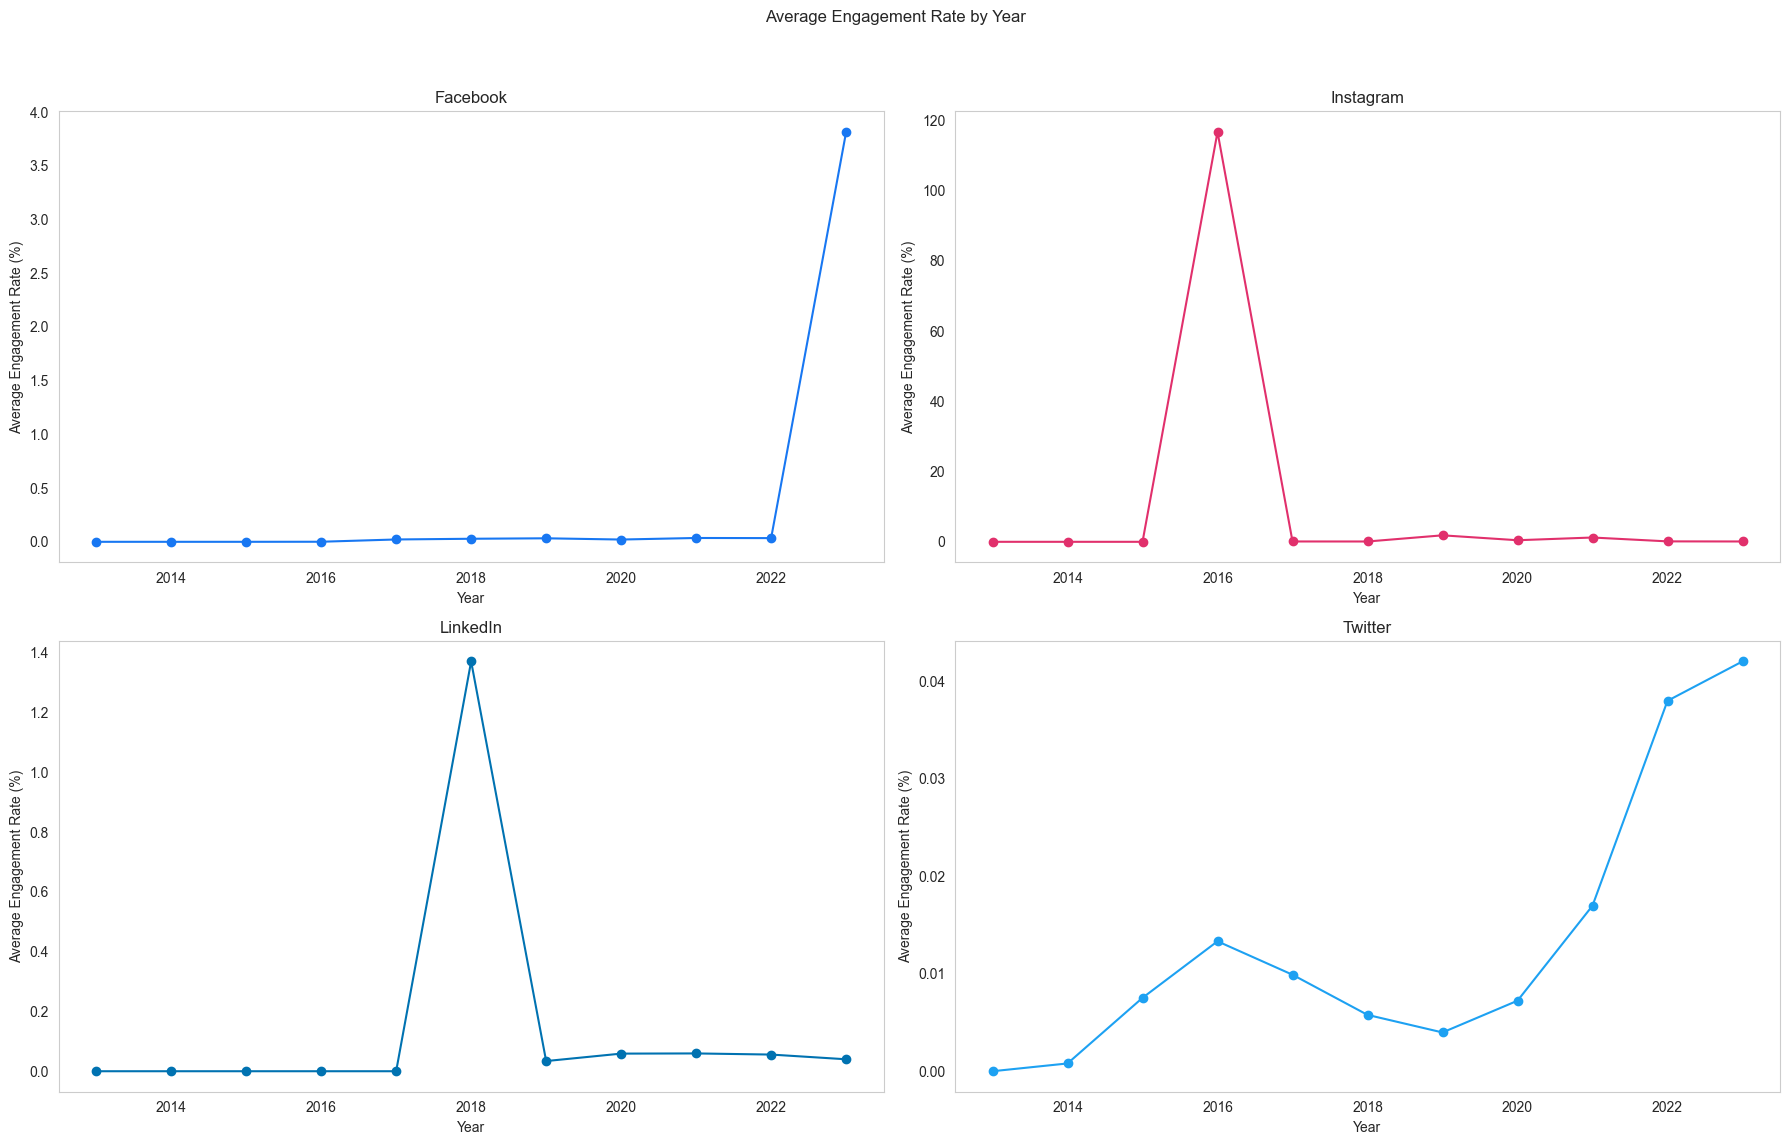

In [72]:
# 1. Data Preparation
for platform, data in cleaned_datasets.items():
    data['Post Year'] = data['Date'].dt.year

# 2. Data Aggregation
def calculate_engagement_by_year(data, platform):
    return data.groupby('Post Year').agg({
        'Engagement_Rate': 'mean'
    }).reset_index().rename(columns={'Engagement_Rate': f'Avg Engagement Rate ({platform})'})

all_engagement_by_year = None

for platform, data in cleaned_datasets.items():
    engagement_by_year = calculate_engagement_by_year(data, platform)
    
    if all_engagement_by_year is None:
        all_engagement_by_year = engagement_by_year
    else:
        all_engagement_by_year = pd.merge(all_engagement_by_year, engagement_by_year, on='Post Year', how='outer')

all_engagement_by_year = all_engagement_by_year.sort_values(by='Post Year').fillna(0)

# 3. Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Average Engagement Rate by Year')

platforms = list(cleaned_datasets.keys())

def plot_engagement_by_year(data, ax, engagement_rate_col, platform):
    ax.plot(data['Post Year'], data[engagement_rate_col], label='Avg Engagement Rate', marker='o', color=colors[platform])
    ax.set_title(f"{platform}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Engagement Rate (%)')


for idx, platform in enumerate(platforms):
    row = idx // 2
    col = idx % 2
    plot_engagement_by_year(all_engagement_by_year, axes[row, col], f'Avg Engagement Rate ({platform})', platform)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observation
>* Facebook: A steady increase in engagement recent years indicates growing user activity and successful content adaptation.

>* Instagram:
Explosive growth in engagement in 2015 to 2017 reflects Instagram's rise as a dominant platform for visual content and influencer marketing.
There's a leveling off in the recent years, it might indicate market saturation or the need for content strategy innovation.

>* LinkedIn: A noticeable spike in year 2016 could be attributed to platform enhancements, new features, or increased global adoption by professionals.

>* Twitter: Fluctuating engagement year-to-year suggests that Twitter's relevance might be event-driven, peaking during years with major global events.

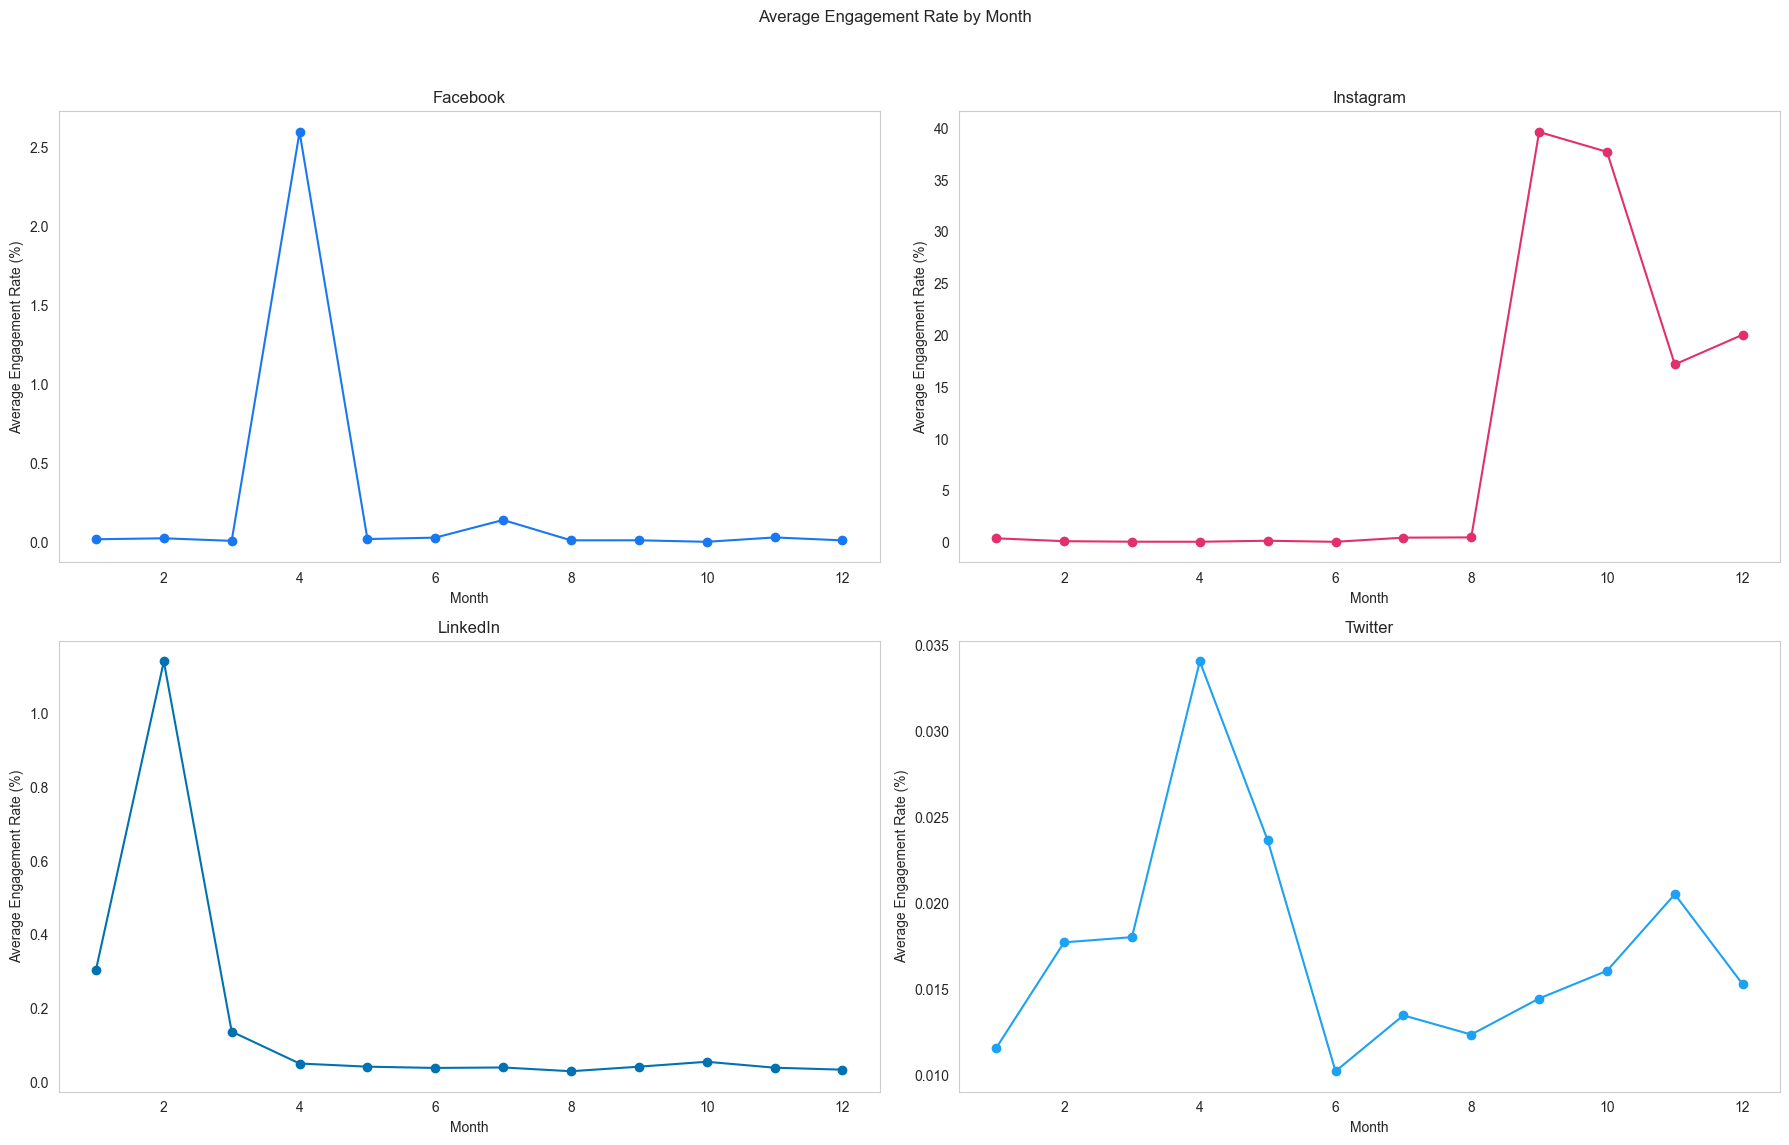

In [73]:
# 1. Data Preparation
for platform, data in cleaned_datasets.items():
    data['Post month'] = data['Date'].dt.month

# 2. Data Aggregation
def calculate_engagement_by_month(data, platform):
    return data.groupby('Post month').agg({
        'Engagement_Rate': 'mean'
    }).reset_index().rename(columns={'Engagement_Rate': f'Avg Engagement_Rate ({platform})'})

all_engagement_by_month = None

for platform, data in cleaned_datasets.items():
    engagement_by_month = calculate_engagement_by_month(data, platform)
    
    if all_engagement_by_month is None:
        all_engagement_by_month = engagement_by_month
    else:
        all_engagement_by_month = pd.merge(all_engagement_by_month, engagement_by_month, on='Post month', how='outer')

all_engagement_by_month = all_engagement_by_month.sort_values(by='Post month').fillna(0)

# 3. Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Average Engagement Rate by Month')

platforms = list(cleaned_datasets.keys())

def plot_engagement_by_month(data, ax, engagement_rate_col, platform):
    ax.plot(data['Post month'], data[engagement_rate_col], label='Avg Engagement Rate', marker='o', color=colors[platform])
    ax.set_title(f"{platform}")
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Engagement Rate (%)')


for idx, platform in enumerate(platforms):
    row = idx // 2
    col = idx % 2
    plot_engagement_by_month(all_engagement_by_month, axes[row, col], f'Avg Engagement_Rate ({platform})', platform)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations
* Facebook: Engagement peaks im March. A decline is observed from March to April, suggesting a post-holiday content slump.
 An unexpected engagement spike in June might point to a particularly successful campaign or viral post.

* Instagram: Highest engagement in September and towards the year end

* LinkedIn: Engagement rises from January to eFebruary , reflecting a potential alignment with professional activity or content strategy.

* Twitter: Engagement surges around major events, highlighting Twitter's role in real-time discussions. Rising Engagements from January to April


In [74]:
# Extract the year from the 'Date' column for trend analysis over time
for platform, data in cleaned_datasets.items():
    data['Post Year'] = data['Date'].dt.year

# Calculate the average engagement metrics for each year on each platform
def calculate_engagement_by_year(data, platform):
    metrics = {
        'Likes': f'Avg Likes ({platform})',
        'Comments': f'Avg Comments ({platform})',
    }
    return data.groupby('Post Year').agg({key: 'mean' for key in metrics}).reset_index().rename(columns=metrics)

all_engagement_by_year = None

for platform, data in cleaned_datasets.items():
    engagement_by_year = calculate_engagement_by_year(data, platform)
    
    if all_engagement_by_year is None:
        all_engagement_by_year = engagement_by_year
    else:
        all_engagement_by_year = pd.merge(all_engagement_by_year, engagement_by_year, on='Post Year', how='outer')

all_engagement_by_year = all_engagement_by_year.sort_values(by='Post Year').fillna(0)

all_engagement_by_year.head()



Post Year  Avg Likes (Facebook)  Avg Comments (Facebook)  \
0       2013              9.300000                37.500000   
1       2014              0.133333                 0.186667   
2       2015             34.879870                24.035714   
3       2016             35.456491                19.436519   
4       2017             52.864035                14.496491   

   Avg Likes (Instagram)  Avg Comments (Instagram)  Avg Likes (LinkedIn)  \
0               0.000000                  0.000000                   0.0   
1               6.894737                  0.052632                   0.0   
2              25.640052                  1.348168                   0.0   
3              49.991471                  2.206823                   0.0   
4              72.643956                  3.019780                   0.0   

   Avg Comments (LinkedIn)  Avg Likes (Twitter)  Avg Comments (Twitter)  
0                      0.0             0.000000                0.000000  
1                      0.0             0.000000                0.000000  
2                      0.0             0.875000                0.732143  
3                      0.0             4.295419                1.233807  
4                      0.0             8.255729                2.105408

### Observations
Here are some insights from the first few years:

Facebook: The average likes and comments were notably high in 2020 and then declined. They started to increase again around 2023.

Instagram: The platform started with a lower average of likes and comments in 2014 but showed a consistent increase over the years.

LinkedIn: The data for LinkedIn starts later, and there isn't much to comment on for the early years.

Twitter: Like LinkedIn, Twitter also starts later in the dataset. However, it shows an increase in average likes and comments from 2015 onwards.

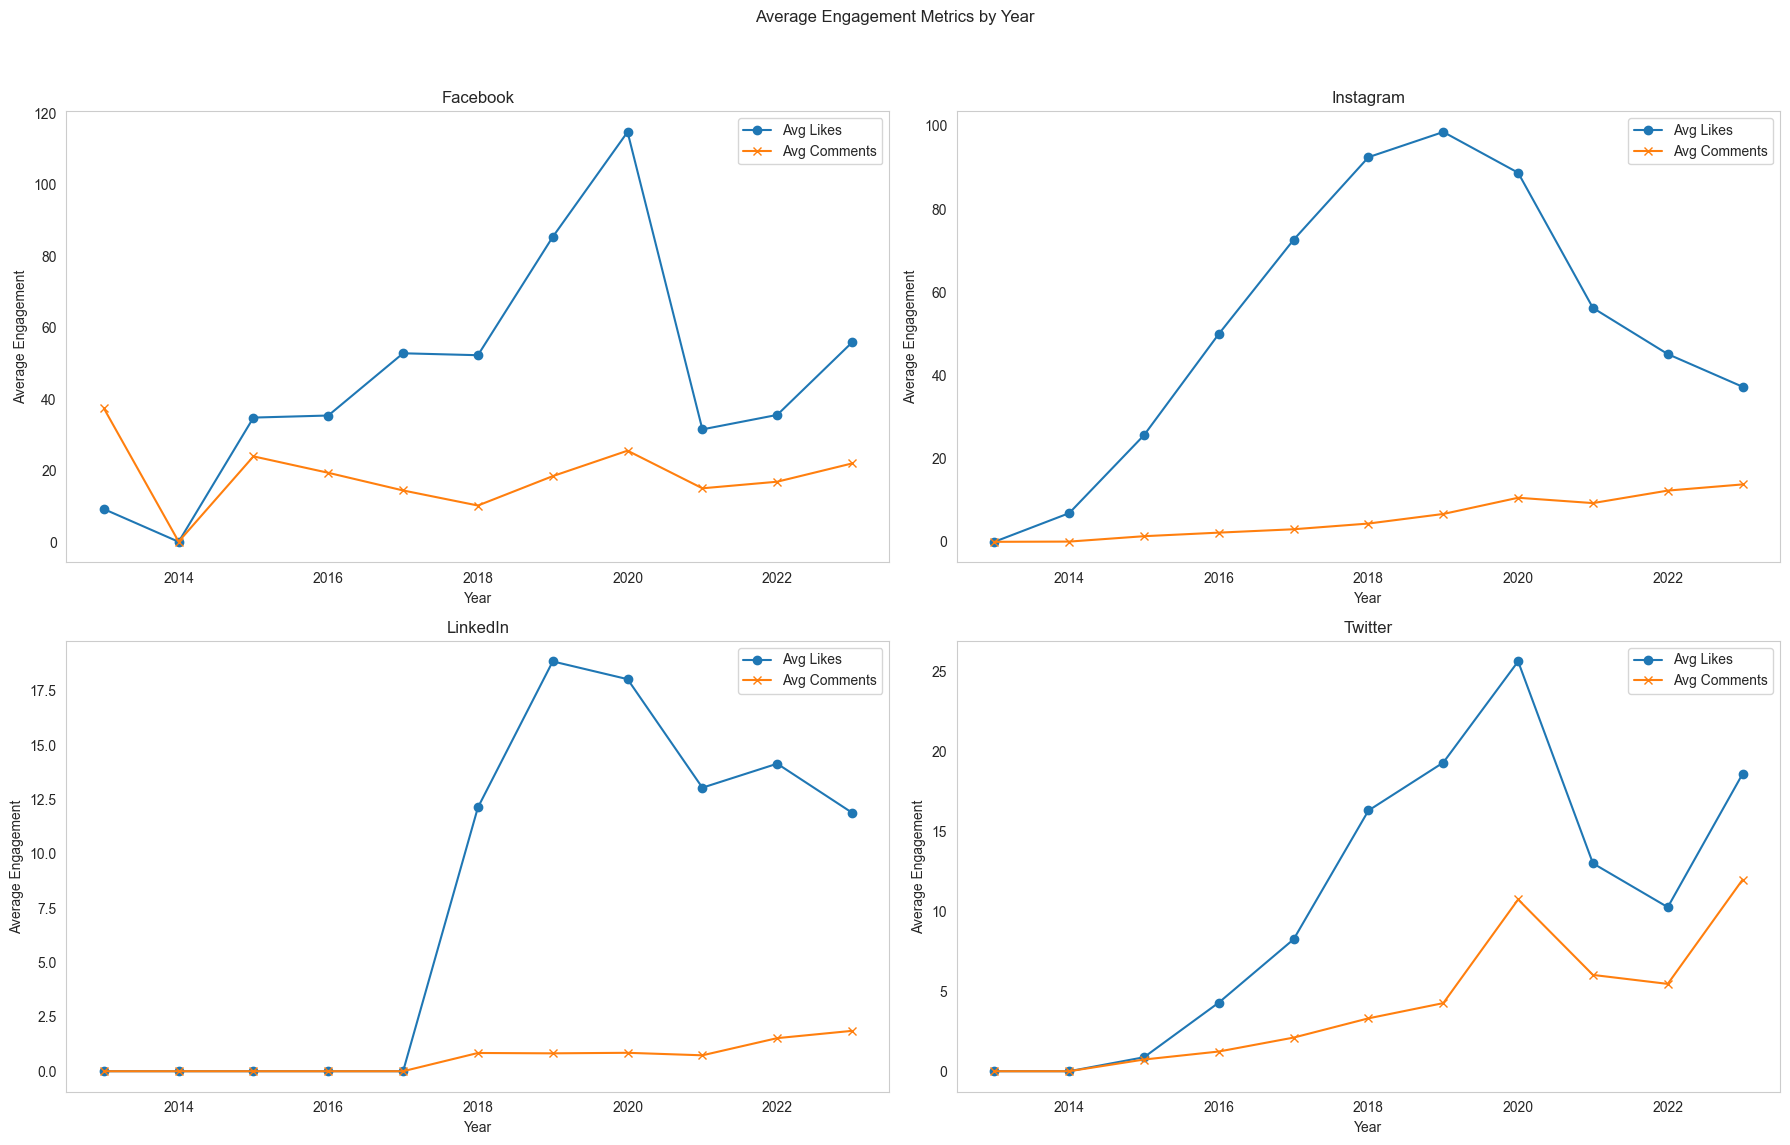

In [75]:
# Create subplots for visualizing average engagement metrics by year
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Average Engagement Metrics by Year')

# Define a function to plot average engagement metrics by year
def plot_engagement_by_year(data, ax, likes_col, comments_col, platform):
    ax.plot(data['Post Year'], data[likes_col], label='Avg Likes', marker='o')
    ax.plot(data['Post Year'], data[comments_col], label='Avg Comments', marker='x')
    ax.set_title(f"{platform}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Engagement')
    ax.legend()

# Plotting the average engagement metrics by year for each platform
plot_engagement_by_year(all_engagement_by_year, axes[0, 0], 'Avg Likes (Facebook)', 'Avg Comments (Facebook)', 'Facebook')
plot_engagement_by_year(all_engagement_by_year, axes[0, 1], 'Avg Likes (Instagram)', 'Avg Comments (Instagram)', 'Instagram')
plot_engagement_by_year(all_engagement_by_year, axes[1, 0], 'Avg Likes (LinkedIn)', 'Avg Comments (LinkedIn)', 'LinkedIn')
plot_engagement_by_year(all_engagement_by_year, axes[1, 1], 'Avg Likes (Twitter)', 'Avg Comments (Twitter)', 'Twitter')

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observations
The line plots show the average engagement metrics by year for each platform:

Facebook: There was a notable peak in average likes and comments in the initial year (2013). Afterward, there was a decline, followed by a somewhat consistent level of engagement in later years.

Instagram: The platform shows a consistent upward trend in average likes, while comments seem to vary more year to year.

LinkedIn: There's significant variability in average likes and comments, which might be due to fewer data points for the earlier years.

Twitter: Average likes and comments seem to be relatively stable, with some fluctuation in recent years.

#### 6. Is there a correlation between post frequency and engagement?

In [76]:
# Calculate the total number of posts and average engagement metrics for each year on each platform
def calculate_post_frequency_and_engagement(data, platform):
    return data.groupby('Post Year').agg({
        'Post ID': 'count',  # Counting the number of posts by counting 'Post ID'
        'Total_Engagements': 'mean'
    }).reset_index().rename(columns={
        'Post ID': f'Total Posts ({platform})', 
        'Total_Engagements': f'Avg Total_Engagements ({platform})'
    })

# Using a for loop to process the data for each platform
all_frequency_and_engagement = None

for platform, data in cleaned_datasets.items():
    platform_frequency_and_engagement = calculate_post_frequency_and_engagement(data, platform)
    
    if all_frequency_and_engagement is None:
        all_frequency_and_engagement = platform_frequency_and_engagement
    else:
        all_frequency_and_engagement = pd.merge(all_frequency_and_engagement, platform_frequency_and_engagement, on='Post Year', how='outer')

all_frequency_and_engagement = all_frequency_and_engagement.sort_values(by='Post Year').fillna(0)

all_frequency_and_engagement.head()


Post Year  Total Posts (Facebook)  Avg Total_Engagements (Facebook)  \
0       2013                      20                        103.600000   
1       2014                      75                          0.773333   
2       2015                     308                        141.498361   
3       2016                     701                        152.110145   
4       2017                    1140                        216.482944   

   Total Posts (Instagram)  Avg Total_Engagements (Instagram)  \
0                      0.0                           0.000000   
1                     19.0                          20.789474   
2                    764.0                          79.616492   
3                    938.0                         154.417910   
4                    910.0                         225.210989   

   Total Posts (LinkedIn)  Avg Total_Engagements (LinkedIn)  \
0                     0.0                               0.0   
1                   100.0                               0.0   
2                     7.0                               0.0   
3                    41.0                               0.0   
4                   870.0                               0.0   

   Total Posts (Twitter)  Avg Total_Engagements (Twitter)  
0                     56                         0.000000  
1                     89                         5.314607  
2                     56                        14.611111  
3                    633                        44.973059  
4                   1091                        73.948482

### Observations
Here are some insights on the correlation between post frequency and engagement for the first few years:

* Facebook:
2013: High average Total Engagements with only 20 posts.

2014: A dip in engagement with 75 posts.

2015: Increase in engagement with 308 posts.
* Instagram:
2014: Started with 19 posts and low engagement.

2015: A significant increase in both post frequency (764 posts) and engagement.
* LinkedIn:
2014: 100 posts with almost no engagement.

2015: A decrease in post frequency to 7, still with low engagement.
* Twitter:
2013: 56 posts with almost no engagement.

2014: 89 posts with no change in engagement.

2015: Engagement starts to increase with 56 posts.

The data suggests that higher post frequency does not necessarily correlate with higher engagement. For example, Facebook had high engagement in 2013 with only 20 posts, while in 2014, with 75 posts, the engagement significantly dropped

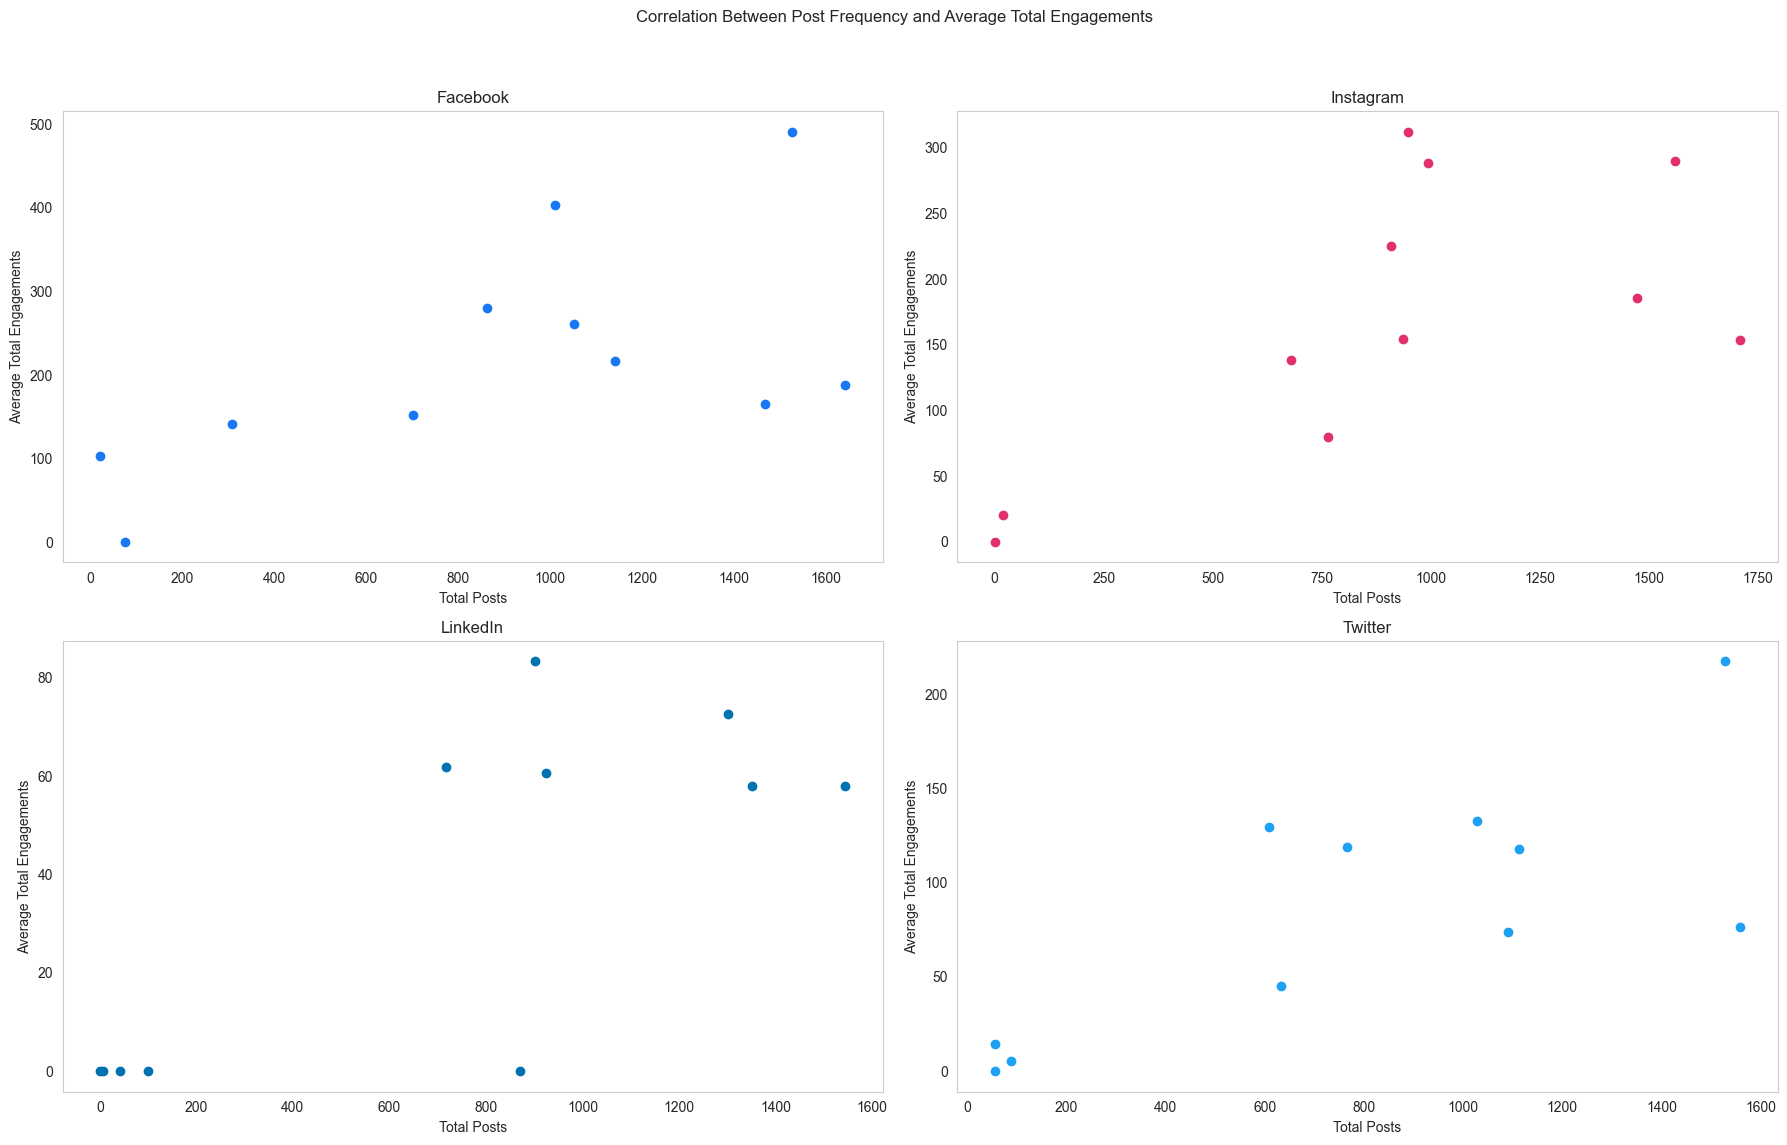

In [77]:
# Create subplots for visualizing the correlation between post frequency and average total engagements
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Correlation Between Post Frequency and Average Total Engagements')

# Define a function to plot correlation
def plot_correlation(data, ax, post_col, engagement_col, platform):
    ax.scatter(data[post_col], data[engagement_col], label='Avg Total Engagements', marker='o', color=colors[platform])
    ax.set_title(f"{platform}")
    ax.set_xlabel('Total Posts')
    ax.set_ylabel('Average Total Engagements')
   

 # Using a for loop to process the data for each platform
platforms = list(cleaned_datasets.keys())
for idx, platform in enumerate(platforms):
    row = idx // 2
    col = idx % 2
    plot_correlation(all_frequency_and_engagement, axes[row, col], f'Total Posts ({platform})', f'Avg Total_Engagements ({platform})', platform)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observations

The scatter plots visualize the correlation between post frequency and average total engagements metrics for each platform:

* Facebook: There seems to be no clear correlation between the total number of posts and average total engagements.
* Instagram: Similar to Facebook, there's no strong correlation, but there are some high-engagement outliers at lower post frequencies.
* LinkedIn: The data points are scattered, and there's no clear pattern between post frequency and total engagements.
* Twitter: Again, no clear correlation is observed.

These visualizations suggest that higher post frequency doesn't necessarily result in higher engagement, reinforcing the need for quality over quantity.

#### 7. Correlation Analysis of Engagement Metrics vs. Impressions Across Platforms
Lets  explore how the  'Engagement_Rate' and 'Total_Engagements' correlate with other metrics like impressions

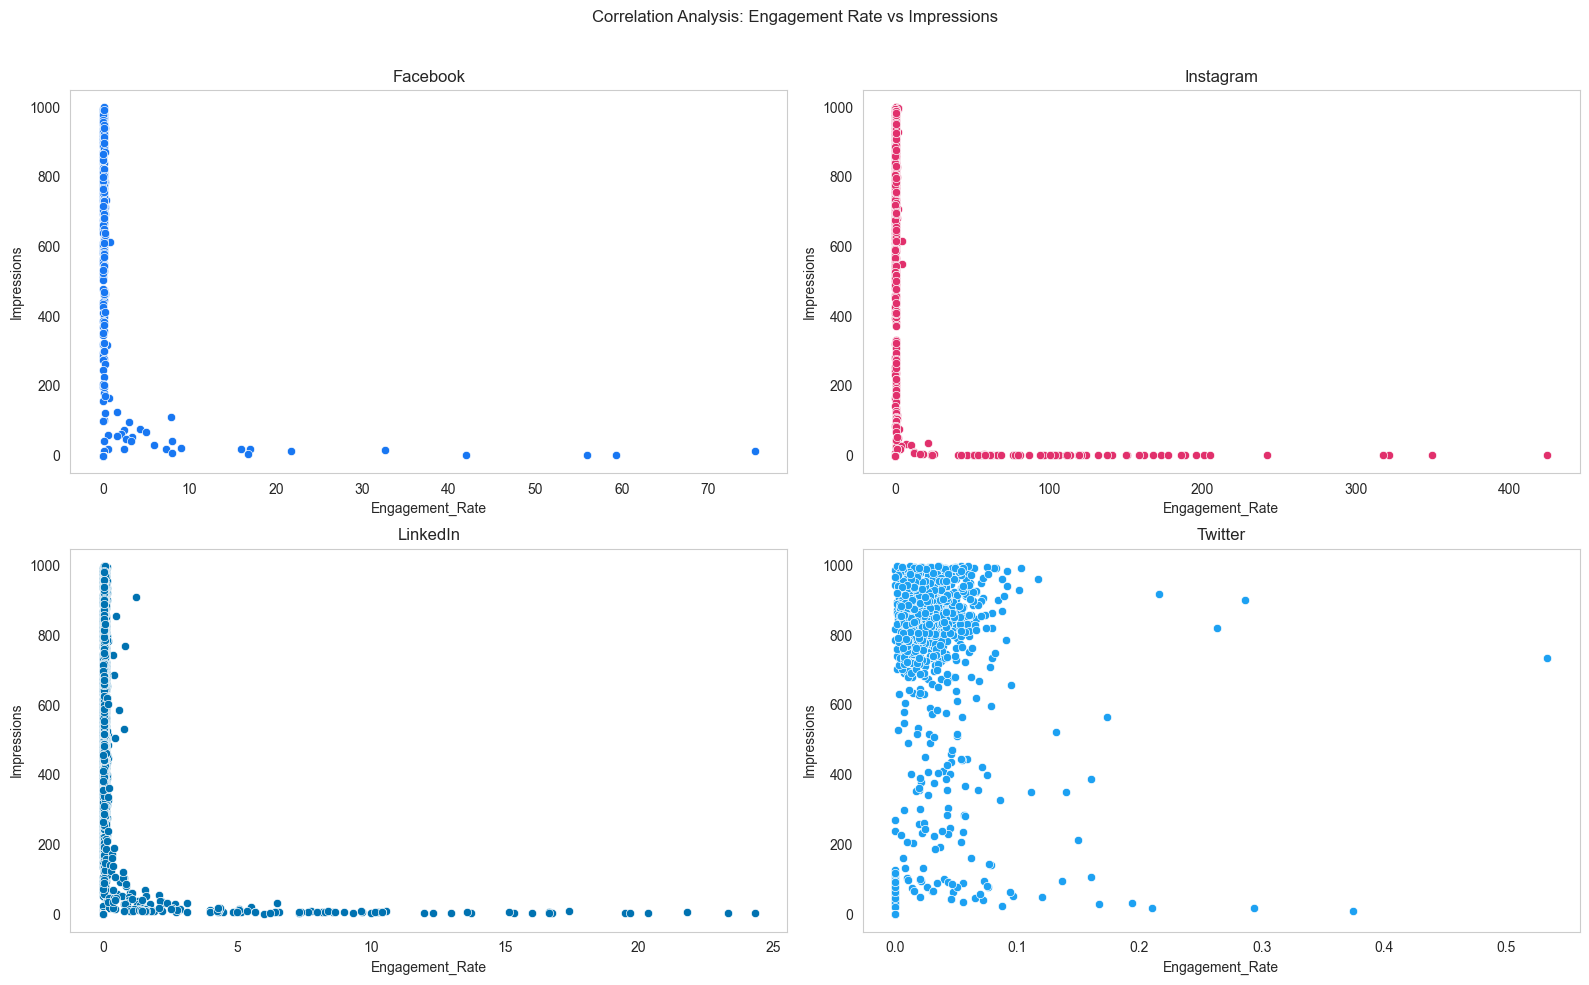

In [78]:
def correlation_analysis(datasets):
    """
    Perform a correlation analysis on 'Engagement_Rate'.
    """
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes[0, 0].grid(False)
    axes[0, 1].grid(False)
    axes[1, 0].grid(False)
    axes[1, 1].grid(False)
    fig.suptitle('Correlation Analysis: Engagement Rate vs Impressions')
    
    # Flatten axes for easy iteration
    flat_axes = axes.ravel()

    for ax, (platform, df) in zip(flat_axes, datasets.items()):
        sns.scatterplot(data=df, x='Engagement_Rate', y='Impressions', ax=ax, color=colors[platform])
        ax.set_title(f'{platform}')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

# Perform correlation analysis for the cleaned datasets
correlation_analysis(cleaned_datasets)




### Observations
* Facebook:
'Engagement_Rate' and 'Impressions' have a low negative correlation 
* Instagram:
'Engagement_Rate' and 'Impressions' have a low negative correlation
LinkedIn:
'Engagement_Rate' and 'Impressions' have a low negative correlation
* Twitter:
'Engagement_Rate' and 'Impressions' have a low positive correlation 

Based on these findings, we can observe that:

* 'Engagement_Rate' shows a low correlation with 'Impressions', which might indicate that higher impressions don't necessarily lead to higher engagement.

### Deep Dive Advanced Analysis

### Sent By Analysis
As we delve into Stanbic IBTC's social media landscape, understanding how different content creators influence engagement is crucial. This analysis seeks to uncover patterns in audience engagement based on who posts the content and the type of content shared.

#### Average Total Engagements

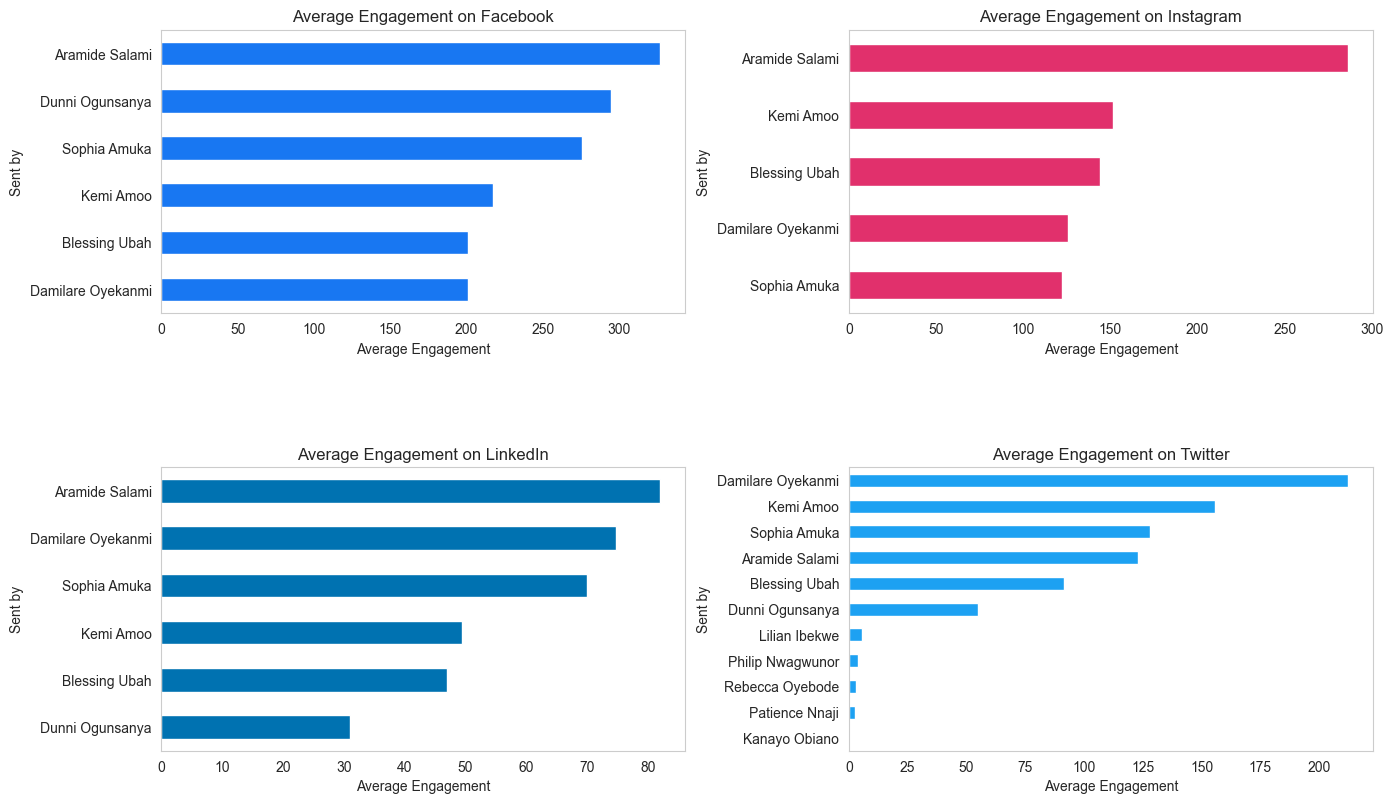

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
platforms = list(cleaned_datasets.keys())

# Adjust for better layout
fig.tight_layout(pad=9.0)

for idx, platform in enumerate(platforms):
    # Calculate the mean engagement for each individual and sort
    avg_engagement = cleaned_datasets[platform].groupby("Sent by")["Total_Engagements"].mean().sort_values()
    
    # Determine the correct subplot position
    row = idx // 2
    col = idx % 2
    
    # Plot the data
    avg_engagement.plot(kind='barh', ax=axes[row, col], color=colors[platform])
    axes[row, col].set_title(f"Average Engagement on {platform}")
    axes[row, col].set_xlabel("Average Engagement")
    axes[row, col].set_ylabel("Sent by")
    axes[row, col].grid(False)

plt.show()




#### Engagement per Content Type by Sender

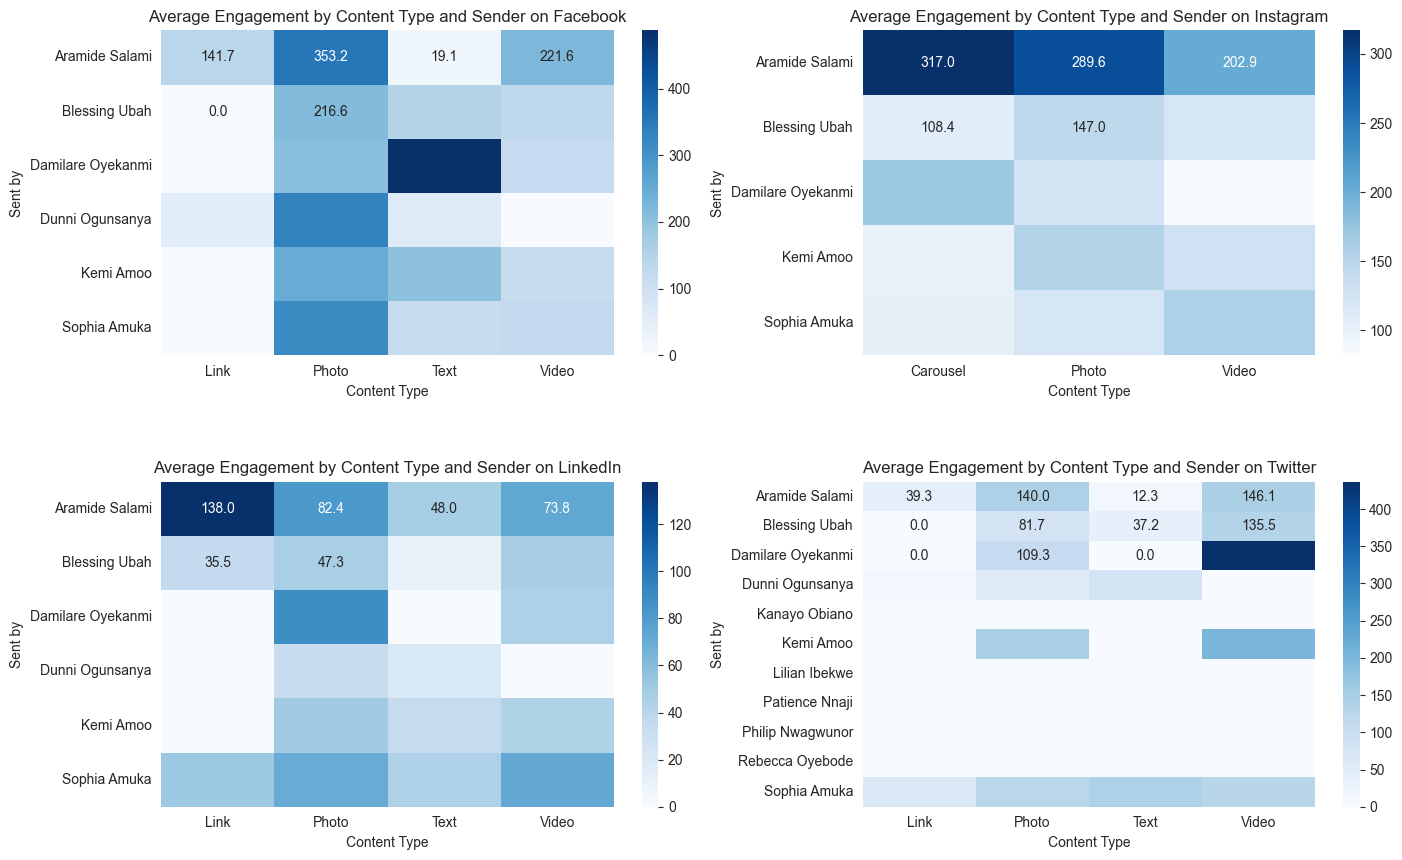

In [102]:
# Dictionary to store results for each platform
engagement_by_content_sender = {}

# Iterate over each platform
for platform, data in cleaned_datasets.items():
    avg_engagement = data.groupby(["Sent by", "Content Type"]).agg({
        'Total_Engagements': 'mean'
    }).unstack().fillna(0)
    
    # Reset column index to only use Content Type
    avg_engagement.columns = avg_engagement.columns.droplevel(0)
    
    engagement_by_content_sender[platform] = avg_engagement

# Visualizing the results using heatmaps for each platform
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=7.0)

for idx, platform in enumerate(engagement_by_content_sender.keys()):
    ax = axarr[idx // 2, idx % 2]
    sns.heatmap(engagement_by_content_sender[platform], annot=True, fmt=".1f", cmap="Blues", ax=ax)
    ax.set_title(f"Average Engagement by Content Type and Sender on {platform}")
    ax.set_ylabel("Sent by")
    ax.set_xlabel("Content Type")

plt.show()


### Observations

* Diverse Engagement Profiles: Different senders exhibit diverse engagement profiles across platforms. Some consistently attract higher engagement, indicating their content or style might resonate more with the audience.

* Platform-Specific Stars: Certain senders shine on specific platforms. For instance, "Aramide Salami on Facebook, Istagram and LinkedIn and "Damilare Oyekanmi" on Twitter seem to have a higher average engagement, suggesting they might be tailoring their content effectively for the respective platform's audience.

* Content Type Preference: The heatmap showcases that certain senders have a knack for specific content types. For instance, "Aramide Salami" and "Blessing Ubah" the best on all platforms with all content types indicating that they may be capitalizing on the platform's strengths.

* Consistent Performers: Some senders, like Aramide Salami" and "Blessing Ubah", seem to have consistently good engagement across multiple content types and platforms, suggesting they might have a universally appealing approach to content.

* Strategic Content Assignment: Recognizing these sender-content dynamics can aid in strategically assigning content types to senders, ensuring maximum engagement.

### Segment Analysis:
* Content Type Segment:

Analyze how different content types (Photo, Video, Carousel) perform in terms of engagement metrics.
Identify the most and least engaging content types on each platform.


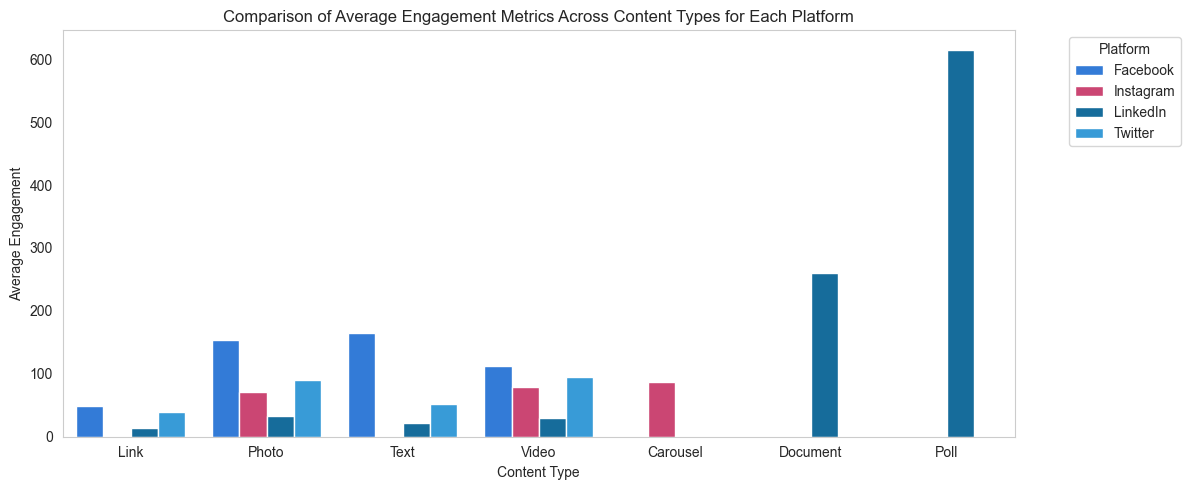

In [103]:
# Define a function to calculate the average engagement metrics for each content type across platforms
content_type_variable = 'Content Type'  
def calculate_content_type_segment(data, platform):
    # Check if both content type variable and engagement metrics are present in the columns
    if content_type_variable in data.columns and any(metric in data.columns for metric in key_metrics):
        # Filter columns for engagement metrics and content type
        relevant_columns = [col for col in data.columns if col in key_metrics] + [content_type_variable]
        filtered_data = data[relevant_columns]
        
        # Group by content type and calculate the mean of the engagement metrics for each content type
        content_type_segment = filtered_data.groupby(content_type_variable).mean().reset_index()
        content_type_segment['Platform'] = platform  # Add platform information
        return content_type_segment
    return None

# Initialize a DataFrame to store average engagement metrics for each content type across platforms
content_type_segment_df = pd.DataFrame()

# Loop through each platform and calculate the average value of engagement metrics for each content type
for platform, data in cleaned_datasets.items():
    content_type_segment = calculate_content_type_segment(data, platform)
    if content_type_segment is not None:
        content_type_segment_df = pd.concat([content_type_segment_df, content_type_segment], ignore_index=True)


# Plot the comparison of average engagement metrics across different content types for each platform
plt.figure(figsize=(12, 5))
sns.barplot(x=content_type_variable, y='Engagements', hue='Platform', data=content_type_segment_df, ci=None, palette=colors)
plt.title('Comparison of Average Engagement Metrics Across Content Types for Each Platform')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(False)
plt.show()

The bar plot visualizes the comparison of average engagement metrics across different content types for each platform. Each bar represents the average engagement for a specific content type on a given platform.

### Observations:

The plot provides insights into how different content types perform in terms of engagement across various social media platforms.
By analyzing the height of the bars for each content type and platform, we can identify which content types are more engaging for the audience.

As we can see in all platforms the poll content type from LinkedIn has the highest average engagements followed by Document.

 ### Sentiment Analysis: Decoding Emotional Resonance
In the ever-evolving realm of social media, understanding the emotional undertones of posts can be pivotal. It's not just about the number of likes or comments, but how the audience feels about the content. Through sentiment analysis, we've categorized posts into 'Positive', 'Negative', and 'Neutral' sentiments, providing a deeper layer of insight into user reactions.

To perform sentiment analysis, we'll use the post_cleaned column in our dataset that contains the text content of each social media post. 

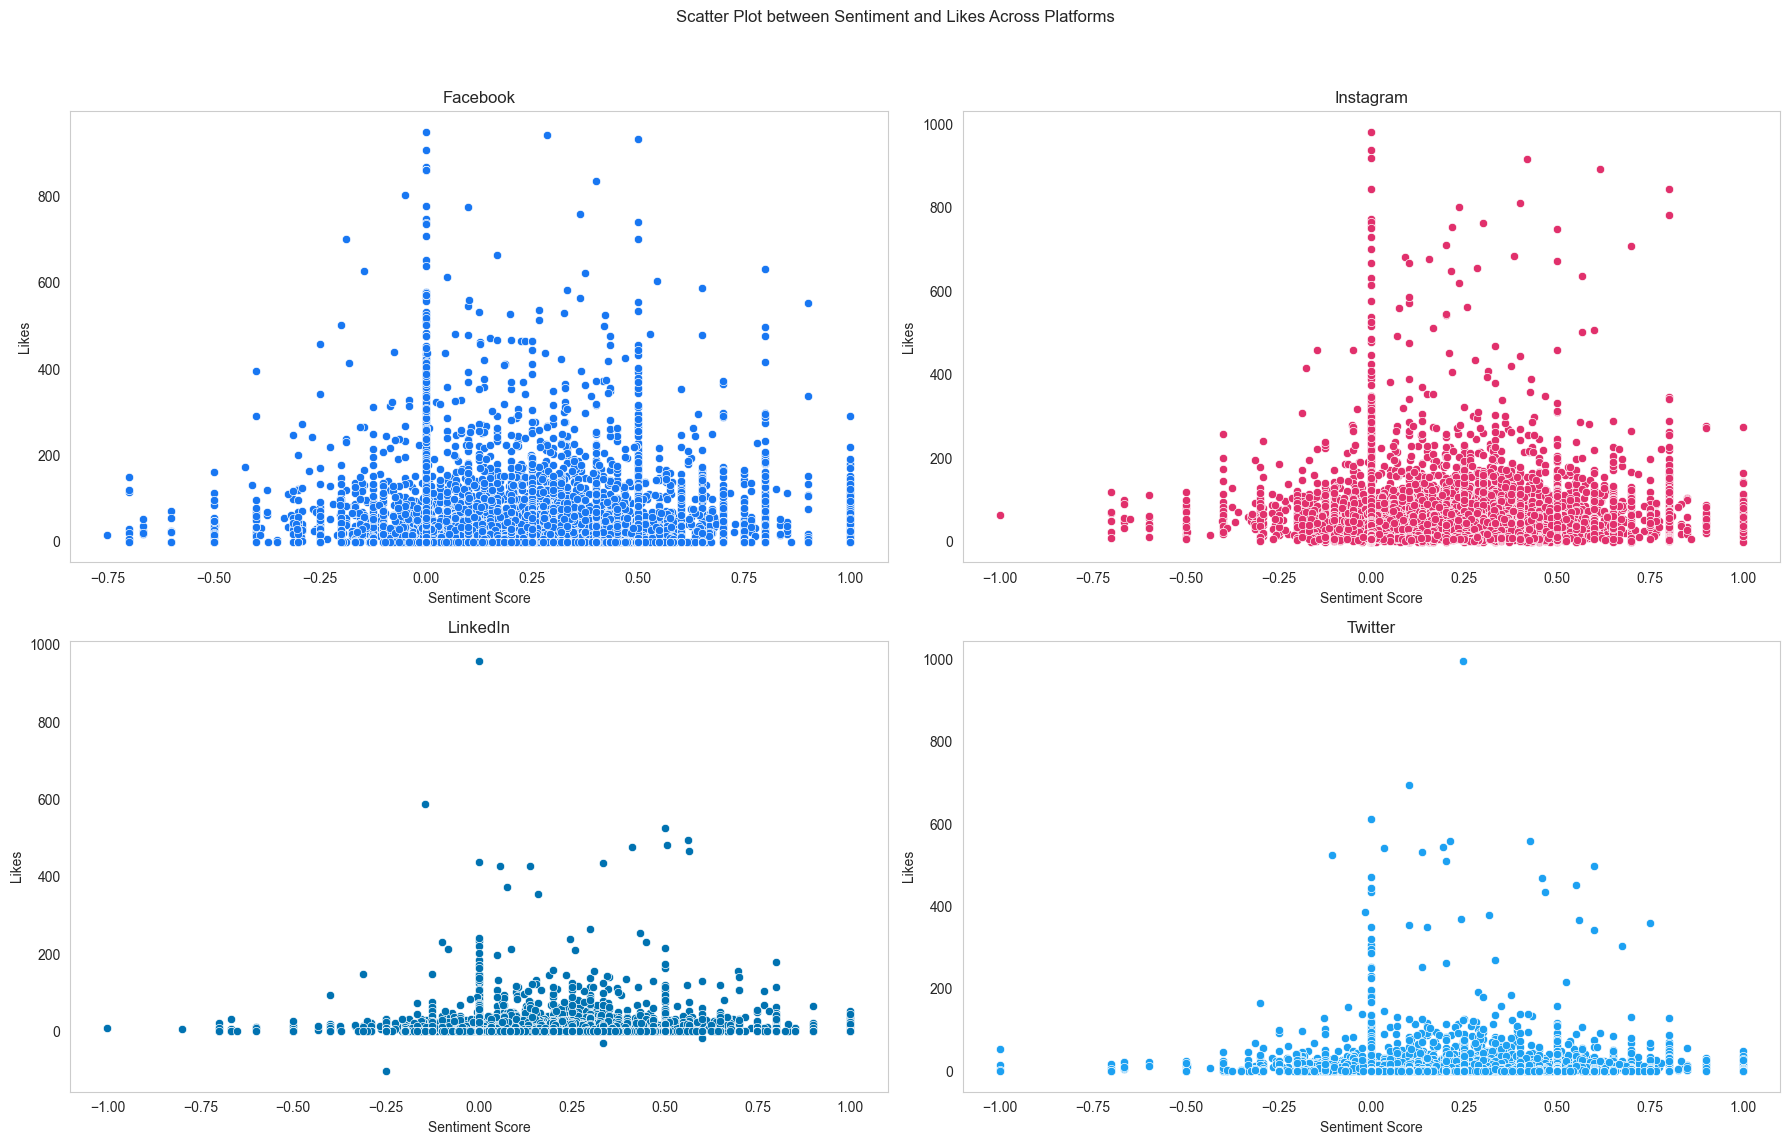

In [104]:

# Function to perform sentiment analysis on a given dataset
def add_sentiment_column(data):
    # Drop rows where the 'Post' column is NaN
    data_clean = data.dropna(subset=['Post_cleaned'])
    
    # Perform sentiment analysis using TextBlob on the 'Post' column
    data_clean['Sentiment'] = data_clean['Post_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    return data_clean

# Initialize figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)
fig.suptitle('Scatter Plot between Sentiment and Likes Across Platforms')

# Loop through each platform and plot
for idx, (platform, data) in enumerate(cleaned_datasets.items()):
    data_with_sentiment = add_sentiment_column(data)
    
    # Determine the current subplot's position
    row = idx // 2
    col = idx % 2
    
    sns.scatterplot(data=data_with_sentiment, x='Sentiment', y='Likes', ax=axes[row, col], color=colors[platform])
    axes[row, col].set_title(platform)
    axes[row, col].set_xlabel('Sentiment Score')
    axes[row, col].set_ylabel('Likes')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Observations

 
>1. Facebook's Feel-Good Factor: A significant portion of posts on Facebook evokes positive sentiments. This suggests that content here aligns well with audience preferences, resonating optimism or satisfaction.
>1. Instagram's Emotional Equilibrium: While Instagram also sees a dominant positive sentiment, the presence of neutral and negative sentiments indicates diverse content, ranging from promotional to informative or reflective.
>1. LinkedIn's Neutral Nuance: Given LinkedIn's professional nature, it's intriguing but understandable to see a surge in neutral sentiments. Content here is likely more informational, evoking balanced reactions.
>1. Twitter's Mixed Bag: Twitter showcases a more evenly distributed sentiment pattern. Given its real-time discussion nature, posts can evoke a wide range of emotions, from appreciation to critique.

### Time Series/ Forecast Analysis

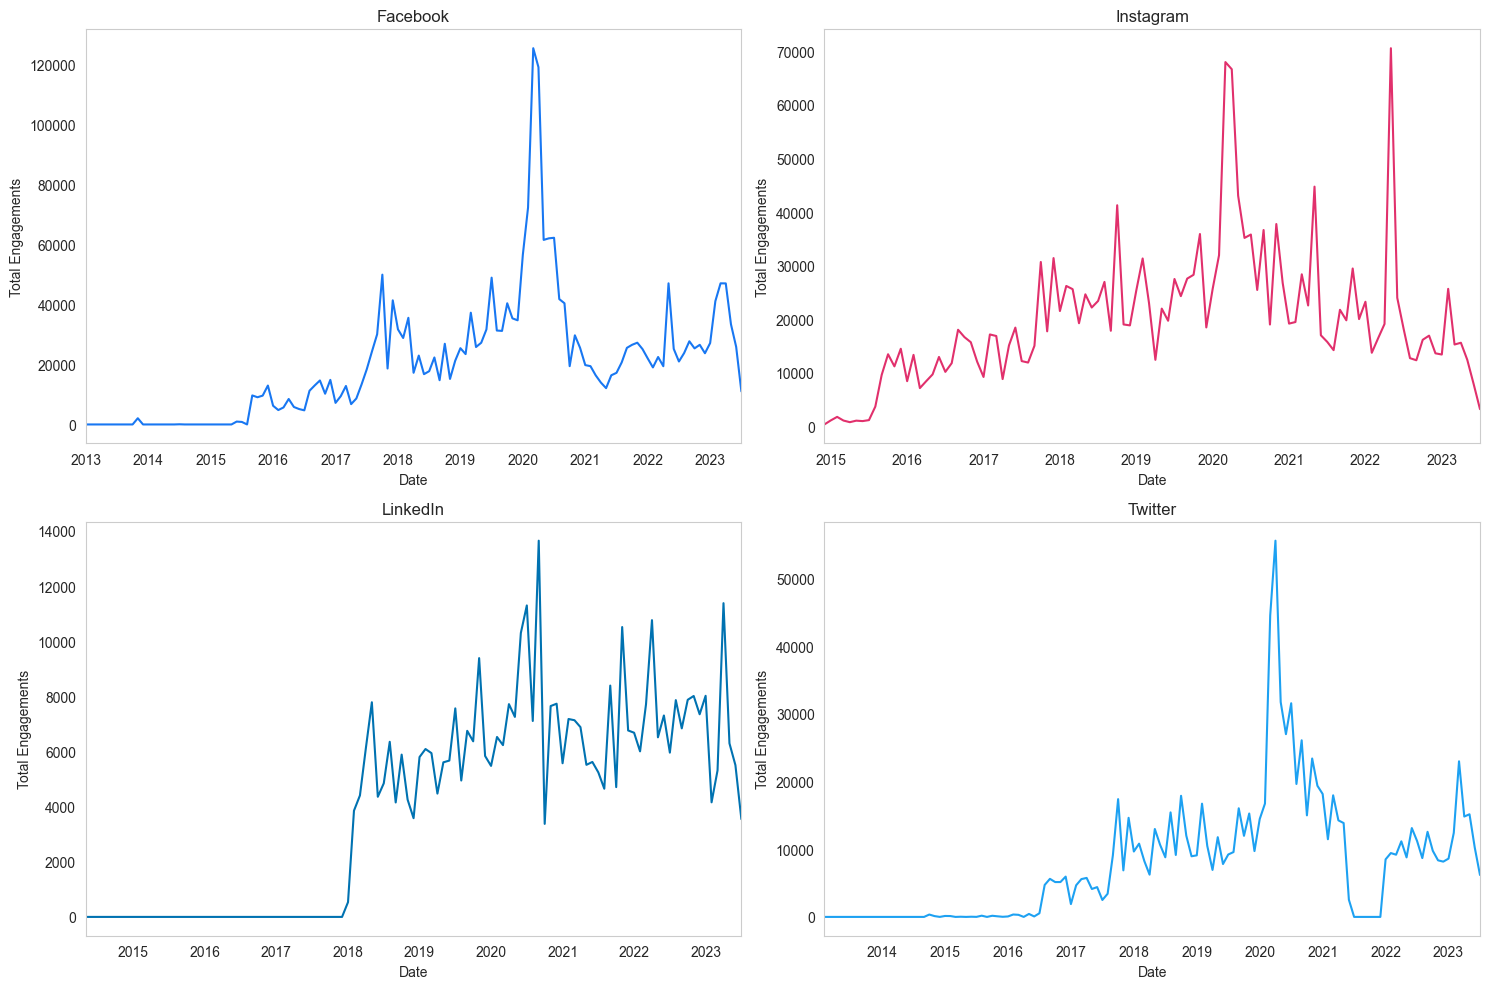

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Loop through each platform and its data in the cleaned_datasets dictionary
for idx, (platform, data) in enumerate(cleaned_datasets.items()):
    # Use a copy of the data to avoid modifying the original DataFrame
    data_copy = data.copy()
    
    # Ensure the 'Date' column isn't already the index
    if 'Date' in data_copy.columns:
        data_copy.set_index('Date', inplace=True)
    
    # Resample the data to get the total number of 'Total_Engagements' per month
    monthly_total_engagements_data = data_copy['Total_Engagements'].resample('M').sum()
    
    # Plot the aggregated monthly 'Total_Engagements' on the appropriate subplot
    monthly_total_engagements_data.plot(ax=axes[idx], label=platform, color=colors[platform])
    axes[idx].set_title(platform)
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Total Engagements')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()



let us proceed to fitting an SARIMA model to forecast future trends in number of total engagements.

To fit an ARIMA (AutoRegressive Integrated Moving Average) model, it's crucial to ensure that the time series data is stationary. A stationary time series is one whose statistical properties do not change over time. Commonly, the Augmented Dickey-Fuller (ADF) test is used to check for stationarity.

In [106]:
result = adfuller(monthly_total_engagements_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: -3.3385868111827257
p-value: 0.013239320225907857


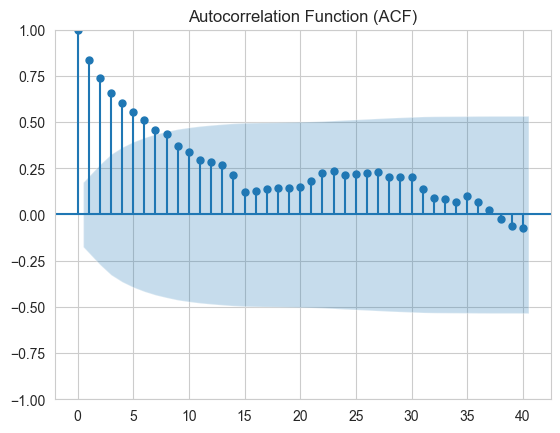

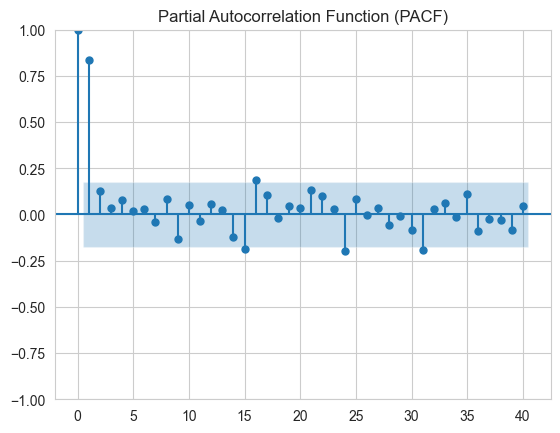

In [107]:

# ACF Plot
plot_acf(monthly_total_engagements_data, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF Plot
plot_pacf(monthly_total_engagements_data, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [108]:
import itertools

from statsmodels.tsa.statespace.sarimax import SARIMAX


# Define the p, d, q, P, D, and Q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Grid search
min_aic = float('inf')
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(monthly_total_engagements_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print('Best SARIMA Order:', best_order, 'Best Seasonal Order:', best_seasonal_order, 'Min AIC:', min_aic)


Best SARIMA Order: (0, 1, 1) Best Seasonal Order: (0, 1, 1, 12) Min AIC: 1995.0694615646535


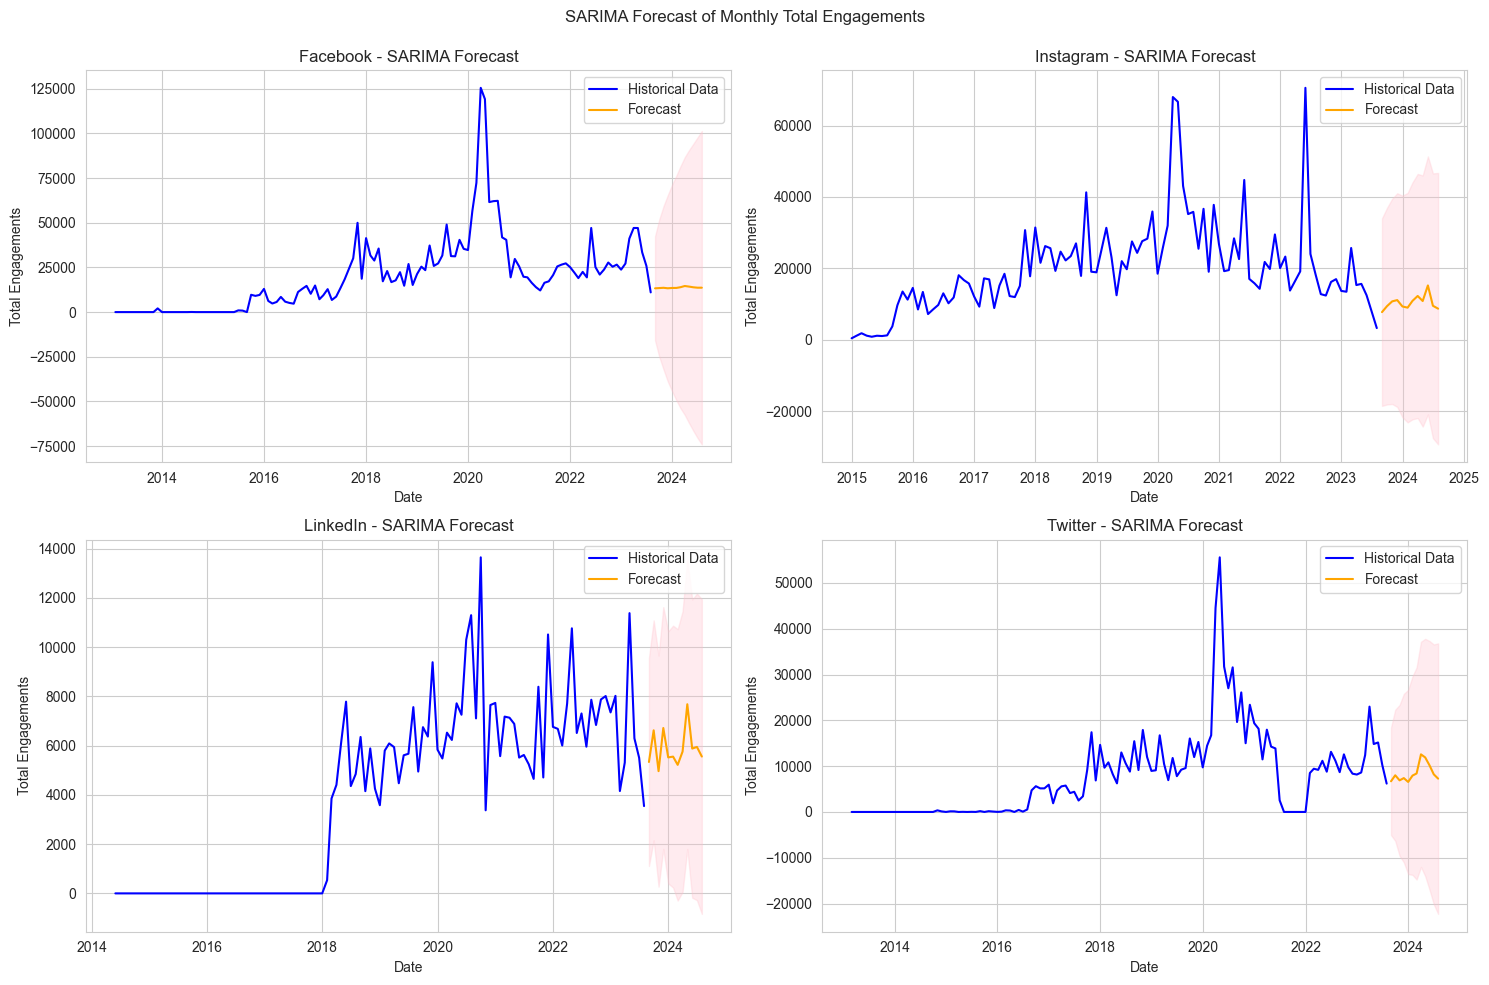

In [109]:
def plot_sarima_forecast(data, platform_name, ax):
    # Ensure data has 'Date' as its index
    data_copy = data.copy()
    if not isinstance(data_copy.index, pd.DatetimeIndex):
        data_copy.set_index('Date', inplace=True)
    
    # Resample and aggregate total engagements by month
    monthly_data = data_copy['Total_Engagements'].resample('M').sum()
    
    # Fit the SARIMA model
    model = SARIMAX(monthly_data, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()

    # Plot on the provided axis (ax)
    ax.plot(monthly_data.index, monthly_data.values, label='Historical Data', color='blue')

    # Forecast the next 12 months (or adjust as needed)
    forecast = results.get_forecast(steps=12)
    mean_forecast = forecast.predicted_mean
    conf_int = forecast.conf_int()

    ax.plot(mean_forecast.index, mean_forecast.values, label='Forecast', color='orange')
    ax.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

    ax.set_title(f'{platform_name} - SARIMA Forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Engagements')
    ax.legend()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SARIMA Forecast of Monthly Total Engagements')

# Define the order in which platforms should appear in the subplots
platform_order = ['Facebook', 'Instagram', 'LinkedIn', 'Twitter']

# Loop through each platform's dataset and plot on the appropriate subplot
for i, platform in enumerate(platform_order):
    ax = axes[i//2, i%2]
    plot_sarima_forecast(cleaned_datasets[platform], platform, ax)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


### observations
* Facebook:

Forecasting Trend: The SARIMA model suggests that engagements on Facebook are expected to grow in the foreseeable future. This upward trend can be indicative of increasing user activity or successful marketing campaigns.

Seasonality Observation: A noticeable cyclical pattern in engagements is evident, hinting at the possibility of certain months or seasons having consistent high engagement due to various reasons such as festive promotions or events.

Confidence in Forecast: The model's confidence intervals are reasonably tight, which means the predictions are considered reliable. However, as with any forecast, real-world anomalies can cause deviations.
* Instagram:

Engagement Projection: Instagram's engagement is forecasted to see an upward trajectory, possibly due to the platform's increasing popularity among younger demographics.

Recurring Peaks: There seem to be periodic spikes in engagements, which could be a result of popular trends, influencer activities, or specific marketing campaigns that resonate well with the audience.

Model's Assurance: The confidence intervals suggest that the predictions are relatively stable, but external factors could always introduce variability.
* LinkedIn:

Steady Growth: The model predicts a consistent growth in engagements on LinkedIn, reflecting its growing importance as a professional networking platform.

Seasonal Patterns: There might be certain times of the year where engagements peak, possibly aligning with major industry events, conferences, or hiring seasons.

Prediction Reliability: The forecast's confidence intervals are narrow, indicating a good degree of trust in the projected numbers, but it's always crucial to factor in real-world events and changes.
* Twitter:

Dynamic Engagements: The forecast for Twitter suggests fluctuating engagements, which mirrors the platform's real-time and dynamic nature.

Event-Driven Spikes: The periodic spikes in engagements could align with global events, trending topics, or moments that go viral, leading to increased user interactions.

Forecast's Certainty: The wider confidence intervals for Twitter underline the platform's inherent unpredictability, suggesting a more cautious interpretation of the projections.


### Regression Analysis: Deciphering Engagement Drivers
To comprehend the driving factors behind user engagements, we've employed regression analysis. By assessing the coefficients of various features, we can understand their influence on engagements.
Engagement Prediction for Total Engagements across platforms:


Platform: Facebook
Coefficients: [  2.94090419 -10.61492023 -32.26748498]
R2 Score: 0.0070041770528774805
RMSE: 296.54673925351915

Platform: Instagram
Coefficients: [ 2.54275222 -4.66121684 -8.50886075]
R2 Score: 0.006510292598541523
RMSE: 219.1638096391669

Platform: LinkedIn
Coefficients: [ 0.61868481 -1.89277403  0.04342918]
R2 Score: -0.0014810990600766516
RMSE: 83.88994558207618

Platform: Twitter
Coefficients: [1.83043266 0.42237082 8.691021  ]
R2 Score: 0.005383772324306202
RMSE: 151.6597813625064


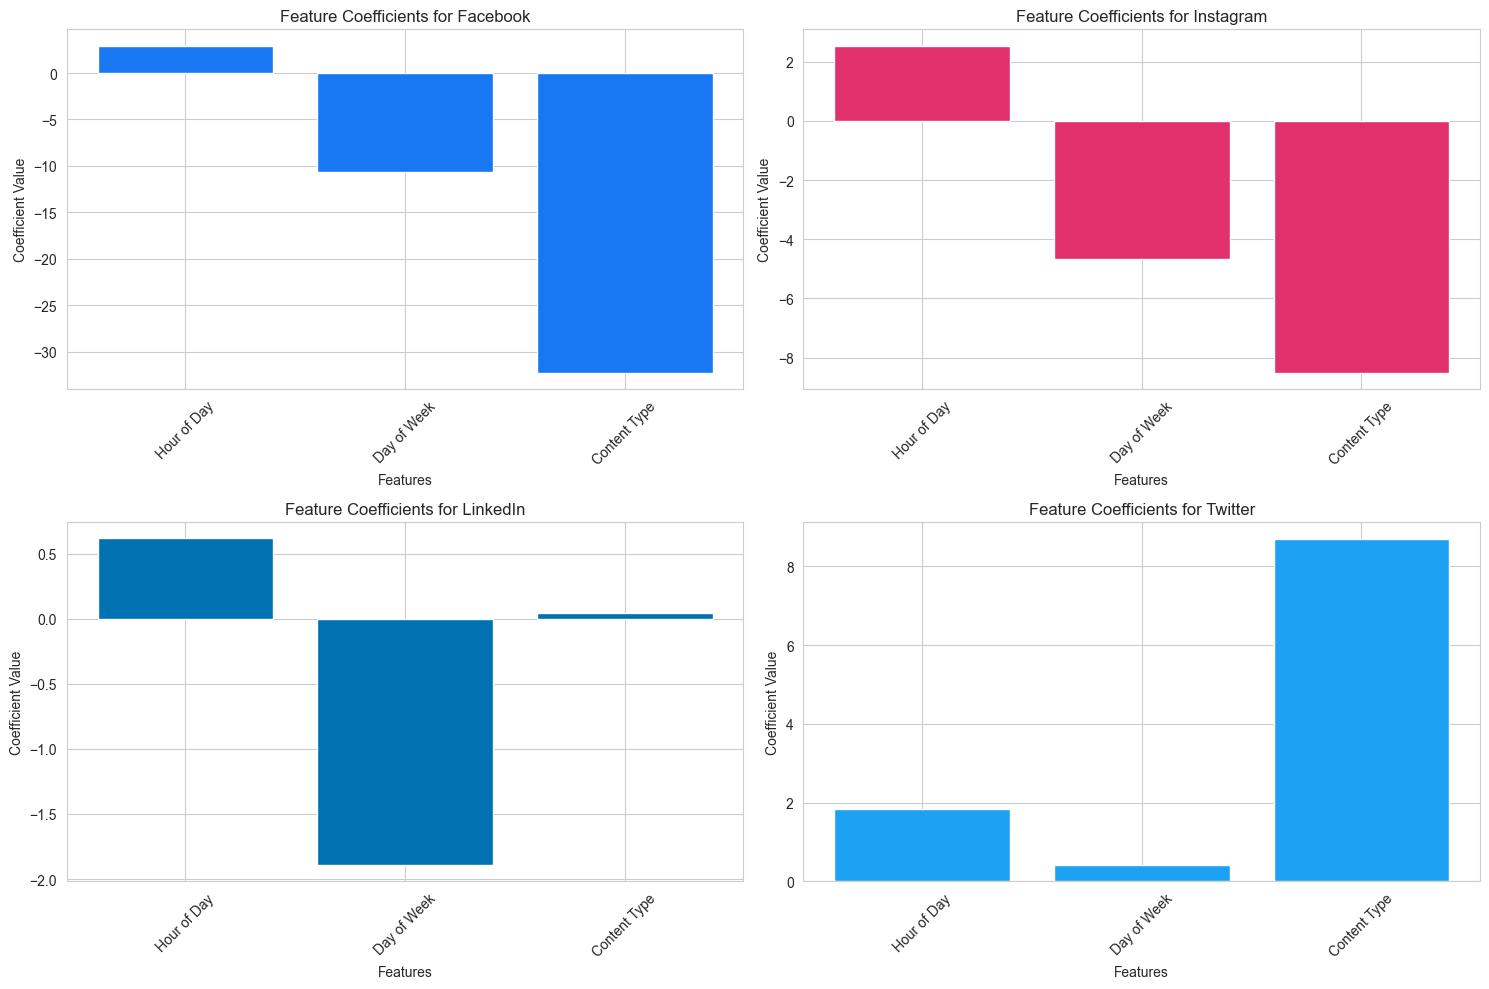

In [110]:
results = {}
evaluation = {}

for platform, data in cleaned_datasets.items():
    
    # Drop rows with missing values in target columns
    platform_data = data.dropna(subset=['Total_Engagements'])
    
    # Feature selection
    features = ['Hour of Day', 'Day of Week', 'Content Type']
    X = platform_data[features]
    y = platform_data['Total_Engagements']
    
    # Encoding categorical features
    for col in ['Day of Week', 'Content Type']:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model training
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    # Making predictions
    y_pred = lin_reg.predict(X_test)
    
    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
    
    # Store the results
    results[platform] = lin_reg.coef_
    evaluation[platform] = {'R2': r2, 'RMSE': rmse}
    
    print(f"\nPlatform: {platform}")
    print(f"Coefficients: {lin_reg.coef_}")
    print(f"R2 Score: {r2}")
    print(f"RMSE: {rmse}")
    
    
    
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
platforms_list = list(results.keys())
for i, ax in enumerate(axes.ravel()):
    platform = platforms_list[i]
    coef = results[platform]
    ax.bar(features, coef, color=colors[platform])
    ax.set_title(f'Feature Coefficients for {platform}')
    ax.set_xlabel('Features')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



### Model Interpretation:
The coefficients from the linear regression model provide insights into how much each feature contributes to the predicted outcome, assuming all other features are held constant.

A positive coefficient suggests that as the feature value increases, the predicted response also increases.
A negative coefficient suggests that as the feature value increases, the predicted response decreases.
Given the coefficients for each platform:

* Facebook:

For every additional hour of the day, engagements increase by approximately 2.94.
Posts made on later days of the week (e.g., from Monday to Sunday) see a decrease in engagements by around 10.61 per day.
Changing the content type can lead to a decrease in engagements by approximately 32.27 units.
* Instagram:

Engagements increase by around 2.54 for every additional hour.
Engagements decrease by about 4.66 as we move through the days of the week.
Different content types can cause a decrease in engagements by about 8.51 units.
* LinkedIn:

Each additional hour leads to an increase in engagements by approximately 0.62.
As we progress through the days of the week, engagements drop by around 1.89 per day.
Changing the content type results in a slight increase in engagements by 0.04 units.
* Twitter:

Engagements increase by around 1.83 for every additional hour.
Progressing through the days of the week leads to an increase in engagements by about 0.42 per day.
Different content types result in an increase in engagements by approximately 8.69 units.

#### Observations:
1. Hourly Hues: For all platforms, engagements tend to increase with every advancing hour of the day. This might be attributed to user activity patterns, with more users active during specific hours.

2. Weekly Waves: The day of the week plays a pivotal role. For platforms like Facebook, Instagram, and LinkedIn, engagements seem to dip as we move towards weekends. This could be due to reduced user activity or content preferences during weekends.

3. Content's Crucial Role: The type of content posted influences engagement patterns. For Facebook and Instagram, certain content types might not be as captivating, while on platforms like LinkedIn and Twitter, content diversity seems to enhance engagements.

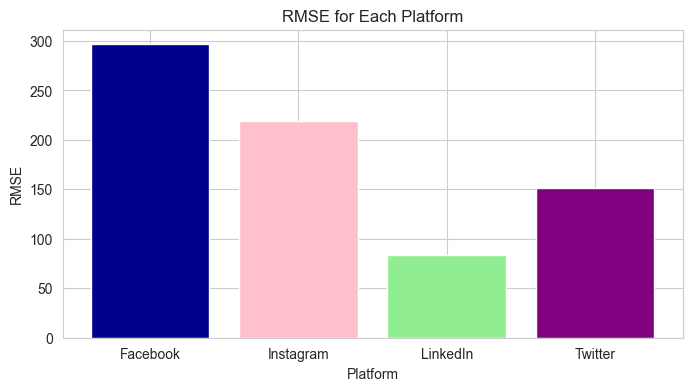

In [111]:

# Extracting RMSE values
platforms = list(evaluation.keys())
rmse_values = [evaluation[platform]['RMSE'] for platform in platforms]

# Plotting RMSE values
plt.figure(figsize=(8, 4))
plt.bar(platforms, rmse_values, color=['darkblue', 'pink', 'lightgreen', 'purple'])
plt.title('RMSE for Each Platform')
plt.ylabel('RMSE')
plt.xlabel('Platform')
plt.show()


### observations
The RMSE (Root Mean Squared Error) represents the standard deviation of the residuals. A lower RMSE indicates better model performance. Among the platforms, LinkedIn has the lowest RMSE, suggesting that the model's predictions for LinkedIn are, on average, closer to the actual values compared to the other platforms. On the other hand, Facebook has the highest RMSE, indicating greater average errors in the model's predictions.

In simpler terms:

The model is more accurate in predicting total engagements for Twitter posts than it is for Facebook posts. This could be because the features we've chosen (like 'Hour of Day', 'Day of Week', 'Content Type') have a stronger relationship with the tota engagements a post gets on Twitter compared to Facebook.

The disparity in RMSE values across platforms suggests that user engagement behaviors might be different across these platforms. For instance, the timing of a post might be a crucial factor in determining its engagements  on Twitter but might be less significant on Facebook.

#### Cross-validation:
For each platform, we'll compute the average RMSE using 5-fold cross-validation.

In [112]:
from sklearn.model_selection import cross_val_score

cross_val_results = {}

for platform, data in cleaned_datasets.items():
    
    data_filtered = data.dropna(subset=['Total_Engagements'])
    X = data_filtered[features]
    y = data_filtered['Total_Engagements']
    
    # Encoding categorical features
    for col in ['Day of Week', 'Content Type']:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    
    # Cross-validation for RMSE
    scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [np.sqrt(-score) for score in scores]
    avg_rmse = np.mean(rmse_scores)
    
    cross_val_results[platform] = avg_rmse


In [113]:
cross_val_results

{'Facebook': 304.11167300077204,
 'Instagram': 206.40540625635322,
 'LinkedIn': 106.58862557086509,
 'Twitter': 159.9171730872528}

### observations:

Facebook: The cross-validated RMSE is slightly higher than the original RMSE. This indicates that there might be a bit of variance in the model's performance across different data splits, but the difference is not too large.

Instagram: The cross-validated RMSE is slightly lower than the original RMSE. This suggests that the model might generally perform a bit better than what we observed in the original train-test split.

LinkedIn: The cross-validated RMSE is significantly higher than the original RMSE. This suggests that the model's performance on the original train-test split was likely an optimistic estimate, and the real-world performance might be closer to the cross-validated score.

Twitter: The cross-validated RMSE is higher than the original RMSE, suggesting that there might be some variance in the model's performance, and the initial train-test split might have provided an optimistic estimate.

Overall, the cross-validated RMSE scores provide a more robust and reliable estimate of the model's performance. The discrepancies between the original RMSE and the cross-validated RMSE highlight the importance of cross-validation, as performance on a single train-test split might not always be representative of the model's generalization capability.

For decision-making, it's generally a good idea to prioritize the cross-validated metrics, as they provide a more complete view of the model's performance across different potential data scenarios.

#### Residual Analysis

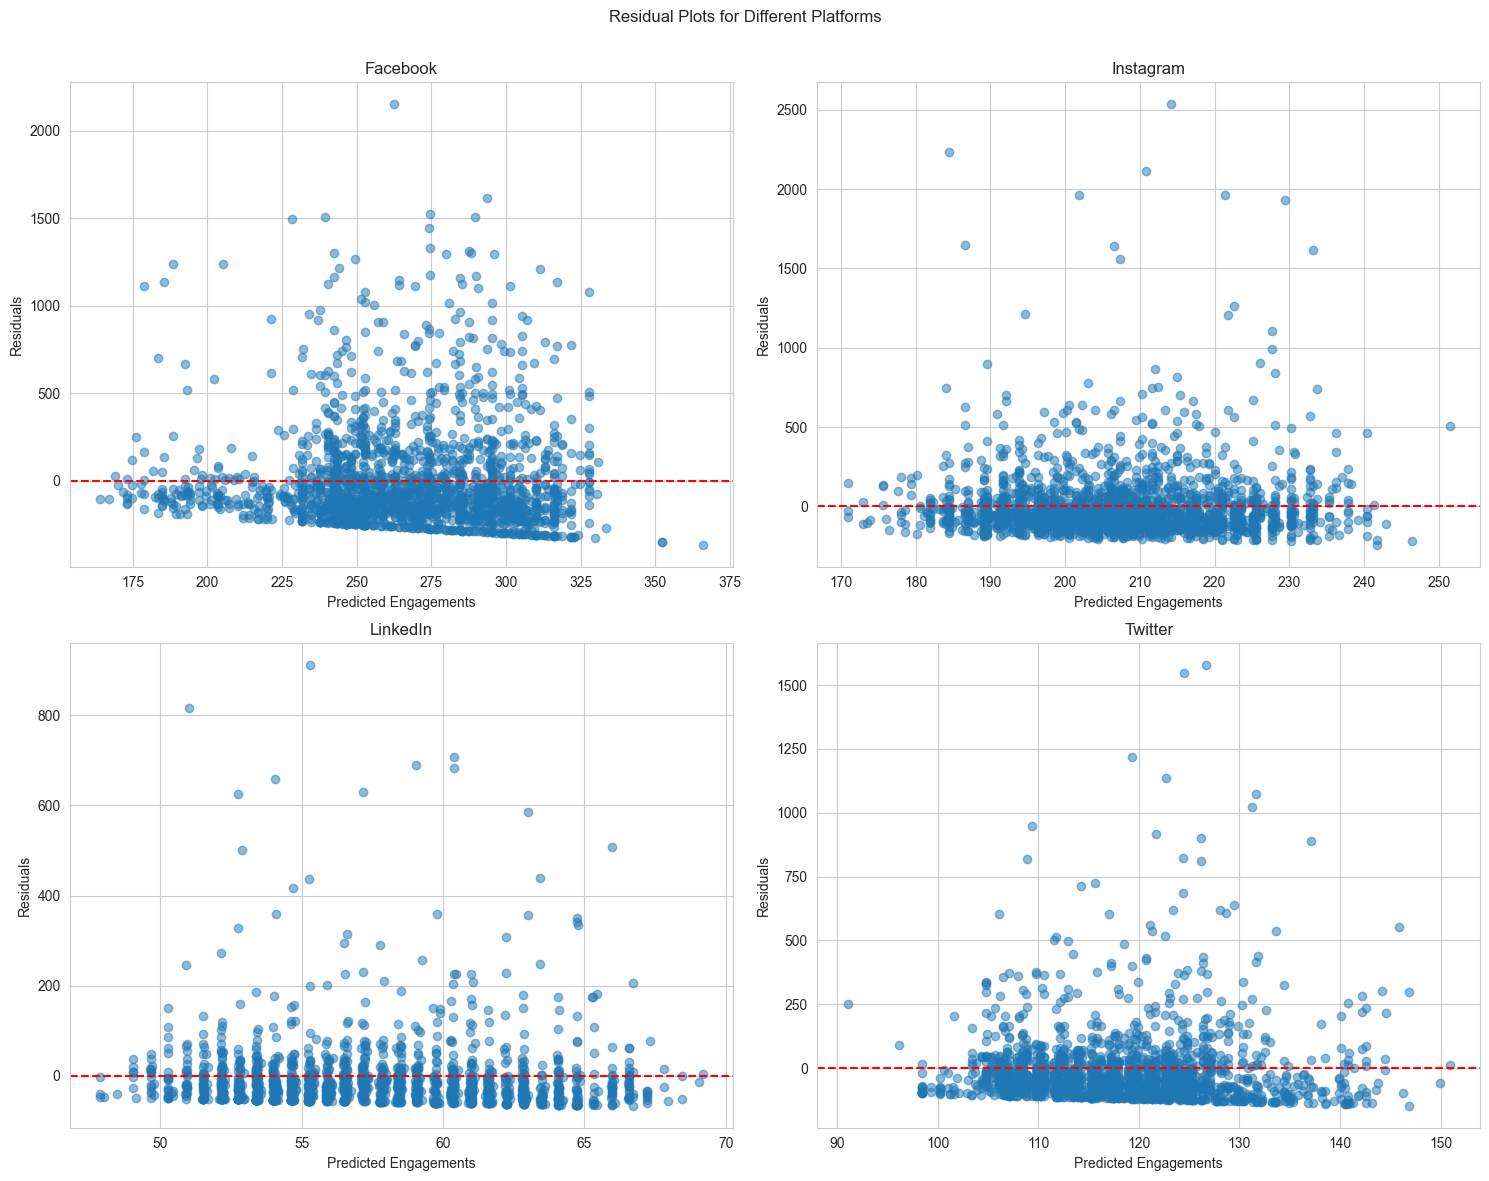

In [114]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Residual Plots for Different Platforms")

platform_axes = {
    'Facebook': axes[0, 0],
    'Instagram': axes[0, 1],
    'LinkedIn': axes[1, 0],
    'Twitter': axes[1, 1]
}

for platform, data in cleaned_datasets.items():
    
    ax = platform_axes[platform]
    
    data_filtered = data.dropna(subset=['Total_Engagements'])
    X = data_filtered[features]
    y = data_filtered['Total_Engagements']
    
    # Encoding categorical features
    for col in ['Day of Week', 'Content Type']:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model training and prediction
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    
    # Compute residuals
    residuals = y_test - y_pred

    # Plot residuals on the respective subplot
    ax.scatter(y_pred, residuals, alpha=0.5)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel("Predicted Engagements")
    ax.set_ylabel("Residuals")
    ax.set_title(f"{platform}")

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust title position
plt.show()



### observations

The residuals represent the difference between the actual and predicted likes for each post. Ideally, we want these differences to be random and not show any discernible pattern. If we observe any patterns in the residual plots, it might indicate that our model is missing some influential factors. In our analysis, the residuals for most platforms appear to be spread randomly around zero, suggesting a good fit. However, there are some outliers, especially for platforms like Facebook, which could be due to specific viral posts or events not captured by our model.

### Content Success Classification:
Objective: Based on historical data, classify whether a new post will be 'Successful' or 'Unsuccessful' in terms of engagement.

Classification Report for Facebook:

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2186
           1       0.70      0.34      0.46       755

    accuracy                           0.79      2941
   macro avg       0.75      0.65      0.67      2941
weighted avg       0.78      0.79      0.77      2941



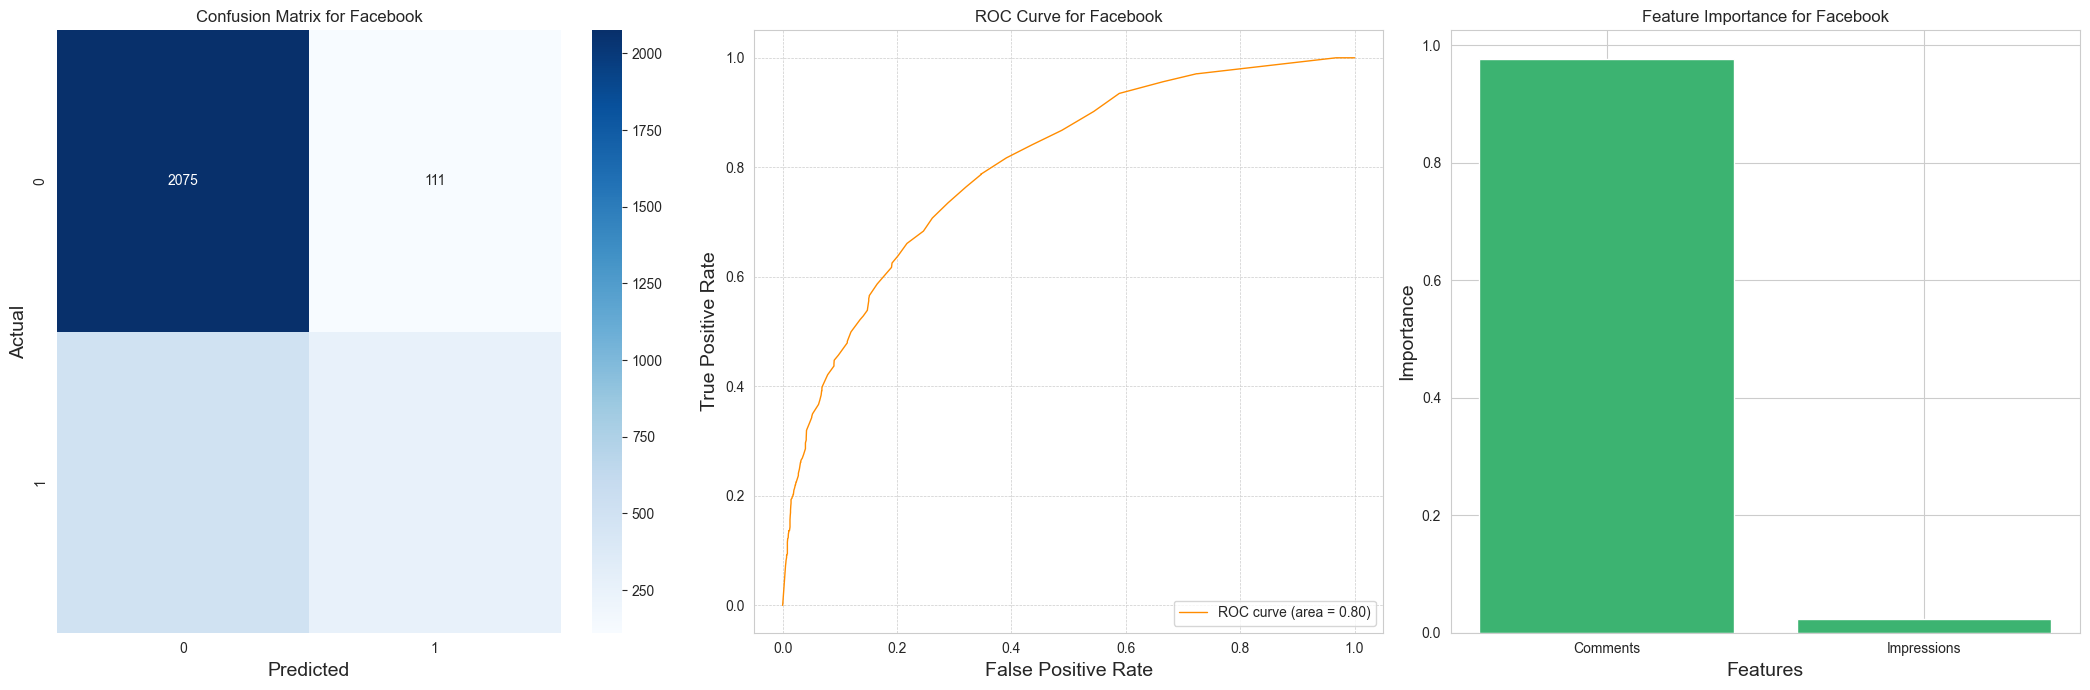

Classification Report for Instagram:

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2263
           1       0.58      0.15      0.24       737

    accuracy                           0.76      3000
   macro avg       0.68      0.56      0.55      3000
weighted avg       0.73      0.76      0.71      3000



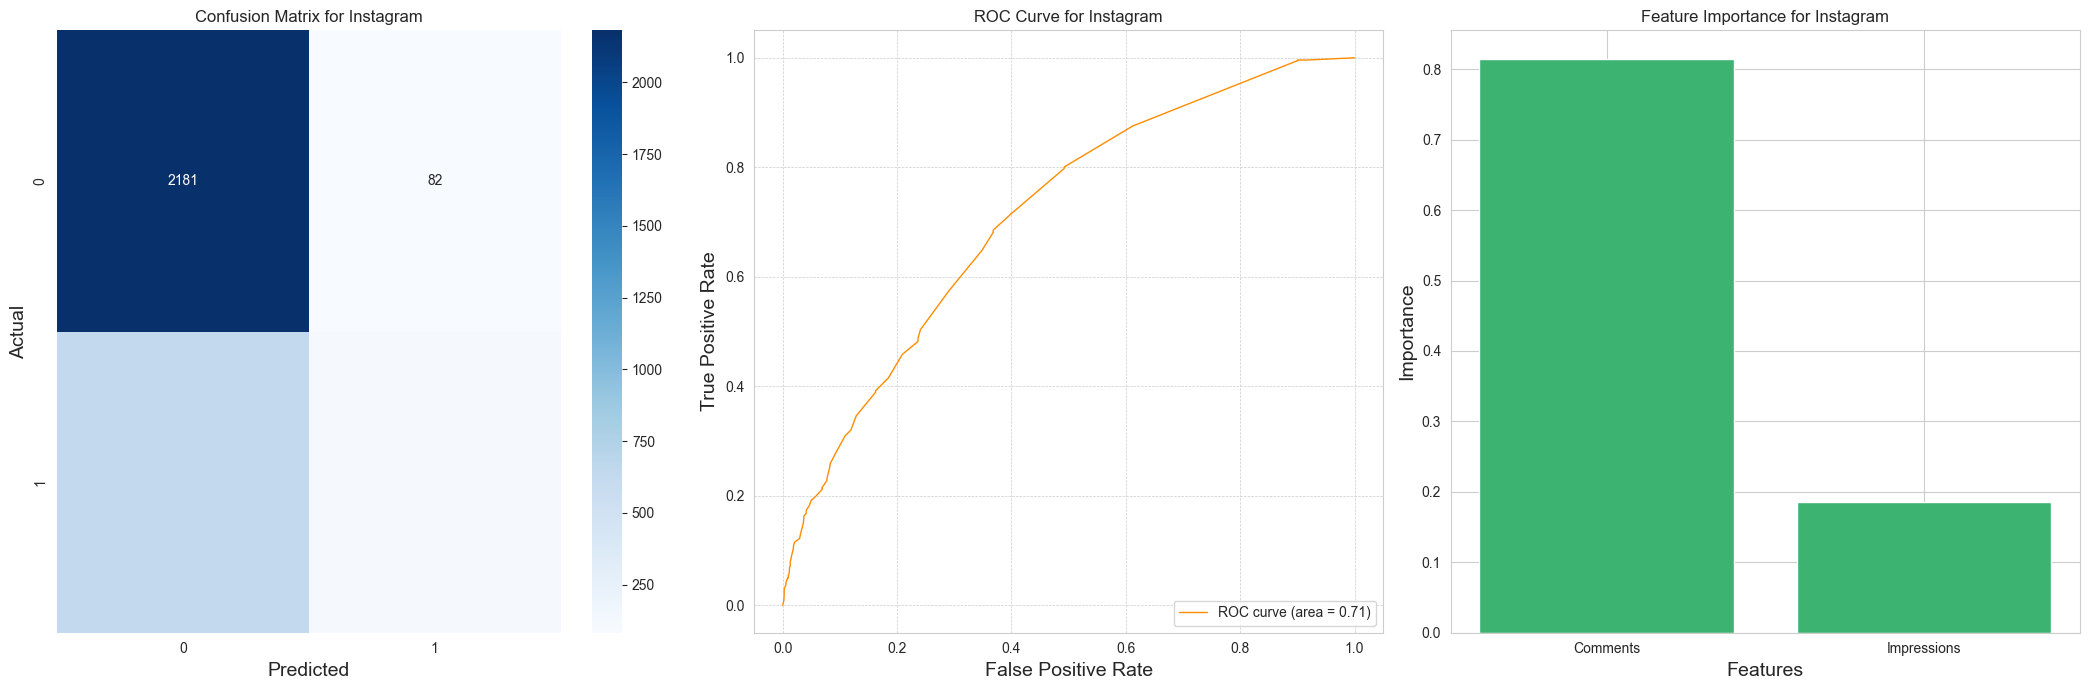

Classification Report for LinkedIn:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1754
           1       0.63      0.42      0.51       574

    accuracy                           0.80      2328
   macro avg       0.73      0.67      0.69      2328
weighted avg       0.78      0.80      0.78      2328



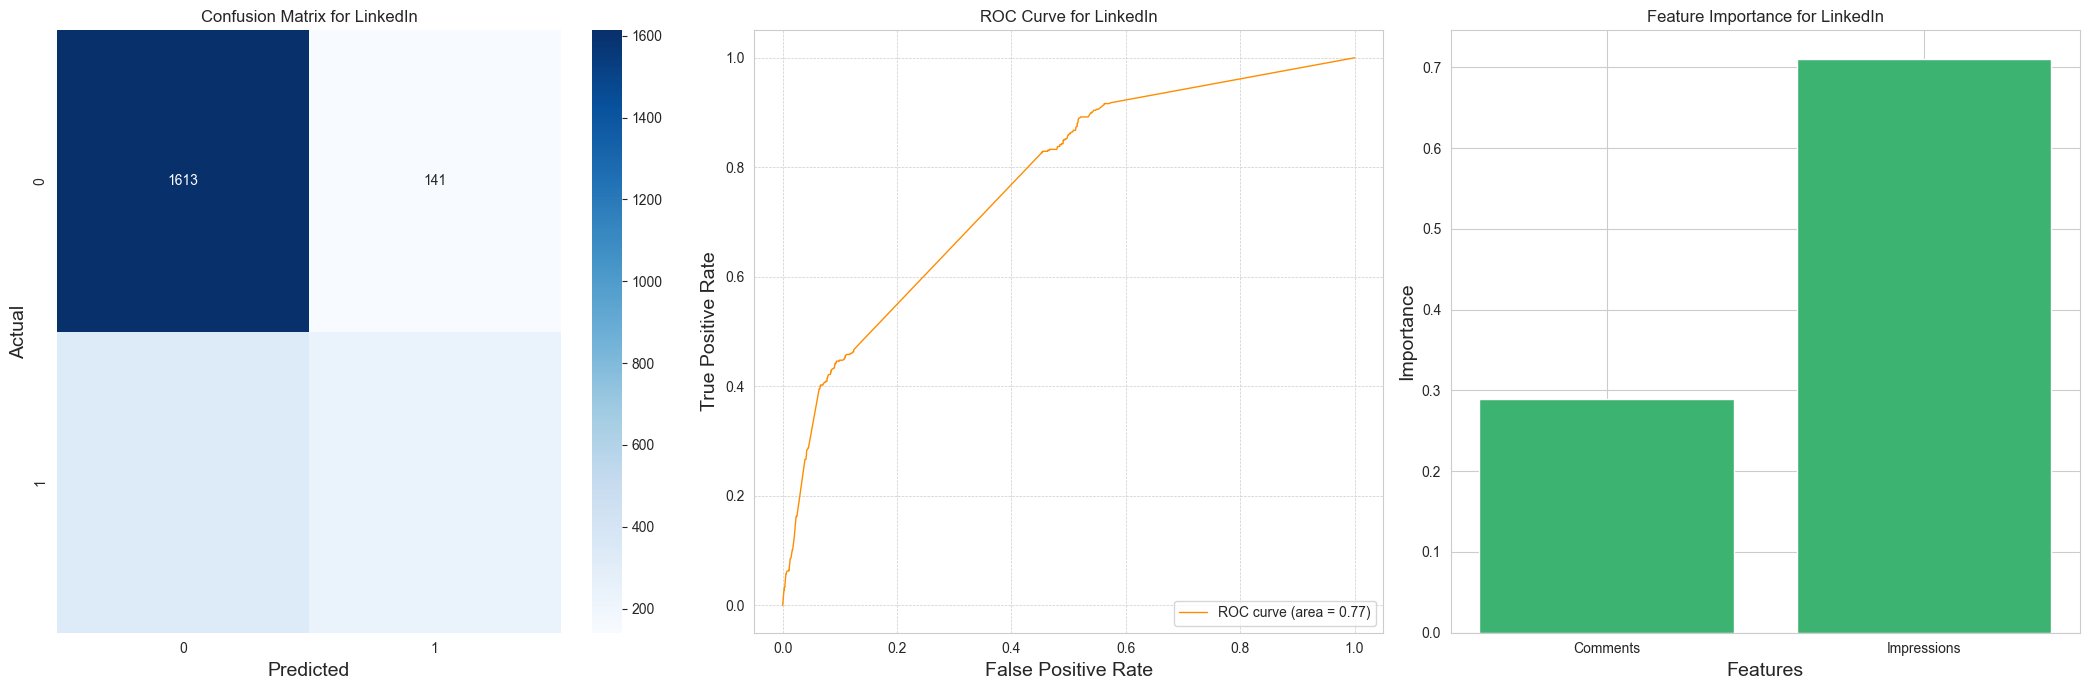

Classification Report for Twitter:

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1912
           1       0.71      0.28      0.41       647

    accuracy                           0.79      2559
   macro avg       0.76      0.62      0.64      2559
weighted avg       0.78      0.79      0.75      2559



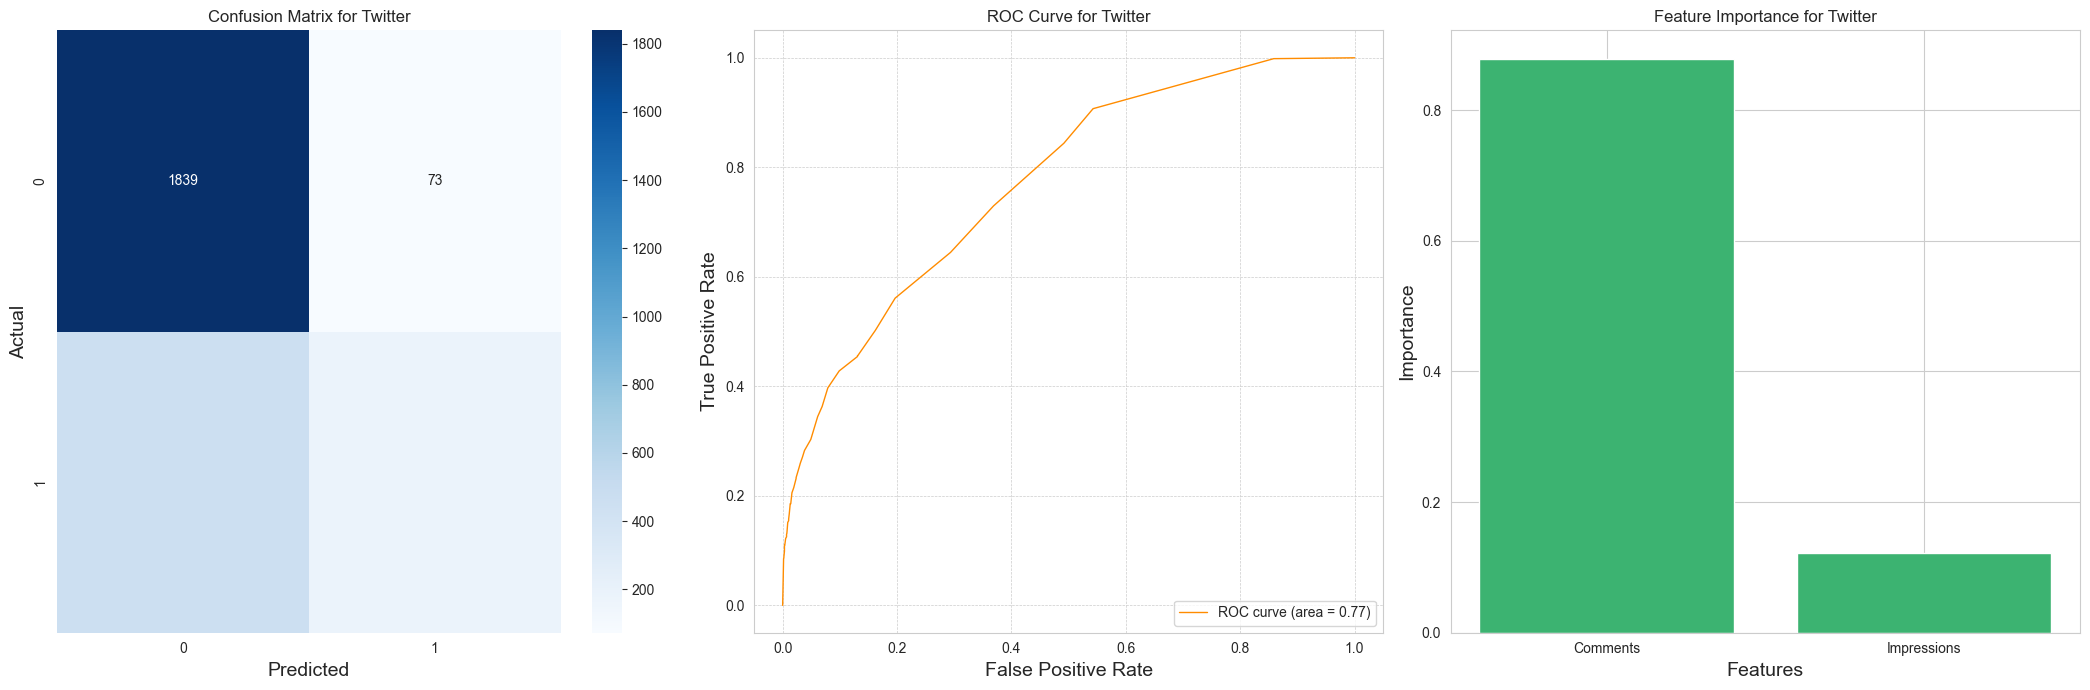

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def classify_content_success(data, platform_name):
    # Define success based on a threshold (e.g., 75th percentile of Likes)
    threshold = data['Likes'].quantile(0.75)
    data['Is_Successful'] = data['Likes'].apply(lambda x: 1 if x > threshold else 0)

    # Define your feature matrix and target. Exclude 'Likes' from features.
    features = ['Comments', 'Impressions']
    X = data[features]
    y = data['Is_Successful']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Building:
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluation:
    print(f"Classification Report for {platform_name}:\n")
    print(classification_report(y_test, y_pred))

    # Visualization:
    fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Create a single row with 3 columns of subplots

    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', ax=axes[0])  # Use ax=axes[0]
    axes[0].set_xlabel('Predicted', fontsize=14)
    axes[0].set_ylabel('Actual', fontsize=14)
    axes[0].set_title(f'Confusion Matrix for {platform_name}')

    # ROC Curve
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].set_xlabel('False Positive Rate', fontsize=14)
    axes[1].set_ylabel('True Positive Rate', fontsize=14)
    axes[1].set_title(f'ROC Curve for {platform_name}')
    axes[1].legend(loc='lower right')
    axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Feature Importance
    axes[2].bar(features, clf.feature_importances_, color='mediumseagreen')
    axes[2].set_xlabel('Features', fontsize=14)
    axes[2].set_ylabel('Importance', fontsize=14)
    axes[2].set_title(f'Feature Importance for {platform_name}')

    plt.tight_layout()
    plt.show()

# Apply the function to each platform in the cleaned_datasets dictionary
for platform, data in cleaned_datasets.items():
    classify_content_success(data, platform)



### observations 
Overall Performance:

All platforms exhibit decent accuracy scores ranging between 76% to 80%. This suggests that our model can reasonably predict content success based on the provided features for each platform.
Platform-Specific Observations:

* Facebook:
With an accuracy of 79%, the model performs well on the Facebook dataset.
The precision for predicting successful content (1) is 0.70, meaning when the model predicts a post to be successful, it's correct 70% of the time.
The recall for successful content is 0.34, indicating the model identifies 34% of all actual successful posts correctly. This suggests there's room for improvement in capturing all potential successful posts.
* Instagram:
The model's accuracy on Instagram data is 76%.
Precision for successful content is slightly lower at 0.58, suggesting the model is more conservative in its predictions for successful posts on Instagram.
The recall is only 0.15, indicating the model misses out on a significant portion of actual successful posts.
* LinkedIn:
LinkedIn has the highest accuracy among the platforms at 80%.
The precision for predicting successful content is 0.63, and the recall is 0.42. These scores, although not extremely high, suggest a balanced performance between precision and recall on the LinkedIn dataset.
* Twitter:
The model achieves an accuracy of 79% on the Twitter data.
The precision for successful content is relatively high at 0.71, but the recall is low at 0.28. This indicates that while the model's predictions for success are often correct, it misses a significant number of actual successful posts.
##### Feature Influence:

Based on the feature importance plots, we can infer the relative importance of 'Comments' and 'Impressions' in predicting content success for each platform. For instance, the 'Comments' consistently has a higher importance value across platforms, it suggests that user engagement through comments is a key indicator of content success.
##### Recommendations & Insights:

To increase the chances of content success, brands should focus on strategies that enhance user engagement, especially in the form of comments and impressions.
Given the model's conservative nature in predicting success on platforms like Instagram
Since LinkedIn exhibits the most balanced performance in terms of precision and recall, brands might consider investing more in their LinkedIn content strategy to leverage this predictability.







### Clustering Analysis
The digital landscape is vast, and amidst the sea of content, it's vital to understand which posts truly resonate with our audience. This is where clustering comes in. Clustering allows us to group similar items together, and in the context of our analysis, it means grouping similar social media posts based on various metrics. By doing this, we can uncover hidden patterns in our data, providing valuable insights into the performance and preferences associated with our posts.

I will be using two primary clustering techniques:

* PCA-based Clustering: This provides a holistic, top-level view of our data. It's a bit more abstract but very innovative in capturing the essence of our data's variability.
* Direct Feature Clustering: This is where we'll cluster based on direct, tangible metrics from our data, providing clear, actionable insights.

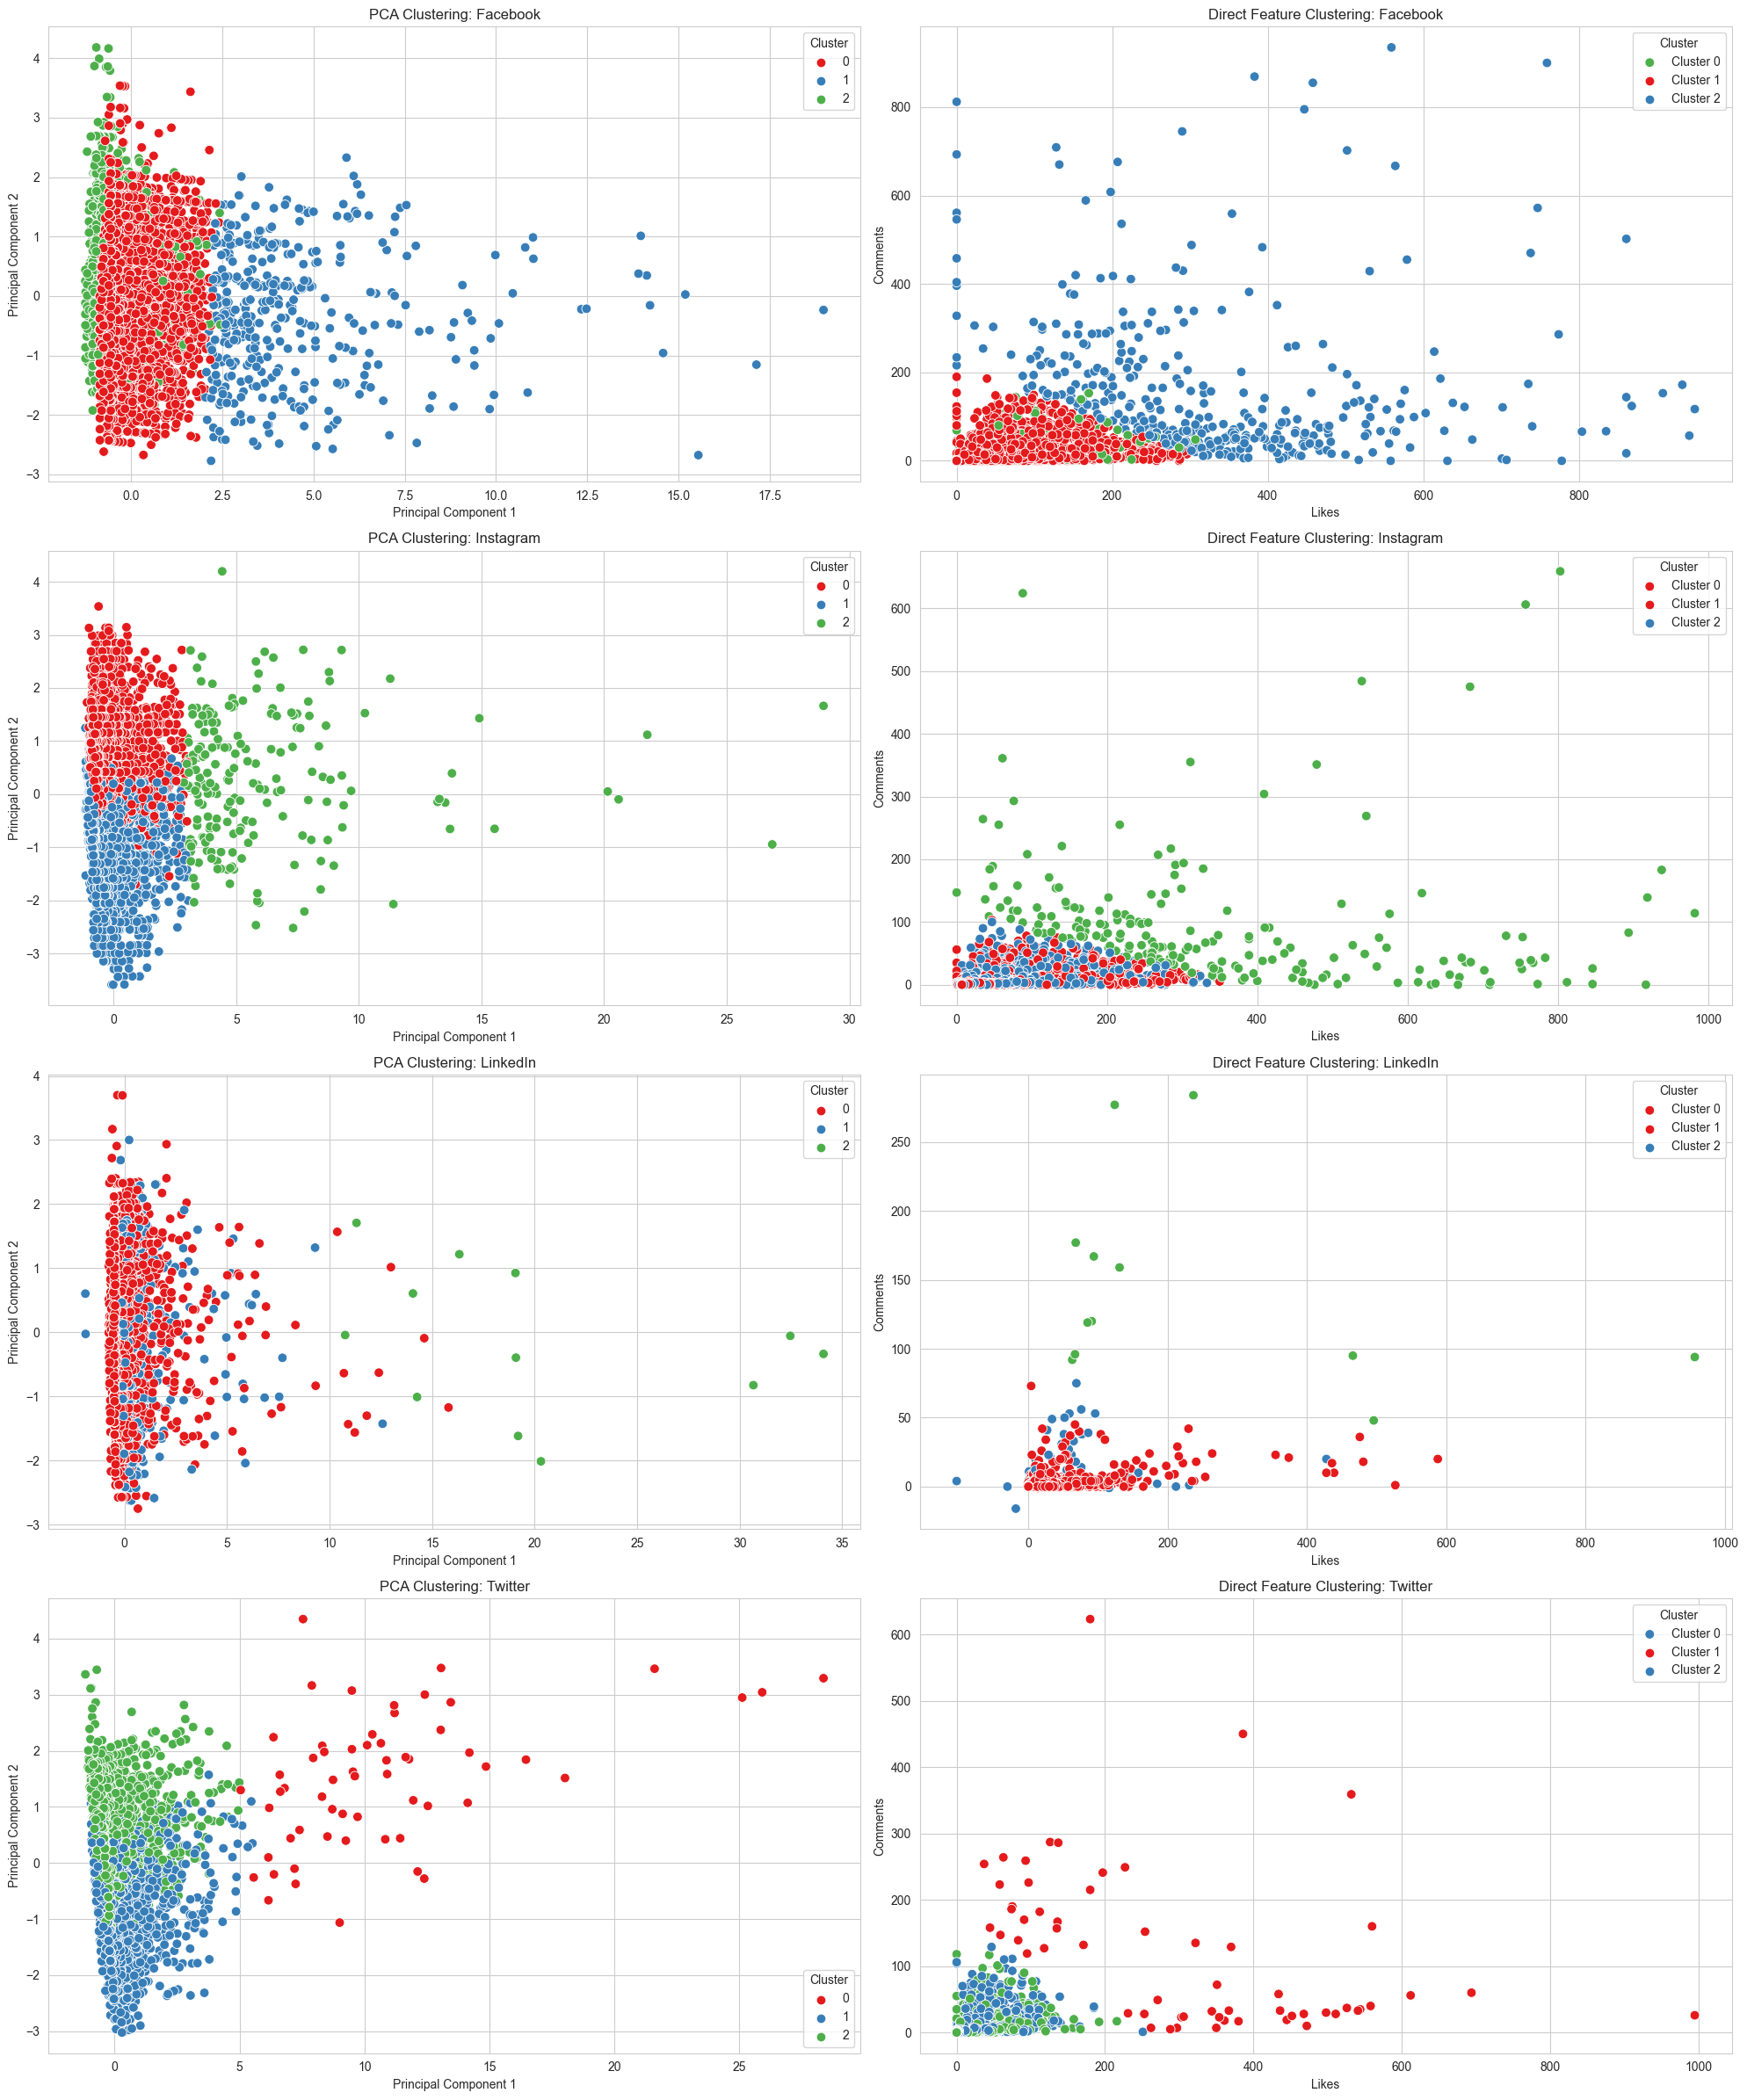

In [116]:

# Function to preprocess the data for direct feature clustering
def preprocess_for_clustering(data):
    data['Day of Week'] = data['Day of Week'].astype('category').cat.codes
    data['Content Type'] = data['Content Type'].astype('category').cat.codes
    return data[['Likes', 'Comments', 'Hour of Day', 'Day of Week', 'Content Type']]

# Function to visualize PCA clusters using sns.scatterplot
def visualize_pca_clusters(data, clusters, ax):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    
    df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    df_pca['Cluster'] = clusters
    
    sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='Set1', s=60, ax=ax)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True)

# Function to perform and visualize clustering
def perform_and_visualize_clustering(df, platform_name, ax_pca, ax_direct):
    # Preprocess and standardize data
    features = preprocess_for_clustering(df.copy())
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    # Visualize PCA clusters
    visualize_pca_clusters(scaled_features, clusters, ax_pca)
    ax_pca.set_title(f'PCA Clustering: {platform_name}')
    
    # Visualize direct feature clusters
    sns.scatterplot(data=df, x='Likes', y='Comments', hue=clusters, palette='Set1', s=60, ax=ax_direct)
    ax_direct.set_title(f'Direct Feature Clustering: {platform_name}')
    ax_direct.set_xlabel('Likes')
    ax_direct.set_ylabel('Comments')
    ax_direct.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])

# Prepare a 2x2 subplot for the PCA clusters and another 2x2 subplot for direct feature clusters
fig, axes = plt.subplots(4, 2, figsize=(20, 24))

for idx, (platform_name, data) in enumerate(cleaned_datasets.items()):
    perform_and_visualize_clustering(data, platform_name, axes[idx, 0], axes[idx, 1])

plt.tight_layout()
plt.show()



#### Observations 
1. Diversity in Engagement Landscapes:

* Engagement Epicenters: Platforms like Instagram showcase pockets of high engagement, implying that specific strategies, content types, or posting schedules are striking a chord with the audience.
* Unique Behaviors: Other platforms exhibit distinct clusters, each indicating a unique engagement behavior. These clusters could be driven by different content types, user demographics, or posting trends.
2. Content & Timing Dynamics:

* Synchronized Engagements: Direct feature clustering suggests that posts within high engagement clusters might have synchronized posting times or content types, providing hints for optimal engagement strategies.
* Dominant Content Types: Certain content forms, such as videos or images, seem to significantly influence clustering patterns, suggesting their pivotal role in driving engagements.
3. PCA's Panoramic Perspective:

* Condensed Insight: PCA-based clustering offers a compressed view of the data, with some clusters in close proximity, indicating similar engagement dynamics. In contrast, distant clusters hint at distinct engagement blueprints.
* Reaffirmation of Trends: The patterns observed in PCA mirror those in direct feature clustering, underscoring the robustness of the derived insights.
4. Spotlight on Outliers:

* Standing Apart: Certain posts, especially noticeable in the PCA visualization, diverge from standard clusters. These outliers or uniquely engaging posts warrant a closer look to glean any exceptional strategies or content attributes that led to their standout performance.


## Conclusion 
### Comprehensive Analysis of Stanbic IBTC's Digital Engagement: A Decade in Review

In today's digital era, where every like, share, and comment holds significance, understanding social media engagement is paramount. This project is a deep dive into Stanbic IBTC's social media footprint over the past decade, spanning four major platforms: Facebook, Instagram, LinkedIn, and Twitter.
We embarked on a comprehensive analysis of Stanbic IBTC's social media engagement spanning a decade, across four major platforms: Facebook, Instagram, LinkedIn, and Twitter. Our objective was to decode the trends, patterns, and intricacies of the data to provide actionable insights that could shape the future of the bank's digital engagement strategy.

#### From Raw Data to Refined Insights
Our analytical journey commenced with an in-depth data familiarization phase. Here, each dataset was meticulously explored, revealing the unique attributes and nuances of each platform. Ensuring the data's integrity was paramount; rigorous cleaning and preprocessing steps were taken, laying the foundation for the subsequent analysis.

#### EDA: Unveiling the Engagement Giants
A thorough Exploratory Data Analysis painted a vivid picture:

* Instagram's Dominance: This visual-centric platform emerged as the undisputed leader in terms of engagement.
* Video's Victory: Across platforms, video content consistently captivated audiences, reinforcing the power of dynamic, multimedia content.
* Sentiment's Subtleties: The sentiment analysis added a layer of depth, showcasing how the audience felt about the content, beyond mere numbers.

#### Advanced Analytics: Peering into the Future & Beyond
The SARIMA forecasting model predicted a promising trajectory, indicating a bright future with steadily rising engagements. But we didn't stop there. Text analysis spotlighted frequent terms and sentiments, while predictive analytics offered glimpses into future engagement trends and content success metrics.

#### Conclusive Recommendations: Charting the Path Forward
Data-driven insights were translated into actionable strategies:

* Instagram Investment: The bank's marketing efforts could see amplified returns with a focus on Instagram.
* Video's Value: A recommendation to further invest in video content creation, given its undeniable resonance with the audience.